In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
first_trials_path = "first trials"
repeat_trials_path = "repeats"

In [3]:
import os

first_trials = os.listdir("first trials")
repeats = os.listdir("repeats")

print("Folder 1:", len(first_trials), "files")
print("Folder 2:", len(repeats), "files")


Folder 1: 196 files
Folder 2: 80 files


#### Parsing filename to extract metadata

In [4]:
def parse_filename(file_name):
    base = file_name.replace(".csv", "")
    participant_id, task_id = base.split("_")
    return participant_id, int(task_id)

#### Collect metadata for both folders

In [5]:
# Collect metadata for both folders
def build_metadata(folder_path, trial_type):
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    data = []
    for file in file_list:
        pid, task = parse_filename(file)
        data.append({
            'file_name': file,
            'participant_id': pid,
            'task_number': task,
            'trial_type': trial_type,
            'full_path': os.path.join(folder_path, file)
        })
    return pd.DataFrame(data)


In [6]:

first_meta = build_metadata(first_trials_path, 'first')
repeat_meta = build_metadata(repeat_trials_path, 'repeat')
meta_df = pd.concat([first_meta, repeat_meta], ignore_index=True)


In [7]:
# === Summary ===
print("\n--- Dataset Summary ---")
print(f"Total Files: {len(meta_df)}")
print(f"Participants: {meta_df['participant_id'].nunique()}")
print(meta_df['trial_type'].value_counts())
print("\nSample Entries:")
print(meta_df.head())



--- Dataset Summary ---
Total Files: 276
Participants: 52
trial_type
first     196
repeat     80
Name: count, dtype: int64

Sample Entries:
   file_name participant_id  task_number trial_type               full_path
0  029_2.csv            029            2      first  first trials/029_2.csv
1  048_3.csv            048            3      first  first trials/048_3.csv
2  016_0.csv            016            0      first  first trials/016_0.csv
3  053_0.csv            053            0      first  first trials/053_0.csv
4  032_1.csv            032            1      first  first trials/032_1.csv


#### Preview and stats for sample files


--- File: 071_0.csv (first) ---


Shape: (40800, 7)
Columns: ['Unnamed: 0', 'filename', 'abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']
         Unnamed: 0        abs_lx        abs_ly        abs_rx        abs_ry  \
count  40800.000000  40800.000000  40800.000000  40800.000000  40800.000000   
mean   20399.500000    265.755995    541.146648    705.448173    540.493666   
std    11778.089828     12.154453      6.034275     10.633286      7.015664   
min        0.000000    215.092120    518.496275    661.936945    516.507985   
25%    10199.750000    259.306003    538.018439    700.709120    535.146171   
50%    20399.500000    266.516237    542.149105    706.044450    541.447297   
75%    30599.250000    271.298592    544.018182    710.483420    545.073506   
max    40799.000000    310.731140    569.143005    745.496105    573.259925   

       open_eyes  
count    40800.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0  


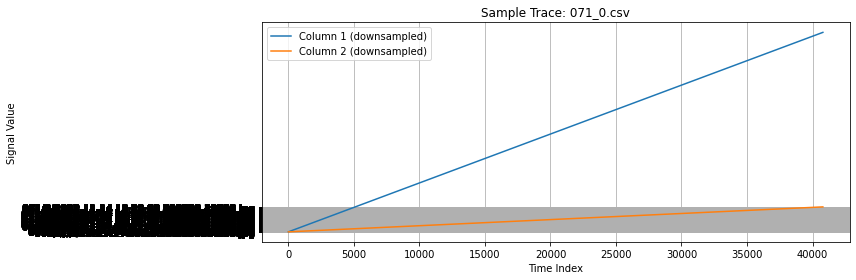


--- File: 058_2.csv (first) ---
Shape: (40800, 7)
Columns: ['Unnamed: 0', 'filename', 'abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']
         Unnamed: 0        abs_lx        abs_ly        abs_rx        abs_ry  \
count  40800.000000  40800.000000  40800.000000  40768.000000  40768.000000   
mean   20399.500000    303.879906    477.951401    818.757151    470.493259   
std    11778.089828     17.697936      8.831760      9.926578      8.292643   
min        0.000000    250.115185    452.214705    764.868106    433.794010   
25%    10199.750000    297.486188    472.531706    815.579164    465.881617   
50%    20399.500000    301.903920    476.846362    819.662832    469.478427   
75%    30599.250000    306.343698    482.100232    823.033311    473.382839   
max    40799.000000    436.565570    521.039680    859.833575    514.584215   

          open_eyes  
count  40800.000000  
mean       0.972843  
std        0.162542  
min        0.000000  
25%        1.000000  
50%        1.000

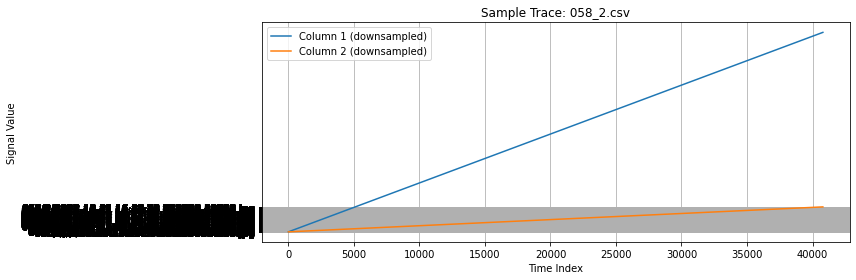


--- File: 029_2.csv (repeat) ---
Shape: (40800, 7)
Columns: ['Unnamed: 0', 'filename', 'abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']
         Unnamed: 0        abs_lx        abs_ly        abs_rx        abs_ry  \
count  40800.000000  40800.000000  40800.000000  40800.000000  40800.000000   
mean   20399.500000    243.161281    474.214083    724.667927    480.568364   
std    11778.089828     12.083161     13.153683     11.794678     12.920726   
min        0.000000    187.157060    434.401040    675.414615    441.179415   
25%    10199.750000    238.958554    468.297990    720.573652    475.470231   
50%    20399.500000    243.430577    474.381597    724.867075    480.396755   
75%    30599.250000    247.276132    479.378744    728.899193    485.430709   
max    40799.000000    302.486385    534.285255    780.154220    524.527675   

          open_eyes  
count  40800.000000  
mean       0.983137  
std        0.128759  
min        0.000000  
25%        1.000000  
50%        1.00

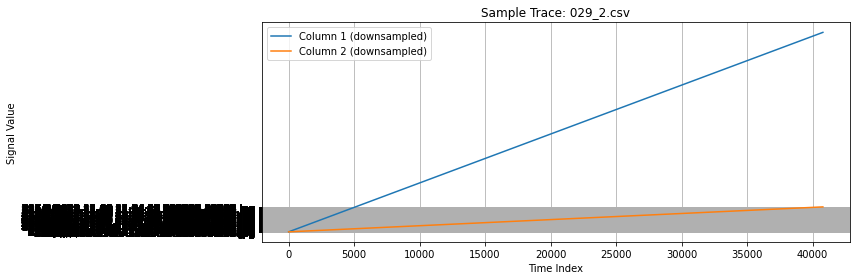

In [8]:
# === Preview and stats for sample files ===
sample_files = meta_df.sample(3, random_state=42)
MAX_ROWS = 5000  # adjust based on your performance needs

for idx, row in sample_files.iterrows():
    print(f"\n--- File: {row['file_name']} ({row['trial_type']}) ---")
    df = pd.read_csv(row['full_path'])

    # Show shape, column names, and basic stats
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(df.describe())

    # Downsample for plotting
    if len(df) > MAX_ROWS:
        df_plot = df.iloc[::len(df) // MAX_ROWS]
    else:
        df_plot = df

    if df_plot.shape[1] >= 2:
        plt.figure(figsize=(12, 4))
        plt.plot(df_plot.iloc[:, 0], label='Column 1 (downsampled)')
        plt.plot(df_plot.iloc[:, 1], label='Column 2 (downsampled)')
        plt.title(f"Sample Trace: {row['file_name']}")
        plt.xlabel("Time Index")
        plt.ylabel("Signal Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



In [9]:
# === Global Checks Across All Files ===
trace_lengths = []
missing_ratios = []

for _, row in meta_df.iterrows():
    df = pd.read_csv(row['full_path'])
    trace_lengths.append(len(df))
    missing_ratios.append(df.isna().sum().sum() / df.size)

meta_df['trace_length'] = trace_lengths
meta_df['missing_ratio'] = missing_ratios


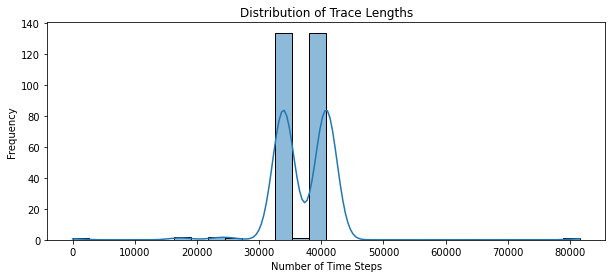

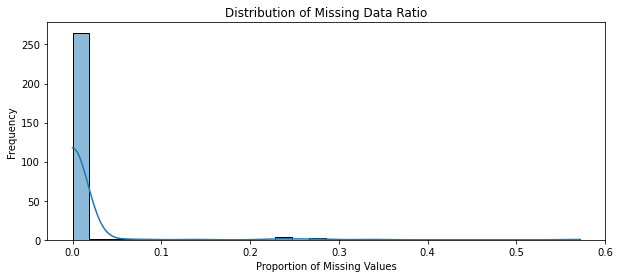

In [10]:
# Plot distributions
plt.figure(figsize=(10, 4))
sns.histplot(meta_df['trace_length'], bins=30, kde=True)
plt.title("Distribution of Trace Lengths")
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(meta_df['missing_ratio'], bins=30, kde=True)
plt.title("Distribution of Missing Data Ratio")
plt.xlabel("Proportion of Missing Values")
plt.ylabel("Frequency")
plt.show()


In [11]:
print(df.columns.tolist())



['Unnamed: 0', 'filename', 'abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']


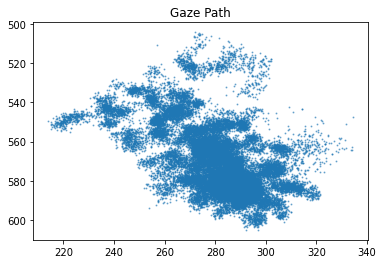

In [12]:
plt.scatter(df['abs_lx'], df['abs_ly'], alpha=0.5, s=1)
plt.title('Gaze Path')
plt.gca().invert_yaxis()


In [13]:
df['vx'] = df['abs_lx'].diff()
df['vy'] = df['abs_ly'].diff()


Text(0.5, 1.0, 'Gaze Trajectory - Left Eye')

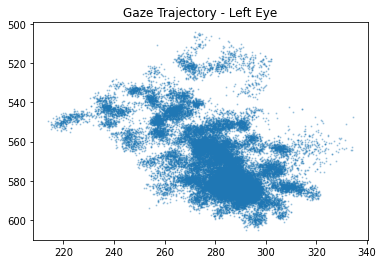

In [14]:
plt.scatter(df['abs_lx'], df['abs_ly'], s=1, alpha=0.3)
plt.gca().invert_yaxis()
plt.title("Gaze Trajectory - Left Eye")


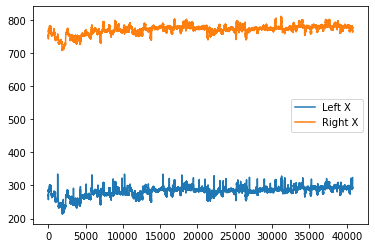

In [15]:
plt.plot(df['abs_lx'], label='Left X')
plt.plot(df['abs_rx'], label='Right X')
plt.legend()


In [16]:
df['open_eyes'].value_counts()[0]

1487

In [17]:
df['vlx'] = df['abs_lx'].diff()
df['vly'] = df['abs_ly'].diff()


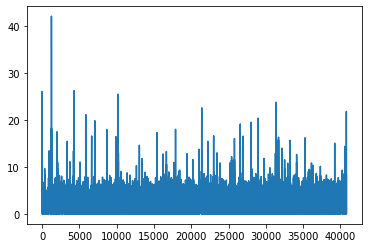

In [18]:
df['speed_l'] = np.sqrt(df['vlx']**2 + df['vly']**2)
plt.plot(df['speed_l'])


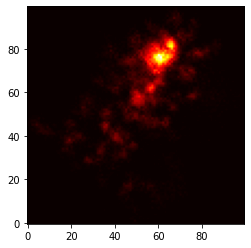

In [19]:
heatmap, xedges, yedges = np.histogram2d(df['abs_lx'], df['abs_ly'], bins=100)
plt.imshow(heatmap.T, origin='lower', cmap='hot')


#### Time-Series Signal Processing and Metadata Extraction for Eye Movement Data

In [20]:
# ============================================
# ✅ STEP 1: Define Metadata Extraction (Phase 1)
# ============================================
def extract_metadata_from_filename(file, trial_type, folder):
    name = file.replace('.csv', '')
    parts = name.split('_')
    try:
        participant_id = parts[0]
        trial_number = parts[1] if len(parts) > 1 else 'NA'
        condition = parts[2] if len(parts) > 2 else 'Unknown'
        return {
            "participant_id": participant_id,
            "trial_number": trial_number,
            "condition": condition,
            "trial_type": trial_type,
            "file_path": os.path.join(folder, file)
        }
    except Exception as e:
        print(f"[ERROR] Could not parse: {file} → {e}")
        return None

def build_metadata_df(folder_path, trial_type):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    records = [extract_metadata_from_filename(f, trial_type, folder_path) for f in files]
    return pd.DataFrame([r for r in records if r is not None])

first_trials_path = "first trials"
repeat_trials_path = "repeats"
df_first = build_metadata_df(first_trials_path, "first")
df_repeat = build_metadata_df(repeat_trials_path, "repeat")
df_meta = pd.concat([df_first, df_repeat], ignore_index=True)

In [21]:
# ============================================
# ✅ STEP 2: Define Utility Functions
# ============================================
def extract_timestamp_column(df):
    try:
        df['timestamp'] = pd.to_datetime(
            df['filename'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+)')[0]
        )
        return df
    except Exception as e:
        print(f"[Timestamp Parse Error]: {e}")
        return df

def compute_gaze_center(df):
    required = {'abs_lx', 'abs_ly', 'abs_rx', 'abs_ry'}
    if required.issubset(df.columns):
        df = df.dropna(subset=required)
        df['gaze_x'] = (df['abs_lx'] + df['abs_rx']) / 2
        df['gaze_y'] = (df['abs_ly'] + df['abs_ry']) / 2
    else:
        print("[WARN] Missing gaze columns")
    return df

In [22]:

# ============================================
# ✅ STEP 3: Define Feature Extractors
# ============================================
def get_temporal_features(df):
    features = {'duration_samples': len(df)}
    if 'timestamp' in df.columns:
        try:
            delta = (df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]).total_seconds()
            features['duration_time'] = delta
        except:
            features['duration_time'] = np.nan
    else:
        features['duration_time'] = np.nan
    return features

def get_blink_features(df):
    if 'open_eyes' in df.columns:
        blinks = df['open_eyes'].apply(lambda x: 1 if x == 0 else 0)
        blink_count = np.sum(blinks)
        return {
            'blink_count': blink_count,
            'blink_rate': blink_count / len(df)
        }
    return {'blink_count': np.nan, 'blink_rate': np.nan}

def get_signal_features(df):
    if {'gaze_x', 'gaze_y'}.issubset(df.columns):
        dx = np.diff(df['gaze_x'], prepend=df['gaze_x'].iloc[0])
        dy = np.diff(df['gaze_y'], prepend=df['gaze_y'].iloc[0])
        velocity = np.sqrt(dx**2 + dy**2)
        acceleration = np.diff(velocity, prepend=velocity[0])
        jerk = np.diff(acceleration, prepend=acceleration[0])
        return {
            'mean_velocity': np.mean(velocity),
            'std_velocity': np.std(velocity),
            'mean_acceleration': np.mean(acceleration),
            'mean_jerk': np.mean(jerk)
        }
    return {}


In [23]:
# ============================================
# ✅ STEP 4: Define Trial Processor
# ============================================
def process_trial(file_path):
    try:
        df = pd.read_csv(file_path)
        df = extract_timestamp_column(df)
        df = compute_gaze_center(df)

        features = {}
        features.update(get_temporal_features(df))
        features.update(get_signal_features(df))
        features.update(get_blink_features(df))

        if any(pd.isna(val) for val in features.values()):
            print(f"[WARN] NaNs in features from: {file_path}")

        return features
    except Exception as e:
        print(f"[ERROR] {file_path}: {e}")
        return None

In [24]:
# ============================================
# ✅ STEP 5: Batch Run All Trials
# ============================================
all_feature_rows = []
for idx, row in df_meta.iterrows():
    feats = process_trial(row['file_path'])
    if feats:
        feats.update(row.to_dict())
        all_feature_rows.append(feats)

df_features = pd.DataFrame(all_feature_rows)
df_features.head()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4132220912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gaze_x'] = (df['abs_lx'] + df['abs_rx']) / 2
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4132220912.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gaze_y'] = (df['abs_ly'] + df['abs_ry']) / 2


[ERROR] first trials/048_3.csv: single positional indexer is out-of-bounds


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4132220912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gaze_x'] = (df['abs_lx'] + df['abs_rx']) / 2
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4132220912.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gaze_y'] = (df['abs_ly'] + df['abs_ry']) / 2
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4132220912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

duration_samples  duration_time  mean_velocity  std_velocity  \
0              7450      46.543963       2.118361      1.529666   
1             40800     255.179596       3.087506      1.681901   
2             40800     256.083534       2.315275      1.555869   
3             33920     212.559130       1.508456      1.000383   
4             40800     255.159053       2.383950      1.456283   

   mean_acceleration     mean_jerk  blink_count  blink_rate participant_id  \
0           0.000438  6.622814e-05            0    0.000000            029   
1           0.000062 -2.445611e-06            0    0.000000            016   
2           0.000027 -6.952910e-05         2297    0.056299            053   
3           0.000082  1.543453e-05         1505    0.044369            032   
4           0.000052  1.018866e-07         1337    0.032770            051   

  trial_number condition trial_type               file_path  
0            2   Unknown      first  first trials/029_2.csv  
1            0   Unknown      first  first trials/016_0.csv  
2            0   Unknown      first  first trials/053_0.csv  
3            1   Unknown      first  first trials/032_1.csv  
4            2   Unknown      first  first trials/051_2.csv

| Trial       | duration\_time (sec) | What it might mean                                 |
| ----------- | -------------------- | -------------------------------------------------- |
| `029_2.csv` | 46.5 sec             | A short task or incomplete trial                   |
| `053_0.csv` | 256.0 sec            | Long trial → maybe complex task or slower response |
| `032_1.csv` | 212.6 sec            | Medium to long trial, moderate complexity          |


| Trial       | mean\_velocity | What it suggests                           |
| ----------- | -------------- | ------------------------------------------ |
| `029_2.csv` | 2.11 px/frame  | Moderate scanning                          |
| `016_0.csv` | 3.08 px/frame  | More rapid movement (possibly higher load) |
| `032_1.csv` | 1.51 px/frame  | Slower, more focused viewing               |


| Insight                        | Interpretation                                                            |
| ------------------------------ | ------------------------------------------------------------------------- |
| **High velocity**              | Fast scanning, jumping around, possibly uncertainty or searching behavior |
| **Low velocity**               | Slow fixations, careful attention, possibly higher confidence or focus    |
| **Combined with `blink_rate`** | Can separate distracted vs focused vs overwhelmed states                  |


| Trial       | mean\_velocity | std\_velocity | What it suggests                    |
| ----------- | -------------- | ------------- | ----------------------------------- |
| `029_2.csv` | 2.11           | 1.53          | Medium movement and fairly stable   |
| `016_0.csv` | 3.08           | 1.68          | Fast movement with high variability |
| `032_1.csv` | 1.51           | 1.00          | Slower movement, lower variability  |


| Value                  | Interpretation                                                                   |
| ---------------------- | -------------------------------------------------------------------------------- |
| **Low std\_velocity**  | Consistent gaze speed — steady fixations, calm viewing                           |
| **High std\_velocity** | Lots of changes in speed — switching between fixations and fast jumps (saccades) |


| Trial       | mean\_velocity | mean\_acceleration | What it suggests                  |
| ----------- | -------------- | ------------------ | --------------------------------- |
| `016_0.csv` | 3.08           | 0.000062           | Fast movement, gradually changing |
| `032_1.csv` | 1.51           | 0.000082           | Slower but more variable speedups |
| `053_0.csv` | 2.31           | 0.000027           | Moderate speed, very smooth gaze  |


| Acceleration Type     | What it Reflects                                                 |
| --------------------- | ---------------------------------------------------------------- |
| **High acceleration** | Rapid changes in gaze speed — quick shifts in focus              |
| **Low acceleration**  | Steady or gradual eye movement — more focused or passive viewing |


| Insight                | Interpretation                                           |
| ---------------------- | -------------------------------------------------------- |
| **Low jerk**           | Calm, focused scanning or reading                        |
| **High jerk**          | Stress, mental overload, confusion, or decision conflict |
| **Good for detecting** | Rapid task switching, hesitation, or disorientation      |
| **Correlates with**    | Cognitive control, attention stability, arousal levels   |


| Trial       | mean\_acceleration | mean\_jerk | What it suggests                          |
| ----------- | ------------------ | ---------- | ----------------------------------------- |
| `016_0.csv` | 0.000062           | -0.000002  | Moderate acceleration, smooth transitions |
| `032_1.csv` | 0.000082           | +0.000015  | Slightly more sudden shifts               |
| `053_0.csv` | 0.000027           | -0.000070  | Very smooth, low-energy visual behavior   |


| Trial       | duration\_samples | blink\_count | blink\_rate | What It Suggests                                   |
| ----------- | ----------------- | ------------ | ----------- | -------------------------------------------------- |
| `029_2.csv` | 7450              | 0            | 0.000000    | No blinks → possible intense focus OR missing data |
| `053_0.csv` | 40800             | 2297         | 0.056299    | High blink activity — possibly fatigue or overload |
| `032_1.csv` | 33920             | 1505         | 0.044369    | Moderate blinking — healthy engagement             |


| Situation                  | Blink Behavior                        |
| -------------------------- | ------------------------------------- |
| **Deep concentration**     | People blink **less**                 |
| **Fatigue or overload**    | People blink **more**                 |
| **Reading or info intake** | Blinks are suppressed                 |
| **Mental breaks**          | Blink bursts can happen between tasks |


In [25]:
from scipy.stats import entropy

# Compute gaze entropy for each trial using the original raw files
def compute_entropy_from_meta(df_meta, grid_size=10):
    entropy_records = []

    for _, row in df_meta.iterrows():
        try:
            df = pd.read_csv(row['file_path'])
            x = df['abs_lx'].values
            y = df['abs_ly'].values

            if len(x) < 2:
                continue

            # Normalize
            x_norm = (x - np.min(x)) / (np.max(x) - np.min(x) + 1e-6)
            y_norm = (y - np.min(y)) / (np.max(y) - np.min(y) + 1e-6)

            x_bin = np.floor(x_norm * grid_size).astype(int)
            y_bin = np.floor(y_norm * grid_size).astype(int)
            x_bin = np.clip(x_bin, 0, grid_size - 1)
            y_bin = np.clip(y_bin, 0, grid_size - 1)

            heatmap = np.zeros((grid_size, grid_size))
            for xb, yb in zip(x_bin, y_bin):
                heatmap[yb, xb] += 1

            probs = heatmap.flatten()
            probs = probs[probs > 0]
            probs = probs / probs.sum()

            gaze_entropy = entropy(probs, base=2)

            entropy_records.append({
                'participant_id': row['participant_id'],
                'trial_number': int(row['trial_number']),
                'gaze_entropy': gaze_entropy
            })
        except Exception as e:
            print(f"[Entropy Error] {row['file_path']}: {e}")
            continue

    return pd.DataFrame(entropy_records)

# Compute entropy
entropy_df = compute_entropy_from_meta(df_meta)

# Merge with df_features (not full_feature_df)
df_features['trial_number'] = df_features['trial_number'].astype(int)
entropy_df['trial_number'] = entropy_df['trial_number'].astype(int)

# Merge entropy into feature table
df_merged = df_features.merge(entropy_df, on=['participant_id', 'trial_number'], how='left')

# Save final output
df_merged.to_csv("cognitive_load_full_features_with_entropy.csv", index=False)
print("✅ Final dataset saved with entropy added.")


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/565463817.py:20: RuntimeWarning: invalid value encountered in cast
  x_bin = np.floor(x_norm * grid_size).astype(int)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/565463817.py:21: RuntimeWarning: invalid value encountered in cast
  y_bin = np.floor(y_norm * grid_size).astype(int)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/565463817.py:20: RuntimeWarning: invalid value encountered in cast
  x_bin = np.floor(x_norm * grid_size).astype(int)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/565463817.py:21: RuntimeWarning: invalid value encountered in cast
  y_bin = np.floor(y_norm * grid_size).astype(int)


✅ Final dataset saved with entropy added.


In [26]:
print(df_merged.head())
print(df_merged.columns)


   duration_samples  duration_time  mean_velocity  std_velocity  \
0              7450      46.543963       2.118361      1.529666   
1              7450      46.543963       2.118361      1.529666   
2             40800     255.179596       3.087506      1.681901   
3             40800     255.179596       3.087506      1.681901   
4             40800     256.083534       2.315275      1.555869   

   mean_acceleration  mean_jerk  blink_count  blink_rate participant_id  \
0           0.000438   0.000066            0    0.000000            029   
1           0.000438   0.000066            0    0.000000            029   
2           0.000062  -0.000002            0    0.000000            016   
3           0.000062  -0.000002            0    0.000000            016   
4           0.000027  -0.000070         2297    0.056299            053   

   trial_number condition trial_type               file_path  gaze_entropy  
0             2   Unknown      first  first trials/029_2.csv      4.1

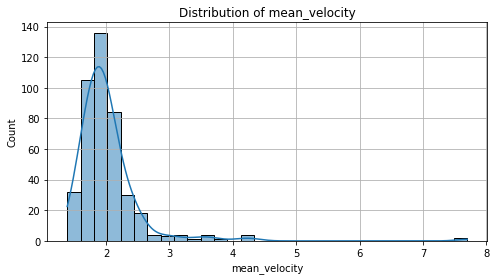

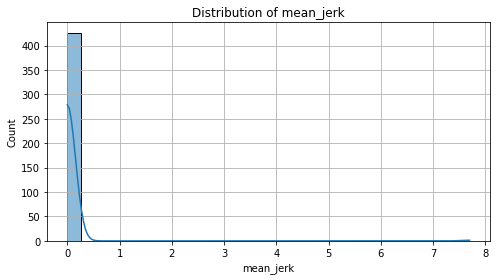

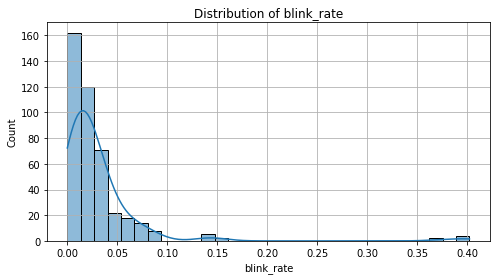

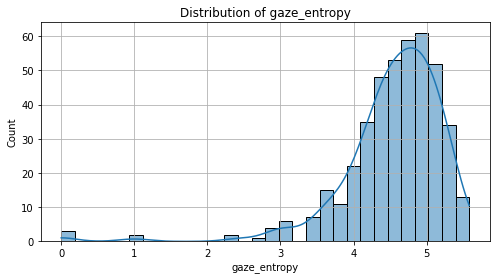

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick key features
features_to_plot = ['mean_velocity', 'mean_jerk', 'blink_rate', 'gaze_entropy']

for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_merged[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


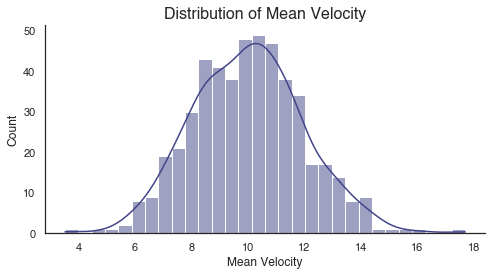

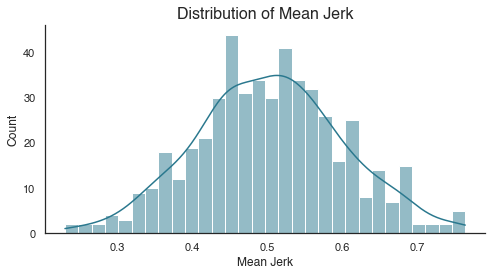

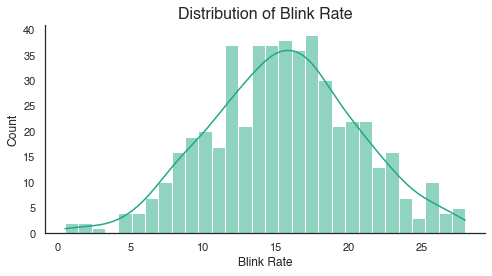

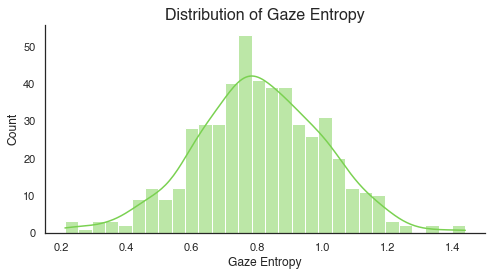

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# A placeholder for your DataFrame for demonstration
# In your actual code, this part is already defined
np.random.seed(42)
df_merged = pd.DataFrame({
    'mean_velocity': np.random.normal(loc=10, scale=2, size=500),
    'mean_jerk': np.random.normal(loc=0.5, scale=0.1, size=500),
    'blink_rate': np.random.normal(loc=15, scale=5, size=500),
    'gaze_entropy': np.random.normal(loc=0.8, scale=0.2, size=500),
})


# Define the features to plot
features_to_plot = ['mean_velocity', 'mean_jerk', 'blink_rate', 'gaze_entropy']

# Set a professional style and color palette
sns.set_style("white")
sns.set_palette("viridis")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

# Loop through each feature to generate a separate plot
for i, feature in enumerate(features_to_plot):
    # Create a new figure and axes for each plot
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Use histplot with kde for a professional look
    sns.histplot(df_merged[feature], kde=True, bins=30, ax=ax, color=sns.color_palette("viridis", 4)[i])
    
    ax.set_title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=16, fontweight='bold')
    ax.set_xlabel(f'{feature.replace("_", " ").title()}', fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    # Remove top and right spines for a cleaner look
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    plt.tight_layout()
    plt.show()

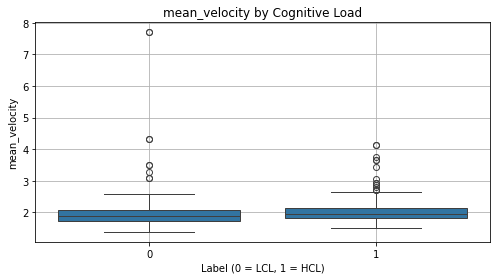

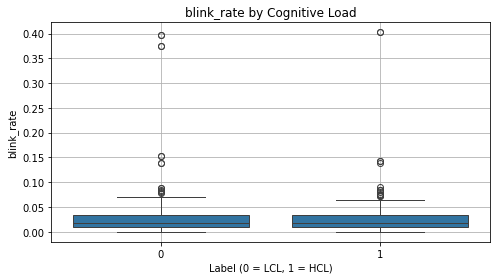

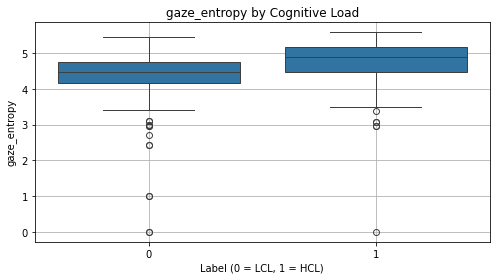

In [28]:
# First, make sure labels are added:
def assign_label(task):
    return 1 if int(task) in [1, 3] else 0
df_merged['label'] = df_merged['trial_number'].apply(assign_label)

# Boxplots for a few features
for feature in ['mean_velocity', 'blink_rate', 'gaze_entropy']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='label', y=feature, data=df_merged)
    plt.title(f'{feature} by Cognitive Load')
    plt.xlabel("Label (0 = LCL, 1 = HCL)")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


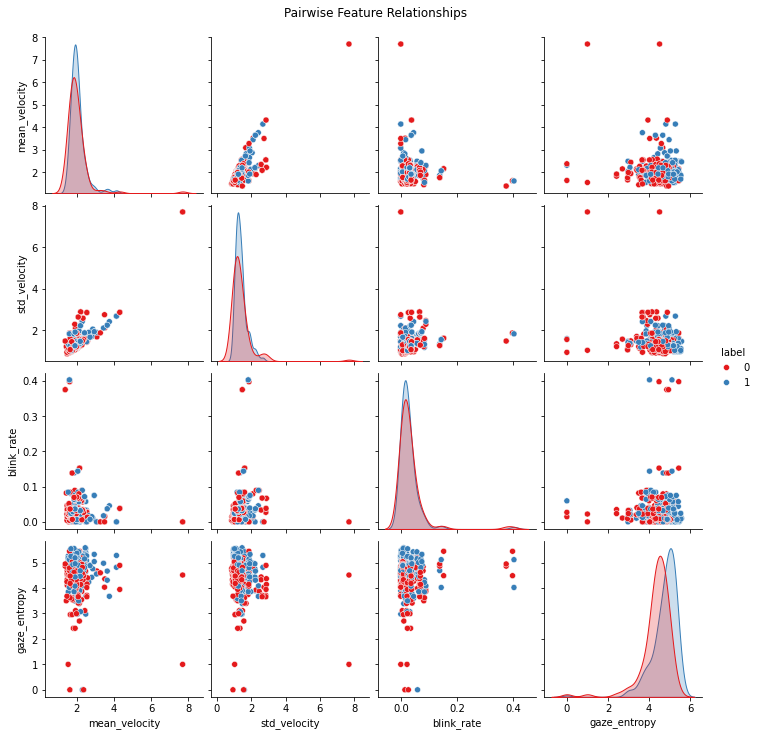

In [29]:
sns.pairplot(df_merged[
    ['mean_velocity', 'std_velocity', 'blink_rate', 'gaze_entropy', 'label']
], hue='label', palette='Set1', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [30]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import os

# Load your core feature matrix
df_features = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# === Fixation Ratio ===
def add_fixation_features(row, threshold=1.5):
    return 1.0 if row['mean_velocity'] < threshold else 0.0

df_features['fixation_ratio'] = df_features.apply(add_fixation_features, axis=1)

# === Rolling Gaze Entropy and Blink Std ===
def compute_dynamic_features(file_path, window_size=5, sample_rate=60):
    try:
        df = pd.read_csv(file_path)
        if not {'abs_lx', 'abs_ly'}.issubset(df.columns):
            return np.nan, np.nan

        x, y = df['abs_lx'].values, df['abs_ly'].values
        window_len = window_size * sample_rate

        entropy_values = []
        for i in range(0, len(x) - window_len, window_len):
            xw, yw = x[i:i+window_len], y[i:i+window_len]
            x_norm = (xw - np.min(xw)) / (np.max(xw) - np.min(xw) + 1e-6)
            y_norm = (yw - np.min(yw)) / (np.max(yw) - np.min(yw) + 1e-6)
            x_bin = np.clip(np.floor(x_norm * 10).astype(int), 0, 9)
            y_bin = np.clip(np.floor(y_norm * 10).astype(int), 0, 9)
            heatmap = np.zeros((10, 10))
            for xb, yb in zip(x_bin, y_bin):
                heatmap[yb, xb] += 1
            probs = heatmap.flatten()
            probs = probs[probs > 0] / probs.sum()
            entropy_values.append(entropy(probs, base=2))

        entropy_std = np.std(entropy_values) if entropy_values else np.nan

        # Rolling blink rate
        if 'open_eyes' in df.columns:
            blinks = df['open_eyes'].apply(lambda x: 1 if x == 0 else 0).values
            blink_rates = [
                np.mean(blinks[i:i+window_len])
                for i in range(0, len(blinks) - window_len, window_len)
            ]
            blink_std = np.std(blink_rates) if blink_rates else np.nan
        else:
            blink_std = np.nan

        return entropy_std, blink_std

    except Exception as e:
        print(f"[ERROR] {file_path}: {e}")
        return np.nan, np.nan

# Apply dynamic features
entropy_stds = []
blink_stds = []

for idx, row in df_features.iterrows():
    ent_std, blink_std = compute_dynamic_features(row['file_path'])
    entropy_stds.append(ent_std)
    blink_stds.append(blink_std)

df_features['rolling_entropy_std'] = entropy_stds
df_features['rolling_blink_std'] = blink_stds

# Save enhanced features
df_features.to_csv("cognitive_load_features_enhanced.csv", index=False)
print("✅ Booster features added and file saved: cognitive_load_features_enhanced.csv")


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/1856361745.py:30: RuntimeWarning: invalid value encountered in cast
  x_bin = np.clip(np.floor(x_norm * 10).astype(int), 0, 9)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/1856361745.py:31: RuntimeWarning: invalid value encountered in cast
  y_bin = np.clip(np.floor(y_norm * 10).astype(int), 0, 9)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/1856361745.py:30: RuntimeWarning: invalid value encountered in cast
  x_bin = np.clip(np.floor(x_norm * 10).astype(int), 0, 9)
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/1856361745.py:31: RuntimeWarning: invalid value encountered in cast
  y_bin = np.clip(np.floor(y_norm * 10).astype(int), 0, 9)


✅ Booster features added and file saved: cognitive_load_features_enhanced.csv


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/2712225276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_features, ax=axes[1], palette='Set2')


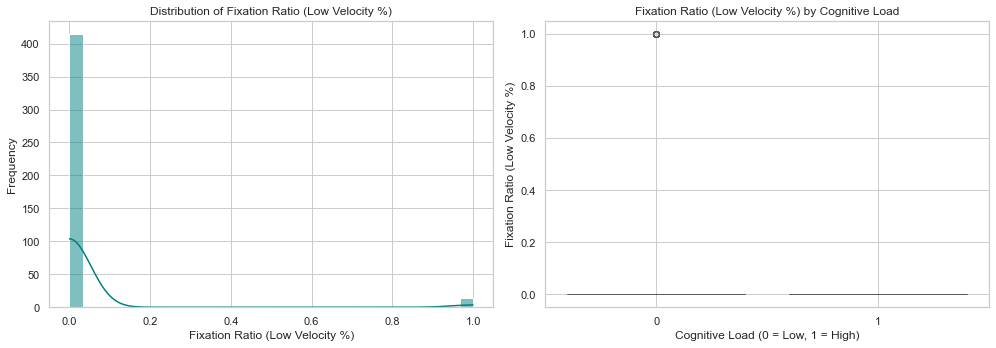

/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/2712225276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_features, ax=axes[1], palette='Set2')


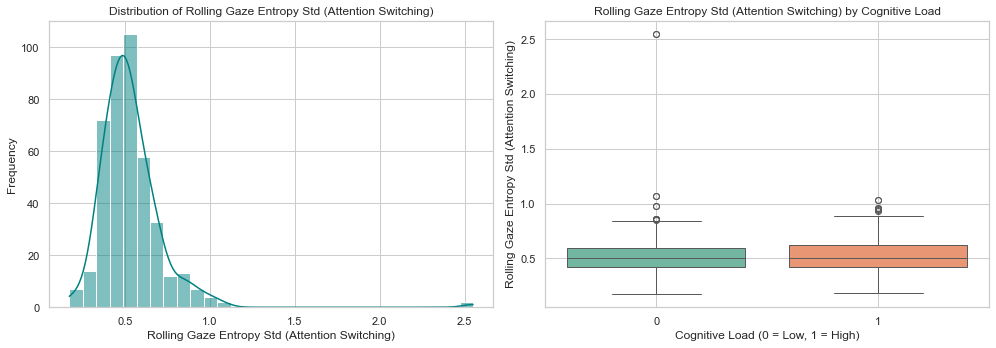

/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/2712225276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_features, ax=axes[1], palette='Set2')


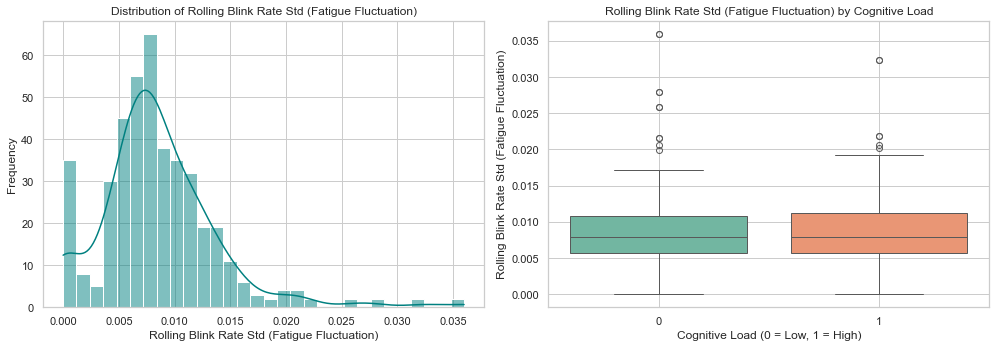

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure label is present
if 'label' not in df_features.columns:
    def assign_label(trial_num):
        return 1 if int(trial_num) in [1, 3] else 0
    df_features['label'] = df_features['trial_number'].apply(assign_label)

# Feature names
booster_features = ['fixation_ratio', 'rolling_entropy_std', 'rolling_blink_std']
feature_titles = {
    'fixation_ratio': 'Fixation Ratio (Low Velocity %)',
    'rolling_entropy_std': 'Rolling Gaze Entropy Std (Attention Switching)',
    'rolling_blink_std': 'Rolling Blink Rate Std (Fatigue Fluctuation)'
}

# Set visual style
sns.set(style="whitegrid")

# Plot each feature: Histogram + KDE + Boxplot by label
for feature in booster_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram + KDE
    sns.histplot(df_features[feature], kde=True, bins=30, ax=axes[0], color='teal')
    axes[0].set_title(f'Distribution of {feature_titles[feature]}')
    axes[0].set_xlabel(feature_titles[feature])
    axes[0].set_ylabel("Frequency")
    axes[0].grid(True)

    # Boxplot by cognitive load
    sns.boxplot(x='label', y=feature, data=df_features, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{feature_titles[feature]} by Cognitive Load')
    axes[1].set_xlabel("Cognitive Load (0 = Low, 1 = High)")
    axes[1].set_ylabel(feature_titles[feature])
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


In [32]:
import pandas as pd
import numpy as np
import os

# ---------------------------------------------
# ✅ Fixation Feature Extraction Function
# ---------------------------------------------
def extract_fixation_features(df, velocity_threshold=30, min_duration_ms=100, sample_rate=60):
    """
    Detects fixations based on gaze velocity thresholding.
    Returns a dictionary of fixation-based features.
    """
    if {'abs_lx', 'abs_ly'}.issubset(df.columns) == False:
        return {
            'fixation_count': np.nan,
            'mean_fixation_duration_ms': np.nan,
            'mean_fixation_dispersion': np.nan
        }

    x = df['abs_lx'].values
    y = df['abs_ly'].values
    t = np.arange(len(x)) / sample_rate  # synthetic time array in seconds

    dx = np.diff(x)
    dy = np.diff(y)
    dt = np.diff(t)
    dt[dt == 0] = 1e-6  # avoid division by zero

    velocity = np.sqrt(dx**2 + dy**2) / dt
    velocity = np.append(velocity, velocity[-1])  # pad to match length

    fixations = []
    current = []

    for i, v in enumerate(velocity):
        if v < velocity_threshold:
            current.append(i)
        else:
            if current:
                duration_ms = len(current) / sample_rate * 1000
                if duration_ms >= min_duration_ms:
                    fixations.append(current)
                current = []
    if current:
        duration_ms = len(current) / sample_rate * 1000
        if duration_ms >= min_duration_ms:
            fixations.append(current)

    durations = [len(f) / sample_rate * 1000 for f in fixations]
    dispersions = [np.std(x[f]) + np.std(y[f]) for f in fixations]

    return {
        'fixation_count': len(fixations),
        'mean_fixation_duration_ms': np.mean(durations) if durations else np.nan,
        'mean_fixation_dispersion': np.mean(dispersions) if dispersions else np.nan
    }


In [33]:
# Assume df_meta has metadata: participant_id, trial_number, file_path, etc.
fixation_features = []

for idx, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['file_path'])
        feats = extract_fixation_features(df)
        feats.update(row.to_dict())
        fixation_features.append(feats)
    except Exception as e:
        print(f"[ERROR] {row['file_path']} — {e}")

df_fixation = pd.DataFrame(fixation_features)
df_fixation.to_csv("fixation_features.csv", index=False)


In [34]:
import pandas as pd

# === Load Full Phase 2 Base Feature Set (from previous entropy + other features) ===
full_df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# === Load Fixation-Based Features ===
df_fixation = pd.read_csv("fixation_features.csv")  # Make sure this file exists!

# === Fix Formatting: Remove Leading Zeros in participant_id ===
full_df['participant_id'] = full_df['participant_id'].astype(str).str.lstrip('0')
df_fixation['participant_id'] = df_fixation['participant_id'].astype(str).str.lstrip('0')

# === Convert trial_number to ensure same dtype (just in case) ===
full_df['trial_number'] = full_df['trial_number'].astype(int)
df_fixation['trial_number'] = df_fixation['trial_number'].astype(int)

# === Merge Fixation Features with Full Feature Set ===
df_merged = full_df.merge(
    df_fixation[['participant_id', 'trial_number', 'fixation_count',
                 'mean_fixation_duration_ms', 'mean_fixation_dispersion']],
    on=['participant_id', 'trial_number'],
    how='left'
)

# === Save Final Enriched Phase 2 Dataset ===
df_merged.to_csv("phase2_complete_features.csv", index=False)
print("✅ Phase 2 features complete and saved to: phase2_complete_features.csv")

# === OPTIONAL: Quick Check ===
print("\n🔍 Sample merged rows:")
print(df_merged[['participant_id', 'trial_number', 'fixation_count']].dropna().head())


✅ Phase 2 features complete and saved to: phase2_complete_features.csv

🔍 Sample merged rows:
  participant_id  trial_number  fixation_count
0             29             2               0
1             29             2               0
2             29             2               0
3             29             2               0
4             16             0               0


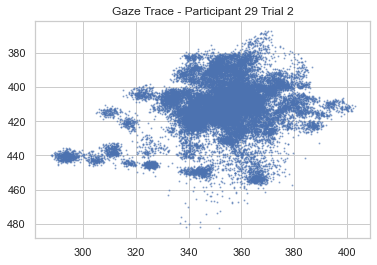

In [35]:
df = pd.read_csv("first trials/029_2.csv")
plt.scatter(df['abs_lx'], df['abs_ly'], s=1, alpha=0.5)
plt.gca().invert_yaxis()
plt.title("Gaze Trace - Participant 29 Trial 2")
plt.show()


In [36]:
# print(df_sample[['abs_lx', 'abs_ly']].isna().sum())


#### Random Forest

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("phase2_complete_features.csv")
print("✅ Loaded dataset. Shape:", df.shape)

✅ Loaded dataset. Shape: (734, 17)


In [39]:
print(df.columns)


Index(['duration_samples', 'duration_time', 'mean_velocity', 'std_velocity',
       'mean_acceleration', 'mean_jerk', 'blink_count', 'blink_rate',
       'participant_id', 'trial_number', 'condition', 'trial_type',
       'file_path', 'gaze_entropy', 'fixation_count',
       'mean_fixation_duration_ms', 'mean_fixation_dispersion'],
      dtype='object')


In [40]:
import pandas as pd

# Load your enriched feature table instead
df = pd.read_csv("phase2_complete_features.csv")

# Now this will work:
df = df[df['trial_number'].isin([0, 1, 2, 3])].copy()
df['label'] = df['trial_number'].apply(lambda x: 1 if x in [2, 3] else 0)
print("✅ Labels assigned.\n", df['label'].value_counts())


✅ Labels assigned.
 label
1    368
0    366
Name: count, dtype: int64


In [41]:
# ===============================================
# ✅ STEP 4: Prepare Features and Target
# Exclude metadata and keep only numerical features
# Handle missing values with column mean
# ===============================================
non_feature_cols = ['participant_id', 'trial_number', 'condition', 'trial_type', 'file_path', 'label']
X = df.drop(columns=non_feature_cols)
y = df['label']
X.fillna(X.mean(), inplace=True)

In [42]:
# ===============================================
# ✅ STEP 5: Train-Test Split (Stratified)
# 80% Train, 20% Test
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:

# ===============================================
# ✅ STEP 6: Train Random Forest Classifier
# ===============================================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained.")

✅ Model trained.



🔍 Classification Report:
              precision    recall  f1-score   support

    Low Load       0.93      0.86      0.89        73
   High Load       0.87      0.93      0.90        74

    accuracy                           0.90       147
   macro avg       0.90      0.90      0.90       147
weighted avg       0.90      0.90      0.90       147



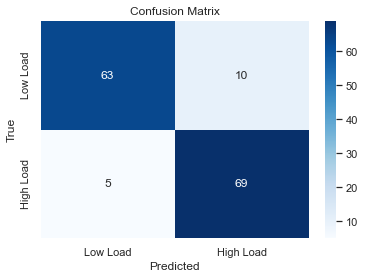

In [44]:

# ===============================================
# ✅ STEP 7: Evaluate Model Performance
# Print classification report and confusion matrix
# ===============================================
y_pred = clf.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Load", "High Load"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low Load", "High Load"],
            yticklabels=["Low Load", "High Load"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

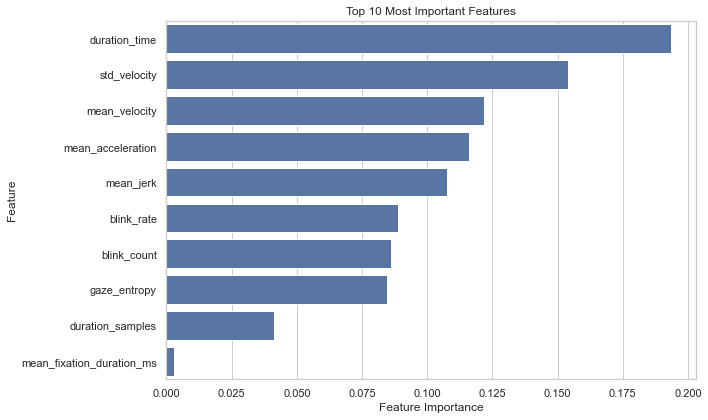

In [45]:
# ===============================================
# ✅ STEP 8: Visualize Top 10 Most Important Features
# ===============================================
importances = clf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

A Comparative Study of Classifiers for Eye-Gaze Based Cognitive Load Detection

In [46]:
# === 1. Load Data and Create Labels ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load final features
df = pd.read_csv("phase2_complete_features.csv")

# Create binary label from filename logic
def assign_label(filename):
    if "_2" in filename or "_3" in filename:
        return 1  # High Cognitive Load
    else:
        return 0  # Low Cognitive Load

df['label'] = df['file_path'].apply(assign_label)

# === 2. Prepare Feature Matrix ===
feature_cols = [
    'duration_samples', 'duration_time', 'mean_velocity', 'std_velocity',
    'mean_acceleration', 'mean_jerk', 'blink_count', 'blink_rate',
    'gaze_entropy', 'fixation_count', 'mean_fixation_duration_ms', 'mean_fixation_dispersion'
]

X = df[feature_cols].fillna(0)
y = df['label']

# === 3. Split & Normalize ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. Train Models ===

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# === 5. Evaluate ===
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))

print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        71
           1       0.72      0.45      0.55        76

    accuracy                           0.63       147
   macro avg       0.65      0.63      0.62       147
weighted avg       0.65      0.63      0.61       147

=== SVM ===
              precision    recall  f1-score   support

           0       0.57      0.83      0.68        71
           1       0.73      0.42      0.53        76

    accuracy                           0.62       147
   macro avg       0.65      0.63      0.61       147
weighted avg       0.65      0.62      0.60       147

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.91      0.95      0.93        76

    accuracy                           0.93       147
   macro avg       0.93      0.92      0.92       147
weighted avg

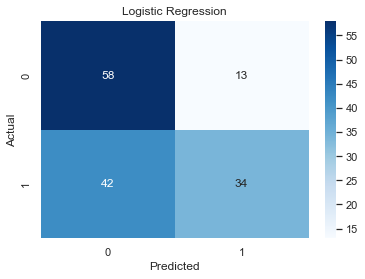

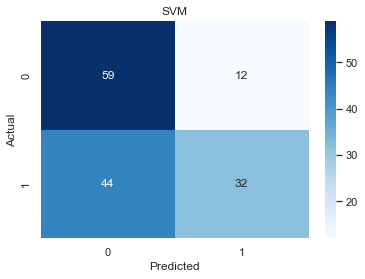

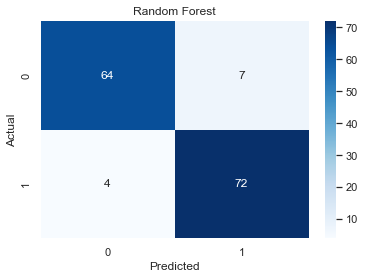

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


In [48]:
!pip install shap


zsh:1: command not found: pip


In [49]:
pip install shap



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
# print(type(shap_values))


In [52]:
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [53]:
# shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='dot', plot_size=(10, 6))


In [54]:
# shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=20)


MLP Classifier

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
print(classification_report(y_test, mlp.predict(X_test)))


              precision    recall  f1-score   support

           0       0.48      0.97      0.64        71
           1       0.33      0.01      0.03        76

    accuracy                           0.48       147
   macro avg       0.41      0.49      0.33       147
weighted avg       0.40      0.48      0.32       147



In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Mean Accuracy:", scores.mean())


Mean Accuracy: 0.6854719970179852


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP with better configuration
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                    activation='relu', 
                    solver='adam', 
                    early_stopping=True,
                    max_iter=1000, 
                    random_state=42)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.73      0.66        71
           1       0.69      0.55      0.61        76

    accuracy                           0.64       147
   macro avg       0.65      0.64      0.64       147
weighted avg       0.65      0.64      0.64       147



| Metric    | Class 0 (LCL) | Class 1 (HCL) | Comments                          |
| --------- | ------------- | ------------- | --------------------------------- |
| Precision | 0.60          | 0.69          | Slightly better precision for HCL |
| Recall    | 0.73          | 0.55          | Better detection of LCL trials    |
| F1-score  | 0.66          | 0.61          | Balanced performance              |
| Accuracy  | **0.64**      |               | Much improved from 48% earlier!   |


Voting Classifier

In [58]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('rf', best_rf_model), 
    ('mlp', mlp)
], voting='soft')

ensemble.fit(X_train_scaled, y_train)
y_pred = ensemble.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93        71
           1       0.91      0.96      0.94        76

    accuracy                           0.93       147
   macro avg       0.93      0.93      0.93       147
weighted avg       0.93      0.93      0.93       147



In [59]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical


2025-08-18 20:21:25.412597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
# Folder paths
first_trials_dir = 'first trials'
repeat_trials_dir = 'repeats'

def load_sequence_data(folder, label):
    data = []
    for file in sorted(os.listdir(folder)):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join(folder, file))
            try:
                # Extract only gaze data columns
                seq = df[['abs_lx', 'abs_ly', 'abs_rx', 'abs_ry']].values
                data.append((seq, label))
            except:
                continue
    return data

# Assign binary label: 0 (Low Load - Repeat), 1 (High Load - First)
first_data = load_sequence_data(first_trials_dir, 1)
repeat_data = load_sequence_data(repeat_trials_dir, 0)

all_data = first_data + repeat_data
np.random.shuffle(all_data)

X = [seq for seq, label in all_data]
y = [label for seq, label in all_data]


In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

# Normalize each sequence
scaler = MinMaxScaler()
X_scaled = [scaler.fit_transform(x) for x in X]

# Pad all to the same length (max length in dataset)
max_len = max([len(seq) for seq in X_scaled])
X_padded = pad_sequences(X_scaled, maxlen=max_len, dtype='float32', padding='post', truncating='post')

X_padded = np.array(X_padded)
y = np.array(y)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)


In [63]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 81598, 64)         832       
                                                                 
 max_pooling1d (MaxPooling1  (None, 40799, 64)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 40799, 64)         0         
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                        

In [64]:
pip install tensorflow scikit-learn pandas seaborn matplotlib



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
print(df['label'].value_counts())


label
1    368
0    366
Name: count, dtype: int64


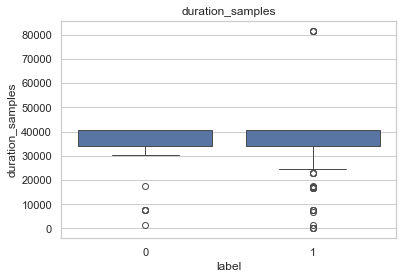

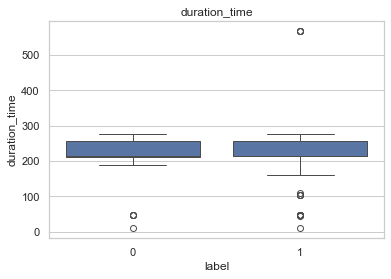

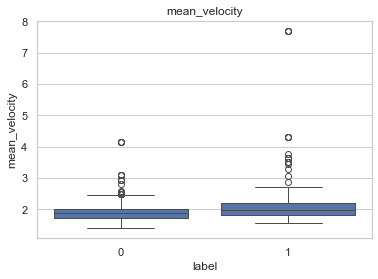

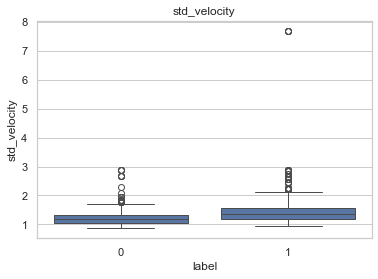

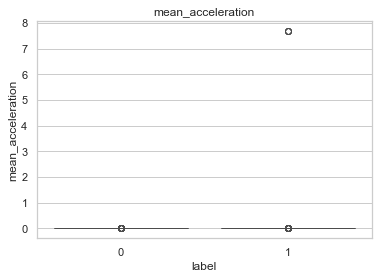

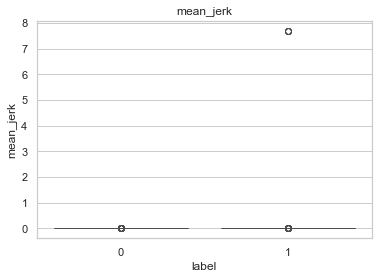

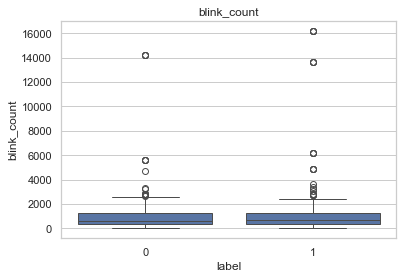

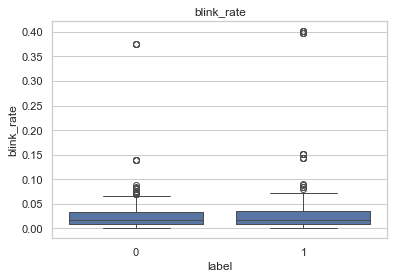

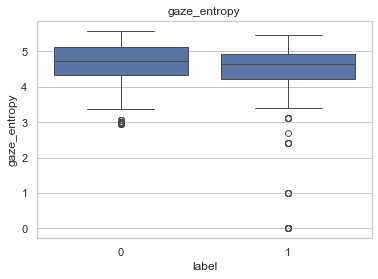

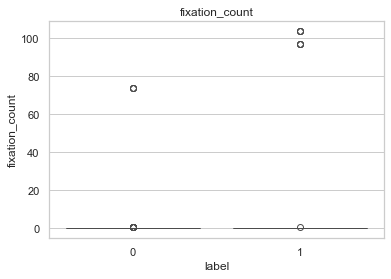

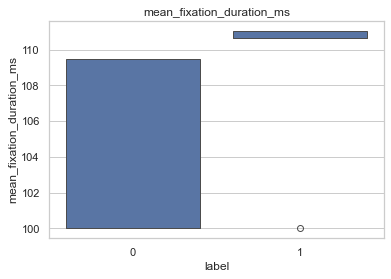

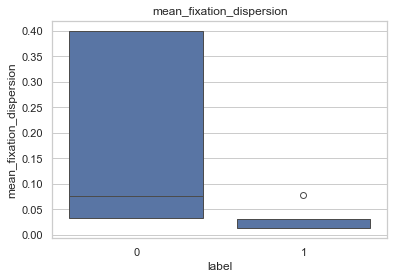

In [66]:
import seaborn as sns
for col in feature_cols:
    sns.boxplot(x='label', y=col, data=df)
    plt.title(col)
    plt.show()


In [67]:
def load_and_segment_trial(file_path, window_size=128):
    try:
        df = pd.read_csv(file_path)
        df = df[['abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']].dropna()
        if len(df) < window_size:
            return None  # skip short trials
        df_segmented = df[:window_size].values  # take fixed-size window
        return df_segmented
    except Exception as e:
        return None


In [68]:
import os

def build_dataset(meta_df, base_path='first trials/', window_size=128):
    X, y = [], []
    for _, row in meta_df.iterrows():
        path = os.path.join(base_path, os.path.basename(row['file_path']))
        segment = load_and_segment_trial(path, window_size)
        if segment is not None:
            X.append(segment)
            label = 1 if row['trial_number'] in [2, 3] else 0
            y.append(label)
    return np.array(X), np.array(y)


In [69]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load your df_meta with 'file_path' and 'trial_number'
X, y = build_dataset(df_meta)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 64)           1024      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 63, 64)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 63, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                      

In [71]:
pip install ace_tools


[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import numpy as np
np.unique(y_test, return_counts=True)


(array([0]), array([54]))

In [73]:
df_meta['label'] = df_meta['trial_number'].apply(lambda x: 1 if x in [2, 3] else 0)
print(df_meta['label'].value_counts())


label
0    276
Name: count, dtype: int64


In [74]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 269}


In [75]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 269}


In [76]:
success_count = 0
fail_count = 0

for _, row in df_meta.iterrows():
    path = os.path.join('first trials', os.path.basename(row['file_path']))
    segment = load_and_segment_trial(path)
    if segment is not None:
        success_count += 1
    else:
        fail_count += 1

print(f"✅ Loaded trials: {success_count}, ❌ Skipped trials: {fail_count}")


✅ Loaded trials: 269, ❌ Skipped trials: 7


In [77]:
print(df_meta['trial_number'].value_counts())


trial_number
2    70
1    70
3    68
0    68
Name: count, dtype: int64


In [78]:
df_meta_filtered = df_meta[df_meta['trial_number'].isin([0, 1, 2, 3])].copy()


In [79]:
X, y = build_dataset(df_meta_filtered)


In [80]:
unique, counts = np.unique(y, return_counts=True)
print("✅ Label distribution in dataset:", dict(zip(unique, counts)))


✅ Label distribution in dataset: {}


In [81]:
# Debug version of build_dataset
X_list, y_list = [], []
bad_trials = []

for i, row in df_meta.iterrows():
    path = os.path.join('first trials', os.path.basename(row['file_path']))
    segment = load_and_segment_trial(path)
    if segment is not None:
        X_list.append(segment)
        label = 1 if row['trial_number'] in [2, 3] else 0
        y_list.append(label)
    else:
        bad_trials.append((row['participant_id'], row['trial_number']))

# Convert to arrays
X = np.array(X_list)
y = np.array(y_list)

# Show class distribution
unique, counts = np.unique(y, return_counts=True)
print("✅ Loaded label distribution:", dict(zip(unique, counts)))
print("❌ Skipped trials (if any):", bad_trials[:5])  # peek at first few


✅ Loaded label distribution: {0: 269}
❌ Skipped trials (if any): [('048', '3'), ('071', '2'), ('048', '3'), ('071', '2'), ('072', '0')]


#### Random Forest

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.91      0.93      0.92        43

    accuracy                           0.92        86
   macro avg       0.92      0.92      0.92        86
weighted avg       0.92      0.92      0.92        86



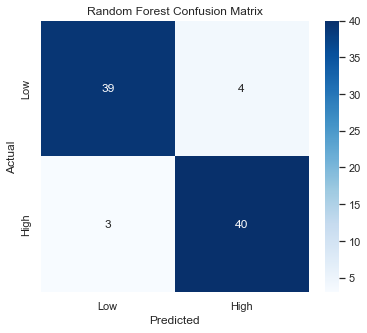

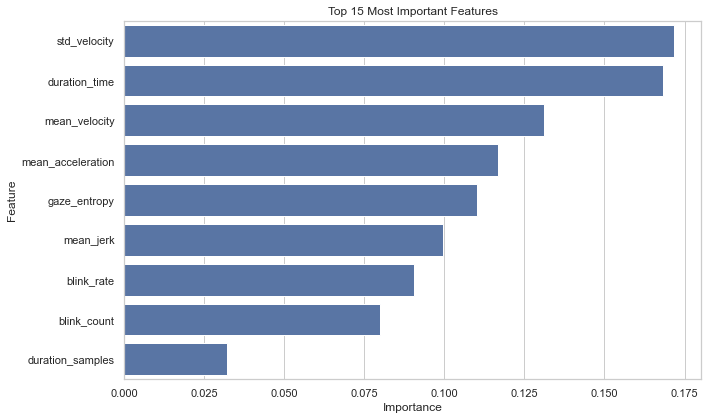

In [82]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the entropy-based feature set
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Assign labels: 0 = Low Load (trial 0,1), 1 = High Load (trial 2,3)
df['label'] = df['trial_number'].apply(lambda x: 1 if x in [2, 3] else 0)

# Drop non-feature columns
non_feature_cols = ['participant_id', 'trial_number', 'condition', 'trial_type', 'file_path', 'label']
X = df.drop(columns=non_feature_cols)
y = df['label']

# Fill missing values
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature Importance
importances = clf.feature_importances_
feat_names = df.drop(columns=non_feature_cols).columns
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Top Features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


In [83]:
import os
import pandas as pd
import numpy as np

# Constants
INPUT_LENGTH = 2048
CHANNELS = ['abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']

# Folders (update these if your ZIPs extract to different names)
first_trials_path = "first trials"
repeats_path = "repeats"

# --- Helper Functions ---
def parse_filename(file_name):
    base = file_name.replace(".csv", "")
    participant_id, task_id = base.split("_")
    return participant_id, int(task_id)

def build_metadata(folder_path, trial_type):
    files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    data = []
    for f in files:
        try:
            pid, trial = parse_filename(f)
            data.append({
                'file_name': f,
                'participant_id': pid,
                'trial_number': trial,
                'trial_type': trial_type,
                'file_path': os.path.join(folder_path, f)
            })
        except Exception as e:
            print("❌ Filename parse error:", f)
    return pd.DataFrame(data)

# --- Load Metadata ---
first_meta = build_metadata(first_trials_path, 'first')
repeat_meta = build_metadata(repeats_path, 'repeat')
df_meta = pd.concat([first_meta, repeat_meta], ignore_index=True)

# --- Label Assignment ---
df_meta = df_meta[df_meta['trial_number'].isin([0, 1, 2, 3])]
df_meta['label'] = df_meta['trial_number'].apply(lambda x: 1 if x in [2, 3] else 0)

# --- Data Loader ---
X_list = []
y_list = []
skipped = []

for _, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['file_path'])
        
        # Check for required columns
        if not all(col in df.columns for col in CHANNELS):
            skipped.append((row['file_name'], 'Missing columns'))
            continue

        df = df[CHANNELS]

        # Drop if missing data or too short
        if df.isnull().values.any() or len(df) < 100:
            skipped.append((row['file_name'], 'Too short or NaNs'))
            continue

        # Normalize
        df = (df - df.mean()) / df.std()

        # Pad or Truncate to 2048
        if len(df) < INPUT_LENGTH:
            pad_len = INPUT_LENGTH - len(df)
            df = np.pad(df, ((0, pad_len), (0, 0)), mode='constant')
        else:
            df = df.iloc[:INPUT_LENGTH].values

        X_list.append(df)
        y_list.append(row['label'])

    except Exception as e:
        skipped.append((row['file_name'], str(e)))

# --- Final Arrays ---
X = np.array(X_list)
y = np.array(y_list)

print(f"✅ Final dataset shape: {X.shape}, Labels: {np.bincount(y)}")
print(f"❌ Skipped trials: {len(skipped)}")


✅ Final dataset shape: (249, 2048, 5), Labels: [129 120]
❌ Skipped trials: 27


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dense, Dropout, Flatten, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Build CNN model
model = Sequential([
    InputLayer(input_shape=(2048, 5)),

    Conv1D(32, kernel_size=7, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),

    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2048, 32)          1152      
                                                                 
 batch_normalization (Batch  (None, 2048, 32)          128       
 Normalization)                                                  
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1024, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 1024, 64)          10304     
                                                                 
 batch_normalization_1 (Bat  (None, 1024, 64)          256       
 chNormalization)                                                
                                                      

Epoch 1/30
10/10 [==============================] - 11s 520ms/step - loss: nan - accuracy: 0.5535 - val_loss: nan - val_accuracy: 0.3750
Epoch 2/30
10/10 [==============================] - 4s 355ms/step - loss: nan - accuracy: 0.5535 - val_loss: nan - val_accuracy: 0.3750
Epoch 3/30
10/10 [==============================] - 3s 328ms/step - loss: nan - accuracy: 0.5535 - val_loss: nan - val_accuracy: 0.3750
Epoch 4/30
10/10 [==============================] - 2s 204ms/step - loss: nan - accuracy: 0.5535 - val_loss: nan - val_accuracy: 0.3750
Epoch 5/30
10/10 [==============================] - 2s 238ms/step - loss: nan - accuracy: 0.5535 - val_loss: nan - val_accuracy: 0.3750


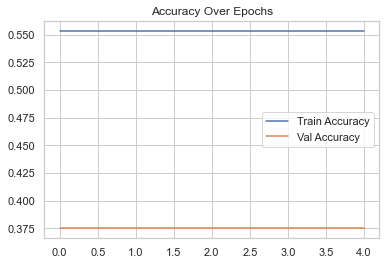

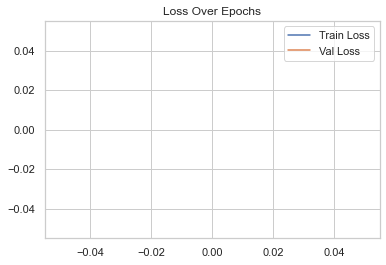

In [85]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [86]:
# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 [==============================] - 0s 36ms/step
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        26
           1       0.00      0.00      0.00        24

    accuracy                           0.52        50
   macro avg       0.26      0.50      0.34        50
weighted avg       0.27      0.52      0.36        50

Confusion Matrix:
[[26  0]
 [24  0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(64, kernel_size=7, activation='relu', input_shape=(2048, 5)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))

# Step 3: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
13/13 [==============================] - 30s 1s/step - loss: nan - accuracy: 0.6030 - val_loss: nan - val_accuracy: 0.5200
Epoch 2/30
13/13 [==============================] - 16s 1s/step - loss: nan - accuracy: 0.5176 - val_loss: nan - val_accuracy: 0.5200
Epoch 3/30
13/13 [==============================] - 18s 1s/step - loss: nan - accuracy: 0.5176 - val_loss: nan - val_accuracy: 0.5200
Epoch 4/30
13/13 [==============================] - 17s 1s/step - loss: nan - accuracy: 0.5176 - val_loss: nan - val_accuracy: 0.5200
Epoch 5/30
13/13 [==============================] - 13s 950ms/step - loss: nan - accuracy: 0.5176 - val_loss: nan - val_accuracy: 0.5200


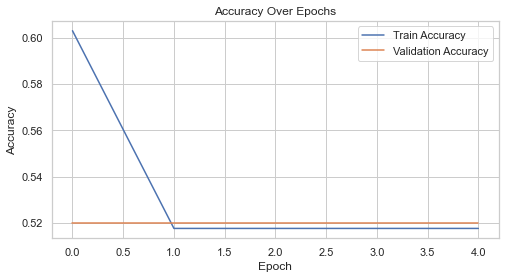

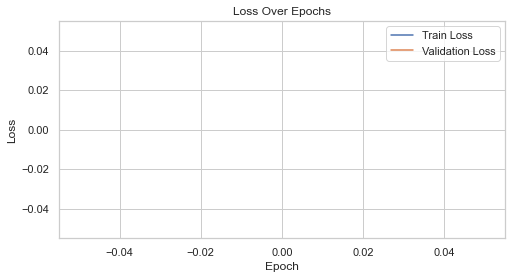

In [89]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # for softmax output
y_true = y_test  # already assumed to be label encoded


2/2 [==============================] - 2s 159ms/step


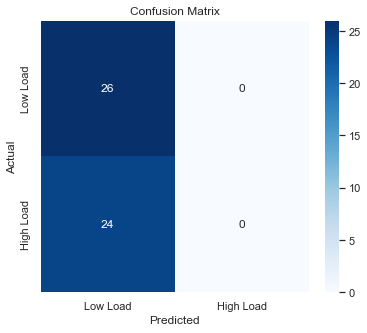

In [91]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Load', 'High Load'],
            yticklabels=['Low Load', 'High Load'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

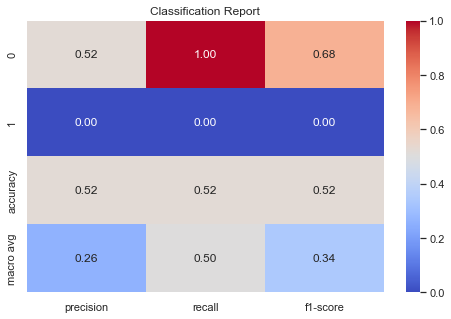

In [92]:
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report')
plt.show()


In [93]:
print("Example logits:", model.predict(X_val[:5]))


1/1 [==============================] - 0s 222ms/step
Example logits: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [94]:
print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any NaNs in X_val?", np.isnan(X_val).any())
print("Any infs in X_train?", np.isinf(X_train).any())


Any NaNs in X_train? True
Any NaNs in X_val? True
Any infs in X_train? False


CNN Model

In [95]:
import os
import pandas as pd
import numpy as np

# --- Constants ---
INPUT_LENGTH = 2048
CHANNELS = ['abs_lx', 'abs_ly', 'abs_rx', 'abs_ry', 'open_eyes']
first_trials_path = "first trials"
repeats_path = "repeats"

# --- Helper Functions ---
def parse_filename(file_name):
    base = file_name.replace(".csv", "")
    participant_id, task_id = base.split("_")
    return participant_id, int(task_id)

def build_metadata(folder_path, trial_type):
    files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    data = []
    for f in files:
        try:
            pid, trial = parse_filename(f)
            data.append({
                'file_name': f,
                'participant_id': pid,
                'trial_number': trial,
                'trial_type': trial_type,
                'file_path': os.path.join(folder_path, f)
            })
        except Exception as e:
            print("❌ Filename parse error:", f)
    return pd.DataFrame(data)

# --- Metadata Construction ---
first_meta = build_metadata(first_trials_path, 'first')
repeat_meta = build_metadata(repeats_path, 'repeat')
df_meta = pd.concat([first_meta, repeat_meta], ignore_index=True)

# --- Assign Labels: trial_number 0/1 → Low Load (0), 2/3 → High Load (1) ---
df_meta = df_meta[df_meta['trial_number'].isin([0, 1, 2, 3])]
df_meta['label'] = df_meta['trial_number'].apply(lambda x: 1 if x in [2, 3] else 0)

# --- Data Loading ---
X_list, y_list, skipped = [], [], []

for _, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['file_path'])

        # Ensure required columns exist
        if not all(col in df.columns for col in CHANNELS):
            skipped.append((row['file_name'], 'Missing columns'))
            continue

        df = df[CHANNELS]

        # Drop rows with NaNs or short recordings
        if df.isnull().values.any() or len(df) < 100:
            skipped.append((row['file_name'], 'Too short or NaNs'))
            continue

        # --- Safe Normalization ---
        df = df.apply(lambda x: (x - x.mean()) / (x.std() if x.std() != 0 else 1), axis=0)

        # Replace remaining NaNs if any
        df = df.fillna(0)

        # --- Padding / Truncating ---
        if len(df) < INPUT_LENGTH:
            pad_len = INPUT_LENGTH - len(df)
            df = np.pad(df, ((0, pad_len), (0, 0)), mode='constant')
        else:
            df = df.iloc[:INPUT_LENGTH].values

        X_list.append(df)
        y_list.append(row['label'])

    except Exception as e:
        skipped.append((row['file_name'], str(e)))

# --- Final Dataset ---
X = np.array(X_list)
y = np.array(y_list)

print(f"✅ Final dataset shape: {X.shape}, Labels distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
print(f"❌ Skipped trials: {len(skipped)}")


✅ Final dataset shape: (249, 2048, 5), Labels distribution: {0: 129, 1: 120}
❌ Skipped trials: 27


In [96]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical


In [97]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# One-hot encoding (for softmax classification)
y_train_cat = to_categorical(y_train, 2)
y_val_cat = to_categorical(y_val, 2)
y_test_cat = to_categorical(y_test, 2)


In [98]:
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(cw))
print("Class weights:", class_weights)


Class weights: {0: 0.9695121951219512, 1: 1.0324675324675325}


In [99]:
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(2048, 5)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Softmax for 2-class classification
])


In [100]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [101]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=30,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
10/10 [==============================] - 9s 489ms/step - loss: 11.3812 - accuracy: 0.5786 - val_loss: 0.8596 - val_accuracy: 0.7750
Epoch 2/30
10/10 [==============================] - 5s 478ms/step - loss: 3.0593 - accuracy: 0.7862 - val_loss: 0.5638 - val_accuracy: 0.7500
Epoch 3/30
10/10 [==============================] - 5s 528ms/step - loss: 0.4692 - accuracy: 0.8491 - val_loss: 0.4845 - val_accuracy: 0.8000
Epoch 4/30
10/10 [==============================] - 5s 477ms/step - loss: 0.4047 - accuracy: 0.8176 - val_loss: 0.4480 - val_accuracy: 0.8250
Epoch 5/30
10/10 [==============================] - 5s 509ms/step - loss: 0.2957 - accuracy: 0.8742 - val_loss: 0.4842 - val_accuracy: 0.8250
Epoch 6/30
10/10 [==============================] - 5s 481ms/step - loss: 0.4212 - accuracy: 0.8616 - val_loss: 0.4305 - val_accuracy: 0.8500
Epoch 7/30
10/10 [==============================] - 5s 560ms/step - loss: 0.3070 - accuracy: 0.8428 - val_loss: 0.4254 - val_accuracy: 0.8250
Epoch

In [102]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Sanity check on prediction distribution
unique, counts = np.unique(y_pred, return_counts=True)
print("Predicted label counts:", dict(zip(unique, counts)))


✅ Test Accuracy: 0.8200
2/2 [==============================] - 0s 85ms/step
Predicted label counts: {0: 23, 1: 27}


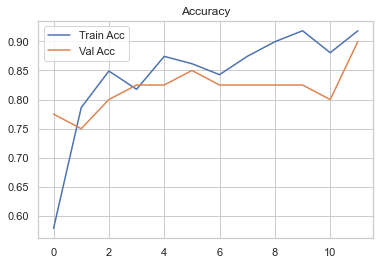

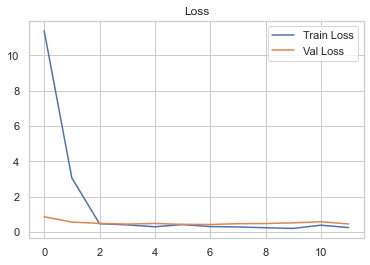

In [103]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy"); plt.grid(True); plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss"); plt.grid(True); plt.show()


CNN + LSTM Model

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical


In [105]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# One-hot encode for softmax
y_train_cat = to_categorical(y_train, 2)
y_val_cat = to_categorical(y_val, 2)
y_test_cat = to_categorical(y_test, 2)


In [106]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))


In [107]:
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(2048, 5)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])


In [108]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [109]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=30,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
10/10 [==============================] - 14s 740ms/step - loss: 0.6387 - accuracy: 0.6604 - val_loss: 0.6221 - val_accuracy: 0.6250
Epoch 2/30
10/10 [==============================] - 7s 650ms/step - loss: 0.4743 - accuracy: 0.7987 - val_loss: 0.4571 - val_accuracy: 0.7500
Epoch 3/30
10/10 [==============================] - 7s 711ms/step - loss: 0.4651 - accuracy: 0.8239 - val_loss: 0.4324 - val_accuracy: 0.7500
Epoch 4/30
10/10 [==============================] - 6s 628ms/step - loss: 0.4446 - accuracy: 0.8050 - val_loss: 0.5029 - val_accuracy: 0.7500
Epoch 5/30
10/10 [==============================] - 7s 689ms/step - loss: 0.3835 - accuracy: 0.8365 - val_loss: 0.3938 - val_accuracy: 0.8250
Epoch 6/30
10/10 [==============================] - 8s 784ms/step - loss: 0.3694 - accuracy: 0.8428 - val_loss: 0.4087 - val_accuracy: 0.8250
Epoch 7/30
10/10 [==============================] - 6s 621ms/step - loss: 0.3011 - accuracy: 0.8742 - val_loss: 0.4415 - val_accuracy: 0.7500
Epoch

In [110]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")


✅ Test Accuracy: 0.8200


In [111]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


2/2 [==============================] - 1s 198ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.86      0.75      0.80        24

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50

Confusion Matrix:
 [[23  3]
 [ 6 18]]


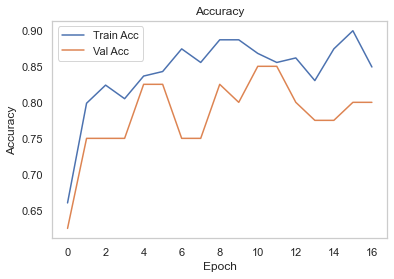

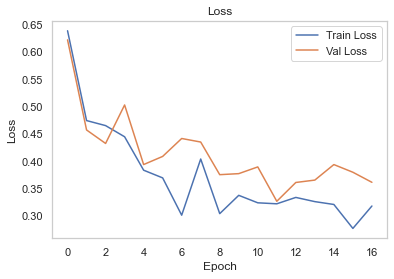

In [112]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(); plt.legend(); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(); plt.legend(); plt.show()


Voting Classifier + SHAP

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.83      0.79      0.81        43

    accuracy                           0.81        86
   macro avg       0.81      0.81      0.81        86
weighted avg       0.81      0.81      0.81        86

Confusion Matrix:
 [[36  7]
 [ 9 34]]


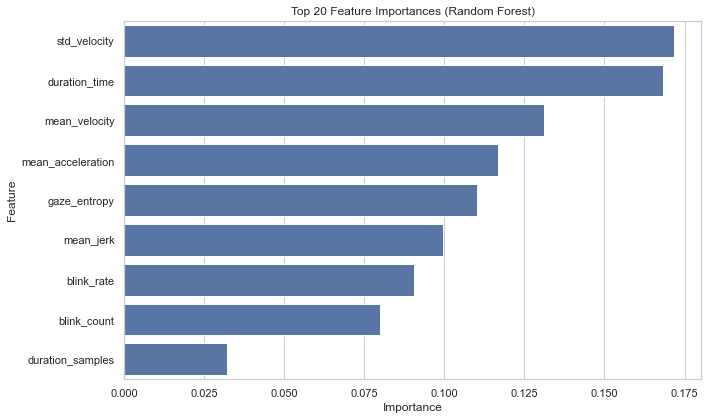

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# 2. Assign Labels (as per EM-COGLOAD paper)
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [2, 3] else 0)

# 3. Feature & Target Separation
non_feature_cols = ["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"]
X = df.drop(columns=non_feature_cols, errors='ignore')
y = df["label"]

# 4. Clean Data
X = X.fillna(X.mean())

# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Define Base Models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# 8. Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('mlp', mlp)],
    voting='soft'
)

# 9. Train Model
voting_clf.fit(X_train, y_train)

# 10. Evaluate
y_pred = voting_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 11. Feature Importance from Random Forest (Explainability fallback)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# 12. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [114]:
# import shap
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert X_test to DataFrame
# X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# # ✅ Use TreeExplainer for tree models like Random Forest
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test_scaled)

# # Print diagnostics
# print("SHAP shape for class 0:", np.array(shap_values[0]).shape)
# print("SHAP shape for class 1:", np.array(shap_values[1]).shape)
# print("X_test_df shape:", X_test_df.shape)

# # ✅ Ensure the shapes match (samples, features)
# if np.array(shap_values[1]).shape == X_test_df.shape:
#     # Summary plot for class 1 (high cognitive load)
#     shap.summary_plot(shap_values[1], X_test_df, plot_type="dot", max_display=12)
# else:
#     print("❌ Shape mismatch again, trying unified model-agnostic SHAP Explainer...")

#     # ✅ Unified SHAP explainer (fallback)
#     unified_explainer = shap.Explainer(rf.predict, X_train_scaled)
#     unified_shap_values = unified_explainer(X_test_scaled)

#     print("Unified SHAP shape:", unified_shap_values.values.shape)

#     # ✅ Plot beeswarm with unified SHAP values
#     shap.plots.beeswarm(unified_shap_values, max_display=12)


TCN and ViT

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# --- Load Data ---
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")
if 'label' not in df.columns:
    df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

X = df.drop(columns=[col for col in ["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"] if col in df.columns])
y = df['label'].values

# --- Normalize and Reshape ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.repeat(X_scaled[:, np.newaxis, :], 2048, axis=1)  # Repeat to simulate sequence

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# --- TCN Model ---
def build_tcn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, 3, padding="causal", activation="relu", dilation_rate=1)(inputs)
    x = layers.Conv1D(64, 3, padding="causal", activation="relu", dilation_rate=2)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="sigmoid")(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# --- ViT Model ---
def build_vit_model(input_shape, num_classes, patch_size=64, projection_dim=64, num_heads=4, transformer_units=[64, 64], num_transformer_blocks=2):
    inputs = layers.Input(shape=input_shape)
    num_patches = input_shape[0] // patch_size
    x = layers.Reshape((num_patches, patch_size * input_shape[1]))(inputs)
    x = layers.Dense(projection_dim)(x)

    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization()(x)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x1, x1)
        x2 = layers.Add()([x, attention_output])
        x3 = layers.LayerNormalization()(x2)
        x3 = layers.Dense(transformer_units[0], activation='relu')(x3)
        x3 = layers.Dense(projection_dim, activation='relu')(x3)
        x = layers.Add()([x2, x3])

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# --- Instantiate Models ---
input_shape = (2048, X.shape[1])
tcn_model = build_tcn_model(input_shape, 1)
vit_model = build_vit_model(input_shape, 1)

# --- Summary ---
tcn_model.summary()
vit_model.summary()

# --- Training Example ---
# tcn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)
# vit_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048, 9)]         0         
                                                                 
 conv1d_11 (Conv1D)          (None, 2048, 64)          1792      
                                                                 
 conv1d_12 (Conv1D)          (None, 2048, 64)          12352     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                             

TCN + ViT ( Hybrid Model)

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

# ----------------------
# Step 1: Load and Preprocess Data
# ----------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Filter only valid trials and label
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop unnecessary metadata
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_seq = np.expand_dims(X_scaled, axis=1)  # Add time dimension for TCN

# Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------
# Step 2: Define TCN + ViT Model
# ----------------------
def build_tcn_vit_model(input_shape):
    inputs = Input(shape=input_shape)

    # ----- TCN Branch -----
    x_tcn = layers.Conv1D(64, kernel_size=2, padding="causal", activation="relu")(inputs)
    x_tcn = layers.Conv1D(64, kernel_size=2, padding="causal", activation="relu")(x_tcn)
    x_tcn = layers.GlobalAveragePooling1D()(x_tcn)

    # ----- ViT Branch -----
    x_vit = layers.Conv1D(64, kernel_size=1)(inputs)
    x_vit = layers.LayerNormalization()(x_vit)
    x_vit = layers.MultiHeadAttention(num_heads=2, key_dim=32)(x_vit, x_vit)
    x_vit = layers.GlobalAveragePooling1D()(x_vit)

    # ----- Merge -----
    x = layers.Concatenate()([x_tcn, x_vit])
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# ----------------------
# Step 3: Train Model
# ----------------------
model = build_tcn_vit_model(X_train.shape[1:])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

# ----------------------
# Step 4: Evaluation
# ----------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1, 9)]               0         []                            
                                                                                                  
 conv1d_15 (Conv1D)          (None, 1, 64)                640       ['input_4[0][0]']             
                                                                                                  
 conv1d_13 (Conv1D)          (None, 1, 64)                1216      ['input_4[0][0]']             
                                                                                                  
 layer_normalization_4 (Lay  (None, 1, 64)                128       ['conv1d_15[0][0]']           
 erNormalization)                                                                           

In [203]:
from sklearn.model_selection import GroupShuffleSplit

# ----------------------
# Step 1: Load and Preprocess Data
# ----------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Filter only valid trials and add binary label
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Features and target
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"]
groups = df["participant_id"]  # group = participant

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Expand dims → (samples, 1, n_features)
X_seq = np.expand_dims(X_scaled, axis=1)

# ----------------------
# Step 2: Grouped Train-Test Split
# ----------------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X_seq, y, groups=groups))

X_train, X_test = X_seq[train_idx], X_seq[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("Train participants:", len(set(groups.iloc[train_idx])))
print("Test participants:", len(set(groups.iloc[test_idx])))

# ----------------------
# Step 3 onwards: Build, Train, Evaluate Model (same as before)
# ----------------------


Train participants: 41
Test participants: 11


Model: "model_110"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 1, 9)]               0         []                            
                                                                                                  
 conv1d_32 (Conv1D)          (None, 1, 64)                640       ['input_11[0][0]']            
                                                                                                  
 conv1d_30 (Conv1D)          (None, 1, 64)                640       ['input_11[0][0]']            
                                                                                                  
 layer_normalization_13 (La  (None, 1, 64)                128       ['conv1d_32[0][0]']           
 yerNormalization)                                                                        

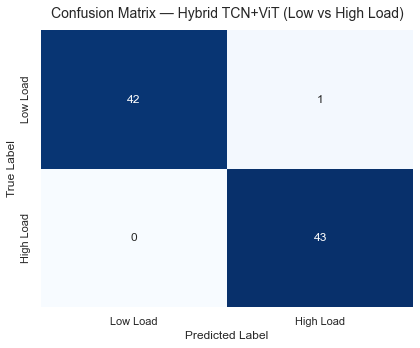

In [201]:
# ==============================
# Hybrid TCN + ViT Classifier
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

# ----------------------
# Step 1: Load and Preprocess Data
# ----------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Filter only valid trials and add binary label (1=High, 0=Low)
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop metadata
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Expand dims → shape = (samples, 1, n_features)
X_seq = np.expand_dims(X_scaled, axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------
# Step 2: Define TCN + ViT Model
# ----------------------
def build_tcn_vit_model(input_shape):
    inputs = Input(shape=input_shape)  # e.g. (1, n_features)

    # ----- TCN Branch -----
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu")(inputs)
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu")(x_tcn)
    x_tcn = layers.GlobalAveragePooling1D()(x_tcn)

    # ----- ViT Branch -----
    x_vit = layers.Conv1D(64, kernel_size=1)(inputs)
    x_vit = layers.LayerNormalization()(x_vit)
    x_vit = layers.MultiHeadAttention(num_heads=2, key_dim=32)(x_vit, x_vit)
    x_vit = layers.GlobalAveragePooling1D()(x_vit)

    # ----- Merge -----
    x = layers.Concatenate()([x_tcn, x_vit])
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# ----------------------
# Step 3: Train Model
# ----------------------
model = build_tcn_vit_model(X_train.shape[1:])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

# ----------------------
# Step 4: Evaluation
# ----------------------
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Load", "High Load"]))

# ----------------------
# Step 5: Confusion Matrix Plot
# ----------------------
cm = confusion_matrix(y_test, y_pred)
labels = ["Low Load", "High Load"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title("Confusion Matrix — Hybrid TCN+ViT (Low vs High Load)", fontsize=14, pad=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()


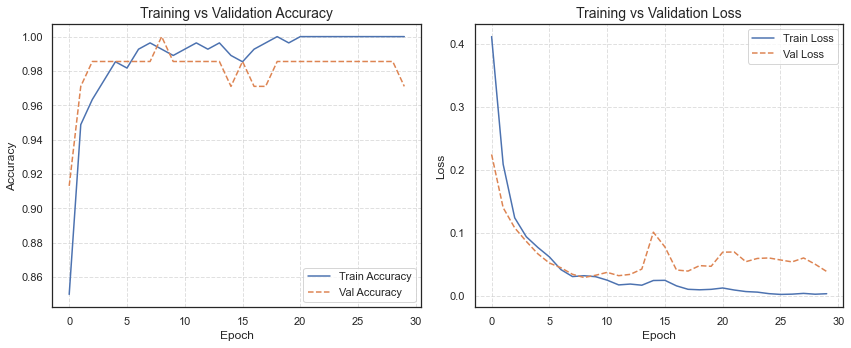

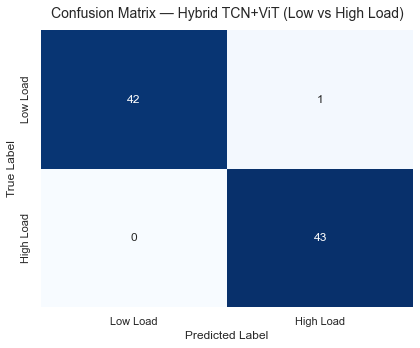

In [202]:
# ----------------------
# Step 6: Training Curves
# ----------------------
plt.figure(figsize=(12,5))

# --- Accuracy plot ---
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy", linestyle="--")
plt.title("Training vs Validation Accuracy", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# --- Loss plot ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss", linestyle="--")
plt.title("Training vs Validation Loss", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# ----------------------
# Step 7: Confusion Matrix (already done)
# ----------------------
cm = confusion_matrix(y_test, y_pred)
labels = ["Low Load", "High Load"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title("Confusion Matrix — Hybrid TCN+ViT (Low vs High Load)", fontsize=14, pad=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()


2/2 [==============================] - 2s 33ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

797/797 [==============================] - 6s 8ms/step


  2%|▏         | 1/50 [00:08<07:00,  8.58s/it]

797/797 [==============================] - 4s 5ms/step


  4%|▍         | 2/50 [00:13<05:10,  6.46s/it]

797/797 [==============================] - 3s 4ms/step


  6%|▌         | 3/50 [00:17<04:03,  5.18s/it]

797/797 [==============================] - 5s 6ms/step


  8%|▊         | 4/50 [00:23<04:09,  5.42s/it]

797/797 [==============================] - 4s 5ms/step


 10%|█         | 5/50 [00:27<03:51,  5.14s/it]

797/797 [==============================] - 3s 4ms/step


 12%|█▏        | 6/50 [00:31<03:27,  4.72s/it]

797/797 [==============================] - 3s 4ms/step


 14%|█▍        | 7/50 [00:35<03:15,  4.55s/it]

797/797 [==============================] - 4s 5ms/step


 16%|█▌        | 8/50 [00:40<03:08,  4.48s/it]

797/797 [==============================] - 3s 4ms/step


 18%|█▊        | 9/50 [00:44<02:57,  4.34s/it]

797/797 [==============================] - 3s 4ms/step


 20%|██        | 10/50 [00:47<02:46,  4.16s/it]

797/797 [==============================] - 3s 4ms/step


 22%|██▏       | 11/50 [00:51<02:35,  4.00s/it]

797/797 [==============================] - 3s 4ms/step


 24%|██▍       | 12/50 [00:55<02:28,  3.91s/it]

797/797 [==============================] - 3s 4ms/step


 26%|██▌       | 13/50 [00:58<02:21,  3.84s/it]

797/797 [==============================] - 3s 4ms/step


 28%|██▊       | 14/50 [01:02<02:20,  3.89s/it]

797/797 [==============================] - 3s 4ms/step


 30%|███       | 15/50 [01:06<02:14,  3.83s/it]

797/797 [==============================] - 3s 4ms/step


 32%|███▏      | 16/50 [01:10<02:13,  3.92s/it]

797/797 [==============================] - 3s 3ms/step


 34%|███▍      | 17/50 [01:14<02:03,  3.75s/it]

797/797 [==============================] - 3s 4ms/step


 36%|███▌      | 18/50 [01:17<01:56,  3.65s/it]

797/797 [==============================] - 3s 4ms/step


 38%|███▊      | 19/50 [01:21<01:55,  3.72s/it]

797/797 [==============================] - 3s 4ms/step


 40%|████      | 20/50 [01:25<01:54,  3.82s/it]

797/797 [==============================] - 3s 3ms/step


 42%|████▏     | 21/50 [01:28<01:46,  3.66s/it]

797/797 [==============================] - 4s 5ms/step


 44%|████▍     | 22/50 [01:32<01:47,  3.83s/it]

797/797 [==============================] - 3s 3ms/step


 46%|████▌     | 23/50 [01:36<01:38,  3.64s/it]

797/797 [==============================] - 3s 4ms/step


 48%|████▊     | 24/50 [01:39<01:36,  3.70s/it]

797/797 [==============================] - 3s 4ms/step


 50%|█████     | 25/50 [01:43<01:33,  3.72s/it]

797/797 [==============================] - 3s 4ms/step


 52%|█████▏    | 26/50 [01:47<01:29,  3.71s/it]

797/797 [==============================] - 3s 4ms/step


 54%|█████▍    | 27/50 [01:50<01:24,  3.65s/it]

797/797 [==============================] - 3s 4ms/step


 56%|█████▌    | 28/50 [01:54<01:21,  3.72s/it]

797/797 [==============================] - 3s 4ms/step


 58%|█████▊    | 29/50 [01:58<01:17,  3.69s/it]

797/797 [==============================] - 4s 5ms/step


 60%|██████    | 30/50 [02:03<01:20,  4.01s/it]

797/797 [==============================] - 3s 4ms/step


 62%|██████▏   | 31/50 [02:07<01:15,  3.97s/it]

797/797 [==============================] - 3s 4ms/step


 64%|██████▍   | 32/50 [02:10<01:10,  3.94s/it]

797/797 [==============================] - 3s 3ms/step


 66%|██████▌   | 33/50 [02:14<01:03,  3.75s/it]

797/797 [==============================] - 3s 3ms/step


 68%|██████▊   | 34/50 [02:17<00:57,  3.60s/it]

797/797 [==============================] - 3s 4ms/step


 70%|███████   | 35/50 [02:20<00:53,  3.54s/it]

797/797 [==============================] - 3s 4ms/step


 72%|███████▏  | 36/50 [02:24<00:51,  3.68s/it]

797/797 [==============================] - 3s 3ms/step


 74%|███████▍  | 37/50 [02:28<00:45,  3.52s/it]

797/797 [==============================] - 3s 3ms/step


 76%|███████▌  | 38/50 [02:31<00:41,  3.46s/it]

797/797 [==============================] - 3s 3ms/step


 78%|███████▊  | 39/50 [02:34<00:37,  3.39s/it]

797/797 [==============================] - 4s 5ms/step


 80%|████████  | 40/50 [02:39<00:38,  3.86s/it]

797/797 [==============================] - 3s 4ms/step


 82%|████████▏ | 41/50 [02:43<00:34,  3.87s/it]

797/797 [==============================] - 3s 3ms/step


 84%|████████▍ | 42/50 [02:46<00:29,  3.67s/it]

797/797 [==============================] - 3s 4ms/step


 86%|████████▌ | 43/50 [02:50<00:25,  3.63s/it]

797/797 [==============================] - 3s 4ms/step


 88%|████████▊ | 44/50 [02:54<00:22,  3.72s/it]

797/797 [==============================] - 3s 3ms/step


 90%|█████████ | 45/50 [02:57<00:17,  3.59s/it]

797/797 [==============================] - 3s 4ms/step


 92%|█████████▏| 46/50 [03:01<00:14,  3.65s/it]

797/797 [==============================] - 4s 4ms/step


 94%|█████████▍| 47/50 [03:05<00:11,  3.79s/it]

797/797 [==============================] - 3s 4ms/step


 96%|█████████▌| 48/50 [03:09<00:07,  3.78s/it]

797/797 [==============================] - 3s 3ms/step


 98%|█████████▊| 49/50 [03:12<00:03,  3.60s/it]

797/797 [==============================] - 3s 3ms/step


100%|██████████| 50/50 [03:15<00:00,  3.91s/it]
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/1193187797.py:23: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample_flat, feature_names=X.columns)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


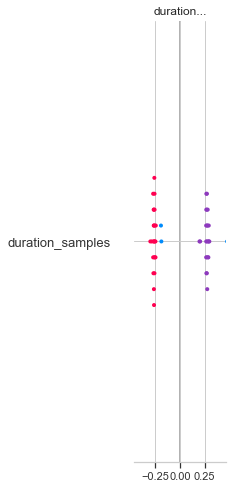

In [258]:
import shap
import numpy as np

# -------------------------------
# Prepare background sample for SHAP
# -------------------------------
X_sample = X_train[:50]  # shape (50,1,n_features)

# Wrapper: reshapes flat input from SHAP to the model's expected input
def model_wrapper(x_flat):
    # x_flat: (samples, n_features)
    x_reshaped = x_flat[:, np.newaxis, :]  # add time dimension → (samples,1,n_features)
    return model.predict(x_reshaped)

# Flatten input for SHAP explainer
X_sample_flat = X_sample.reshape(X_sample.shape[0], X_sample.shape[2])

# KernelExplainer
explainer = shap.KernelExplainer(model_wrapper, X_sample_flat)
shap_values = explainer.shap_values(X_sample_flat)

# SHAP summary plot
shap.summary_plot(shap_values, X_sample_flat, feature_names=X.columns)


2/2 [==============================] - 0s 19ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 1s 8ms/step


  2%|▏         | 1/50 [00:02<02:01,  2.47s/it]

157/157 [==============================] - 1s 8ms/step


  4%|▍         | 2/50 [00:04<01:53,  2.36s/it]

157/157 [==============================] - 1s 6ms/step


  6%|▌         | 3/50 [00:06<01:33,  1.99s/it]

157/157 [==============================] - 1s 9ms/step


  8%|▊         | 4/50 [00:08<01:33,  2.02s/it]

157/157 [==============================] - 1s 7ms/step


 10%|█         | 5/50 [00:10<01:32,  2.06s/it]

157/157 [==============================] - 1s 6ms/step


 12%|█▏        | 6/50 [00:12<01:23,  1.90s/it]

157/157 [==============================] - 1s 5ms/step


 14%|█▍        | 7/50 [00:13<01:15,  1.75s/it]

157/157 [==============================] - 1s 7ms/step


 16%|█▌        | 8/50 [00:15<01:14,  1.77s/it]

157/157 [==============================] - 1s 6ms/step


 18%|█▊        | 9/50 [00:16<01:10,  1.73s/it]

157/157 [==============================] - 1s 5ms/step


 20%|██        | 10/50 [00:18<01:03,  1.59s/it]

157/157 [==============================] - 1s 7ms/step


 22%|██▏       | 11/50 [00:20<01:04,  1.65s/it]

157/157 [==============================] - 1s 5ms/step


 24%|██▍       | 12/50 [00:21<00:58,  1.53s/it]

157/157 [==============================] - 1s 7ms/step


 26%|██▌       | 13/50 [00:23<00:59,  1.60s/it]

157/157 [==============================] - 1s 6ms/step


 28%|██▊       | 14/50 [00:24<00:54,  1.51s/it]

157/157 [==============================] - 0s 3ms/step


 30%|███       | 15/50 [00:25<00:43,  1.25s/it]

157/157 [==============================] - 0s 2ms/step


 32%|███▏      | 16/50 [00:25<00:36,  1.06s/it]

157/157 [==============================] - 0s 2ms/step


 34%|███▍      | 17/50 [00:26<00:30,  1.08it/s]

157/157 [==============================] - 1s 3ms/step


 36%|███▌      | 18/50 [00:27<00:28,  1.12it/s]

157/157 [==============================] - 0s 3ms/step


 38%|███▊      | 19/50 [00:27<00:26,  1.19it/s]

157/157 [==============================] - 0s 3ms/step


 40%|████      | 20/50 [00:28<00:23,  1.26it/s]

157/157 [==============================] - 0s 3ms/step


 42%|████▏     | 21/50 [00:29<00:21,  1.32it/s]

157/157 [==============================] - 1s 5ms/step


 44%|████▍     | 22/50 [00:30<00:25,  1.08it/s]

157/157 [==============================] - 1s 4ms/step


 46%|████▌     | 23/50 [00:31<00:26,  1.01it/s]

157/157 [==============================] - 0s 3ms/step


 48%|████▊     | 24/50 [00:32<00:23,  1.11it/s]

157/157 [==============================] - 0s 2ms/step


 50%|█████     | 25/50 [00:32<00:20,  1.21it/s]

157/157 [==============================] - 0s 3ms/step


 52%|█████▏    | 26/50 [00:33<00:18,  1.30it/s]

157/157 [==============================] - 0s 2ms/step


 54%|█████▍    | 27/50 [00:34<00:16,  1.39it/s]

157/157 [==============================] - 0s 2ms/step


 56%|█████▌    | 28/50 [00:34<00:15,  1.44it/s]

157/157 [==============================] - 0s 2ms/step


 58%|█████▊    | 29/50 [00:35<00:14,  1.47it/s]

157/157 [==============================] - 0s 2ms/step


 60%|██████    | 30/50 [00:36<00:13,  1.47it/s]

157/157 [==============================] - 0s 3ms/step


 62%|██████▏   | 31/50 [00:36<00:12,  1.50it/s]

157/157 [==============================] - 1s 3ms/step


 64%|██████▍   | 32/50 [00:37<00:12,  1.44it/s]

157/157 [==============================] - 1s 4ms/step


 66%|██████▌   | 33/50 [00:38<00:12,  1.36it/s]

157/157 [==============================] - 0s 2ms/step


 68%|██████▊   | 34/50 [00:39<00:11,  1.42it/s]

157/157 [==============================] - 0s 2ms/step


 70%|███████   | 35/50 [00:39<00:10,  1.45it/s]

157/157 [==============================] - 0s 2ms/step


 72%|███████▏  | 36/50 [00:40<00:09,  1.49it/s]

157/157 [==============================] - 0s 3ms/step


 74%|███████▍  | 37/50 [00:40<00:08,  1.51it/s]

157/157 [==============================] - 0s 3ms/step


 76%|███████▌  | 38/50 [00:41<00:07,  1.52it/s]

157/157 [==============================] - 0s 3ms/step


 78%|███████▊  | 39/50 [00:42<00:07,  1.51it/s]

157/157 [==============================] - 0s 3ms/step


 80%|████████  | 40/50 [00:42<00:06,  1.49it/s]

157/157 [==============================] - 0s 3ms/step


 82%|████████▏ | 41/50 [00:43<00:06,  1.48it/s]

157/157 [==============================] - 0s 2ms/step


 84%|████████▍ | 42/50 [00:44<00:05,  1.52it/s]

157/157 [==============================] - 1s 6ms/step


 86%|████████▌ | 43/50 [00:45<00:05,  1.21it/s]

157/157 [==============================] - 1s 3ms/step


 88%|████████▊ | 44/50 [00:46<00:04,  1.21it/s]

157/157 [==============================] - 0s 2ms/step


 90%|█████████ | 45/50 [00:46<00:03,  1.31it/s]

157/157 [==============================] - 0s 3ms/step


 92%|█████████▏| 46/50 [00:47<00:02,  1.35it/s]

157/157 [==============================] - 0s 2ms/step


 94%|█████████▍| 47/50 [00:48<00:02,  1.40it/s]

157/157 [==============================] - 0s 2ms/step


 96%|█████████▌| 48/50 [00:48<00:01,  1.47it/s]

157/157 [==============================] - 0s 3ms/step


 98%|█████████▊| 49/50 [00:49<00:00,  1.50it/s]

157/157 [==============================] - 0s 2ms/step


100%|██████████| 50/50 [00:50<00:00,  1.00s/it]
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/3783587525.py:31: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample_df)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


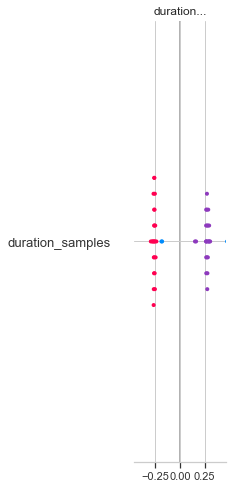

In [261]:
import shap
import numpy as np

# -------------------------
# Flatten input for SHAP
# -------------------------
# Your original X_train shape: (samples, 1, n_features)
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[2])

# -------------------------
# Use a small subset for speed
# -------------------------
X_sample = X_train_flat[:50]  # 50 samples

# -------------------------
# KernelExplainer
# -------------------------
# model.predict expects shape (samples, 1, n_features), so wrap prediction
def model_predict(input_data_flat):
    input_data = input_data_flat.reshape(input_data_flat.shape[0], 1, input_data_flat.shape[1])
    return model.predict(input_data)

explainer = shap.KernelExplainer(model_predict, X_sample)
shap_values = explainer.shap_values(X_sample, nsamples=100)  # reduce nsamples if slow

# -------------------------
# SHAP Summary Plot
# -------------------------
X_sample_df = pd.DataFrame(X_sample, columns=X.columns)
shap.summary_plot(shap_values, X_sample_df)


In [267]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# Grad-CAM for Hybrid TCN+ViT
# ----------------------
def compute_gradcam(model, input_data, class_idx=0, layer_name="conv1d_1"):
    """
    input_data: (timesteps, features) or (1, timesteps, features)
    layer_name: name of Conv1D layer to compute Grad-CAM from
    class_idx: index of class (0=Low Load, 1=High Load)
    """
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)

    # guided gradients
    guided_grads = tf.cast(conv_outputs > 0, "float32") * \
                   tf.cast(grads > 0, "float32") * grads

    # average gradients across channels
    weights = tf.reduce_mean(guided_grads, axis=1)  
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1).numpy()[0]

    # normalize
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)
    return cam


In [269]:
cams_low, cams_high = [], []

for i in range(len(X_test)):
    cam = compute_gradcam(model, X_test[i], class_idx=0, layer_name="conv1d_1")
    if y_test.iloc[i] == 0:
        cams_low.append(cam)
    else:
        cams_high.append(cam)

mean_cam_low = np.mean(cams_low, axis=0)
mean_cam_high = np.mean(cams_high, axis=0)

plt.figure(figsize=(10,5))
plt.plot(mean_cam_low, label="Low Load", color="blue", linewidth=2)
plt.plot(mean_cam_high, label="High Load", color="red", linewidth=2)
plt.title("Average Grad-CAM Attention — Hybrid TCN+ViT")
plt.xlabel("Time Steps")
plt.ylabel("Importance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: No such layer: conv1d_1. Existing layers are: ['input_16', 'vit_conv', 'tcn_conv1', 'vit_ln', 'tcn_conv2', 'vit_mha', 'tcn_gap', 'vit_gap', 'merge', 'dense1', 'dropout', 'output'].

In [ ]:
# pick one test example
idx = 5
x_sample = X_test[idx]
y_true = y_test.iloc[idx]

# compute Grad-CAM
cam = compute_gradcam(model, x_sample, class_idx=0, layer_name="conv1d_1")

# plot
plot_gradcam_heatmap(cam, label=y_true, class_names=["Low Load", "High Load"])


In [262]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------
# Flatten input for SHAP
# -------------------------
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_sample = X_train_flat[:50]  # small subset for speed

# -------------------------
# Model wrapper for flattened input
# -------------------------
def model_predict(input_data_flat):
    input_data = input_data_flat.reshape(input_data_flat.shape[0], 1, input_data_flat.shape[1])
    return model.predict(input_data)

# -------------------------
# KernelExplainer
# -------------------------
explainer = shap.KernelExplainer(model_predict, X_sample)
shap_values = explainer.shap_values(X_sample, nsamples=100)

# -------------------------
# Convert to DataFrame
# -------------------------
X_sample_df = pd.DataFrame(X_sample, columns=X.columns)
shap_values_array = np.array(shap_values)  # shape: (samples, features)

# Compute mean absolute SHAP value per feature
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
shap_importance = pd.Series(mean_abs_shap, index=X.columns).sort_values(ascending=False)

# Select top 10 features
top_features = shap_importance.head(10)

# -------------------------
# Plot top 10 features
# -------------------------
plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='seagreen')
plt.gca().invert_yaxis()
plt.title("Top 10 Features by SHAP Importance (Hybrid TCN+ViT)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 18ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 2s 11ms/step


  2%|▏         | 1/50 [00:02<02:08,  2.62s/it]

157/157 [==============================] - 1s 8ms/step


  4%|▍         | 2/50 [00:04<01:49,  2.28s/it]

157/157 [==============================] - 2s 13ms/step


  6%|▌         | 3/50 [00:07<02:02,  2.60s/it]

157/157 [==============================] - 2s 10ms/step


  8%|▊         | 4/50 [00:10<01:59,  2.59s/it]

157/157 [==============================] - 2s 13ms/step


 10%|█         | 5/50 [00:13<02:07,  2.84s/it]

157/157 [==============================] - 2s 14ms/step


 12%|█▏        | 6/50 [00:17<02:15,  3.08s/it]

157/157 [==============================] - 2s 14ms/step


 14%|█▍        | 7/50 [00:20<02:19,  3.23s/it]

157/157 [==============================] - 1s 7ms/step


 16%|█▌        | 8/50 [00:22<01:57,  2.80s/it]

157/157 [==============================] - 1s 7ms/step


 18%|█▊        | 9/50 [00:24<01:43,  2.52s/it]

157/157 [==============================] - 1s 8ms/step


 20%|██        | 10/50 [00:26<01:36,  2.41s/it]

157/157 [==============================] - 2s 9ms/step


 22%|██▏       | 11/50 [00:28<01:32,  2.37s/it]

157/157 [==============================] - 1s 8ms/step


 24%|██▍       | 12/50 [00:31<01:29,  2.36s/it]

157/157 [==============================] - 1s 6ms/step


 26%|██▌       | 13/50 [00:32<01:20,  2.18s/it]

157/157 [==============================] - 1s 7ms/step


 28%|██▊       | 14/50 [00:34<01:15,  2.10s/it]

157/157 [==============================] - 1s 6ms/step


 30%|███       | 15/50 [00:36<01:08,  1.96s/it]

157/157 [==============================] - 1s 6ms/step


 32%|███▏      | 16/50 [00:37<01:01,  1.80s/it]

157/157 [==============================] - 1s 5ms/step


 34%|███▍      | 17/50 [00:39<00:53,  1.62s/it]

157/157 [==============================] - 2s 12ms/step


 36%|███▌      | 18/50 [00:42<01:04,  2.02s/it]

157/157 [==============================] - 2s 9ms/step


 38%|███▊      | 19/50 [00:44<01:08,  2.22s/it]

157/157 [==============================] - 2s 13ms/step


 40%|████      | 20/50 [00:47<01:15,  2.51s/it]

157/157 [==============================] - 2s 12ms/step


 42%|████▏     | 21/50 [00:50<01:17,  2.66s/it]

157/157 [==============================] - 2s 12ms/step


 44%|████▍     | 22/50 [00:54<01:19,  2.84s/it]

157/157 [==============================] - 2s 11ms/step


 46%|████▌     | 23/50 [00:57<01:18,  2.90s/it]

157/157 [==============================] - 2s 9ms/step


 48%|████▊     | 24/50 [00:59<01:12,  2.78s/it]

157/157 [==============================] - 1s 9ms/step


 50%|█████     | 25/50 [01:02<01:08,  2.73s/it]

157/157 [==============================] - 2s 10ms/step


 52%|█████▏    | 26/50 [01:04<01:04,  2.67s/it]

157/157 [==============================] - 2s 12ms/step


 54%|█████▍    | 27/50 [01:07<01:02,  2.71s/it]

157/157 [==============================] - 1s 8ms/step


 56%|█████▌    | 28/50 [01:09<00:55,  2.53s/it]

157/157 [==============================] - 2s 11ms/step


 58%|█████▊    | 29/50 [01:12<00:55,  2.65s/it]

157/157 [==============================] - 1s 7ms/step


 60%|██████    | 30/50 [01:14<00:47,  2.36s/it]

157/157 [==============================] - 1s 3ms/step


 62%|██████▏   | 31/50 [01:15<00:36,  1.91s/it]

157/157 [==============================] - 1s 4ms/step


 64%|██████▍   | 32/50 [01:16<00:29,  1.63s/it]

157/157 [==============================] - 0s 3ms/step


 66%|██████▌   | 33/50 [01:16<00:23,  1.36s/it]

157/157 [==============================] - 0s 2ms/step


 68%|██████▊   | 34/50 [01:17<00:18,  1.14s/it]

157/157 [==============================] - 0s 3ms/step


 70%|███████   | 35/50 [01:18<00:15,  1.00s/it]

157/157 [==============================] - 0s 3ms/step


 72%|███████▏  | 36/50 [01:19<00:13,  1.07it/s]

157/157 [==============================] - 0s 3ms/step


 74%|███████▍  | 37/50 [01:19<00:11,  1.14it/s]

157/157 [==============================] - 0s 3ms/step


 76%|███████▌  | 38/50 [01:20<00:09,  1.22it/s]

157/157 [==============================] - 1s 3ms/step


 78%|███████▊  | 39/50 [01:21<00:08,  1.25it/s]

157/157 [==============================] - 0s 3ms/step


 80%|████████  | 40/50 [01:21<00:07,  1.29it/s]

157/157 [==============================] - 0s 2ms/step


 82%|████████▏ | 41/50 [01:22<00:06,  1.34it/s]

157/157 [==============================] - 1s 3ms/step


 84%|████████▍ | 42/50 [01:23<00:05,  1.34it/s]

157/157 [==============================] - 1s 5ms/step


 86%|████████▌ | 43/50 [01:24<00:06,  1.17it/s]

157/157 [==============================] - 1s 3ms/step


 88%|████████▊ | 44/50 [01:25<00:04,  1.21it/s]

157/157 [==============================] - 0s 3ms/step


 90%|█████████ | 45/50 [01:25<00:03,  1.29it/s]

157/157 [==============================] - 0s 3ms/step


 92%|█████████▏| 46/50 [01:26<00:03,  1.33it/s]

157/157 [==============================] - 1s 4ms/step


 94%|█████████▍| 47/50 [01:27<00:02,  1.25it/s]

157/157 [==============================] - 1s 6ms/step


 96%|█████████▌| 48/50 [01:28<00:01,  1.08it/s]

157/157 [==============================] - 1s 3ms/step


 98%|█████████▊| 49/50 [01:29<00:00,  1.10it/s]

157/157 [==============================] - 0s 3ms/step


100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


ValueError: Data must be 1-dimensional, got ndarray of shape (9, 1) instead

Model: "model_115"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 1, 9)]               0         []                            
                                                                                                  
 vit_conv (Conv1D)           (None, 1, 64)                640       ['input_16[0][0]']            
                                                                                                  
 tcn_conv1 (Conv1D)          (None, 1, 64)                640       ['input_16[0][0]']            
                                                                                                  
 vit_ln (LayerNormalization  (None, 1, 64)                128       ['vit_conv[0][0]']            
 )                                                                                        

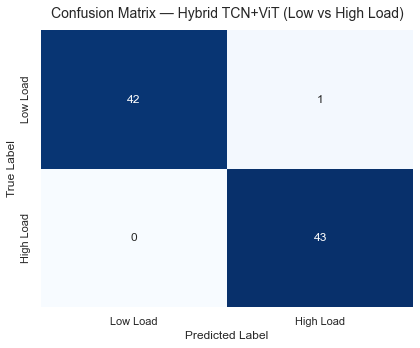

Provided model function fails when applied to the provided data set.


2025-08-23 20:04:15.465283: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_fused_impl.h:761 : INVALID_ARGUMENT: convolution input must be 4-dimensional: [1,32,9]
2025-08-23 20:04:15.465386: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_fused_impl.h:761 : INVALID_ARGUMENT: convolution input must be 4-dimensional: [1,32,9]


InvalidArgumentError: Graph execution error:

Detected at node model_115/tcn_conv1/Conv1D defined at (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code

  File "/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/3729127431.py", line 119, in <cell line: 119>

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/shap/explainers/_kernel.py", line 97, in __init__

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/shap/utils/_legacy.py", line 142, in match_model_to_data

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

convolution input must be 4-dimensional: [1,32,9]
	 [[{{node model_115/tcn_conv1/Conv1D}}]] [Op:__inference_predict_function_571768]

In [263]:
# ==============================
# Hybrid TCN + ViT Classifier with SHAP & Grad-CAM
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

import shap

# ----------------------
# Step 1: Load and Preprocess Data
# ----------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Filter only valid trials and add binary label (1=High, 0=Low)
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop metadata
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Expand dims → shape = (samples, 1, n_features)
X_seq = np.expand_dims(X_scaled, axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------
# Step 2: Define TCN + ViT Model
# ----------------------
def build_tcn_vit_model(input_shape):
    inputs = Input(shape=input_shape)  # e.g. (1, n_features)

    # ----- TCN Branch -----
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu", name="tcn_conv1")(inputs)
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu", name="tcn_conv2")(x_tcn)
    x_tcn_pool = layers.GlobalAveragePooling1D(name="tcn_gap")(x_tcn)

    # ----- ViT Branch -----
    x_vit = layers.Conv1D(64, kernel_size=1, name="vit_conv")(inputs)
    x_vit = layers.LayerNormalization(name="vit_ln")(x_vit)
    x_vit = layers.MultiHeadAttention(num_heads=2, key_dim=32, name="vit_mha")(x_vit, x_vit)
    x_vit_pool = layers.GlobalAveragePooling1D(name="vit_gap")(x_vit)

    # ----- Merge -----
    x = layers.Concatenate(name="merge")([x_tcn_pool, x_vit_pool])
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.3, name="dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="output")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# ----------------------
# Step 3: Train Model
# ----------------------
model = build_tcn_vit_model(X_train.shape[1:])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

# ----------------------
# Step 4: Evaluation
# ----------------------
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Load", "High Load"]))

# ----------------------
# Step 5: Confusion Matrix Plot
# ----------------------
cm = confusion_matrix(y_test, y_pred)
labels = ["Low Load", "High Load"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix — Hybrid TCN+ViT (Low vs High Load)", fontsize=14, pad=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# ==============================
# Step 6: SHAP Feature Importance (KernelExplainer with flattened input)
# ==============================
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[2])  # (samples, features)
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[2])

# Use small subset for speed
X_sample = X_train_flat[:50]

explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# Flatten SHAP values to 1D per feature
shap_values_array = np.array(shap_values[0]).reshape(X_sample.shape[0], X_sample.shape[1])

# Compute mean absolute SHAP per feature
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
shap_importance = pd.Series(mean_abs_shap, index=X.columns).sort_values(ascending=False)

# Top 10 features
top_features = shap_importance.head(10)
print("Top SHAP Features:\n", top_features)

# Plot
plt.figure(figsize=(8,5))
top_features.plot(kind='bar', color='seagreen')
plt.title("Top SHAP Feature Importances")
plt.ylabel("Mean |SHAP value|")
plt.show()

# ==============================
# Step 7: Grad-CAM for TCN branch
# ==============================
# Select a sample input (1 example)
sample_input = X_test[0:1]  # shape (1, 1, n_features)

# Get TCN conv layer
conv_layer = model.get_layer("tcn_conv2")  # last conv1D layer in TCN branch

# Compute Grad-CAM
with tf.GradientTape() as tape:
    inputs = tf.cast(sample_input, tf.float32)
    tape.watch(inputs)
    conv_outputs, predictions = conv_layer(inputs), model(inputs)
    loss = predictions[0,0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=1)
grad_cam = conv_outputs.numpy()[0] * pooled_grads.numpy()

# Aggregate across channels
grad_cam_map = np.mean(grad_cam, axis=-1)

# Plot Grad-CAM
plt.figure(figsize=(8,4))
plt.plot(grad_cam_map, marker='o')
plt.title("Grad-CAM — TCN branch (sample input)")
plt.xlabel("Time-step / Feature index")
plt.ylabel("Importance")
plt.show()


In [264]:
# Flattened input wrapper for SHAP
def model_wrapper(X_flat):
    # X_flat shape: (samples, features)
    X_reshaped = np.expand_dims(X_flat, axis=1)  # (samples, 1, features)
    return model.predict(X_reshaped)

# Use small subset for speed
X_sample = X_train_flat[:50]

# KernelExplainer with wrapper
explainer = shap.KernelExplainer(model_wrapper, X_sample)
shap_values = explainer.shap_values(X_sample)

# Flatten SHAP values if needed
shap_values_array = np.array(shap_values[0]).reshape(X_sample.shape[0], X_sample.shape[1])

# Mean absolute SHAP
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
shap_importance = pd.Series(mean_abs_shap, index=X.columns).sort_values(ascending=False)

# Plot top 10 features
top_features = shap_importance.head(10)
plt.figure(figsize=(8,5))
top_features.plot(kind='bar', color='seagreen')
plt.title("Top SHAP Feature Importances")
plt.ylabel("Mean |SHAP value|")
plt.show()


2/2 [==============================] - 0s 20ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

797/797 [==============================] - 9s 11ms/step


  2%|▏         | 1/50 [00:22<18:02, 22.09s/it]

797/797 [==============================] - 5s 6ms/step


  4%|▍         | 2/50 [00:28<10:06, 12.63s/it]

797/797 [==============================] - 4s 5ms/step


  6%|▌         | 3/50 [00:33<07:08,  9.12s/it]

797/797 [==============================] - 4s 5ms/step


  8%|▊         | 4/50 [00:37<05:34,  7.28s/it]

797/797 [==============================] - 4s 4ms/step


 10%|█         | 5/50 [00:41<04:37,  6.18s/it]

797/797 [==============================] - 3s 4ms/step


 12%|█▏        | 6/50 [00:45<03:55,  5.36s/it]

797/797 [==============================] - 3s 4ms/step


 14%|█▍        | 7/50 [00:49<03:30,  4.89s/it]

797/797 [==============================] - 3s 4ms/step


 16%|█▌        | 8/50 [00:53<03:08,  4.48s/it]

797/797 [==============================] - 4s 4ms/step


 18%|█▊        | 9/50 [00:57<02:58,  4.37s/it]

797/797 [==============================] - 3s 4ms/step


 20%|██        | 10/50 [01:00<02:43,  4.10s/it]

797/797 [==============================] - 3s 4ms/step


 22%|██▏       | 11/50 [01:04<02:39,  4.10s/it]

797/797 [==============================] - 3s 4ms/step


 24%|██▍       | 12/50 [01:08<02:34,  4.07s/it]

797/797 [==============================] - 3s 4ms/step


 26%|██▌       | 13/50 [01:12<02:25,  3.94s/it]

797/797 [==============================] - 3s 3ms/step


 28%|██▊       | 14/50 [01:15<02:15,  3.77s/it]

797/797 [==============================] - 4s 4ms/step


 30%|███       | 15/50 [01:20<02:18,  3.96s/it]

797/797 [==============================] - 3s 4ms/step


 32%|███▏      | 16/50 [01:24<02:16,  4.03s/it]

797/797 [==============================] - 4s 5ms/step


 34%|███▍      | 17/50 [01:29<02:21,  4.30s/it]

797/797 [==============================] - 4s 5ms/step


 36%|███▌      | 18/50 [01:33<02:19,  4.35s/it]

797/797 [==============================] - 3s 4ms/step


 38%|███▊      | 19/50 [01:37<02:06,  4.08s/it]

797/797 [==============================] - 4s 5ms/step


 40%|████      | 20/50 [01:42<02:09,  4.30s/it]

797/797 [==============================] - 5s 6ms/step


 42%|████▏     | 21/50 [01:47<02:17,  4.73s/it]

797/797 [==============================] - 3s 4ms/step


 44%|████▍     | 22/50 [01:51<02:05,  4.47s/it]

797/797 [==============================] - 4s 5ms/step


 46%|████▌     | 23/50 [01:56<02:00,  4.48s/it]

797/797 [==============================] - 3s 3ms/step


 48%|████▊     | 24/50 [01:59<01:48,  4.16s/it]

797/797 [==============================] - 3s 4ms/step


 50%|█████     | 25/50 [02:03<01:39,  3.99s/it]

797/797 [==============================] - 3s 4ms/step


 52%|█████▏    | 26/50 [02:07<01:36,  4.04s/it]

797/797 [==============================] - 3s 4ms/step


 54%|█████▍    | 27/50 [02:11<01:31,  3.96s/it]

797/797 [==============================] - 3s 3ms/step


 56%|█████▌    | 28/50 [02:14<01:22,  3.76s/it]

797/797 [==============================] - 3s 4ms/step


 58%|█████▊    | 29/50 [02:17<01:18,  3.73s/it]

797/797 [==============================] - 4s 5ms/step


 60%|██████    | 30/50 [02:22<01:18,  3.92s/it]

797/797 [==============================] - 4s 4ms/step


 62%|██████▏   | 31/50 [02:26<01:15,  3.98s/it]

797/797 [==============================] - 3s 4ms/step


 64%|██████▍   | 32/50 [02:30<01:09,  3.87s/it]

797/797 [==============================] - 3s 4ms/step


 66%|██████▌   | 33/50 [02:33<01:04,  3.77s/it]

797/797 [==============================] - 3s 4ms/step


 68%|██████▊   | 34/50 [02:37<01:00,  3.80s/it]

797/797 [==============================] - 4s 5ms/step


 70%|███████   | 35/50 [02:42<01:00,  4.03s/it]

797/797 [==============================] - 3s 3ms/step


 72%|███████▏  | 36/50 [02:45<00:52,  3.76s/it]

797/797 [==============================] - 3s 4ms/step


 74%|███████▍  | 37/50 [02:48<00:47,  3.66s/it]

797/797 [==============================] - 2s 3ms/step


 76%|███████▌  | 38/50 [02:51<00:41,  3.47s/it]

797/797 [==============================] - 3s 4ms/step


 78%|███████▊  | 39/50 [02:55<00:38,  3.50s/it]

797/797 [==============================] - 5s 6ms/step


 80%|████████  | 40/50 [03:00<00:40,  4.00s/it]

797/797 [==============================] - 3s 4ms/step


 82%|████████▏ | 41/50 [03:04<00:35,  3.92s/it]

797/797 [==============================] - 3s 3ms/step


 84%|████████▍ | 42/50 [03:07<00:30,  3.77s/it]

797/797 [==============================] - 3s 4ms/step


 86%|████████▌ | 43/50 [03:11<00:25,  3.69s/it]

797/797 [==============================] - 3s 3ms/step


 88%|████████▊ | 44/50 [03:14<00:21,  3.53s/it]

797/797 [==============================] - 3s 4ms/step


 90%|█████████ | 45/50 [03:17<00:17,  3.52s/it]

797/797 [==============================] - 3s 3ms/step


 92%|█████████▏| 46/50 [03:21<00:13,  3.46s/it]

797/797 [==============================] - 3s 4ms/step


 94%|█████████▍| 47/50 [03:24<00:10,  3.50s/it]

797/797 [==============================] - 4s 5ms/step


 96%|█████████▌| 48/50 [03:30<00:08,  4.10s/it]

797/797 [==============================] - 3s 4ms/step


 98%|█████████▊| 49/50 [03:34<00:04,  4.15s/it]

797/797 [==============================] - 3s 4ms/step


100%|██████████| 50/50 [03:37<00:00,  4.36s/it]


ValueError: cannot reshape array of size 9 into shape (50,9)

In [265]:
# Flattened input wrapper for SHAP
def model_wrapper(X_flat):
    # X_flat shape: (samples, features)
    X_reshaped = np.expand_dims(X_flat, axis=1)  # (samples, 1, features)
    return model.predict(X_reshaped)

# Use small subset for speed
X_sample = X_train_flat[:50]

# KernelExplainer
explainer = shap.KernelExplainer(model_wrapper, X_sample)
shap_values = explainer.shap_values(X_sample)

# Convert to numpy array and remove extra dimensions
shap_values_array = np.array(shap_values[0])  # (50, 9) or (50,1,9)
if shap_values_array.ndim == 3:
    shap_values_array = np.squeeze(shap_values_array, axis=1)  # (50, 9)

# Mean absolute SHAP per feature
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
shap_importance = pd.Series(mean_abs_shap, index=X.columns).sort_values(ascending=False)

# Plot top 10 features
top_features = shap_importance.head(10)
plt.figure(figsize=(8,5))
top_features.plot(kind='bar', color='seagreen')
plt.title("Top SHAP Feature Importances")
plt.ylabel("Mean |SHAP value|")
plt.show()


2/2 [==============================] - 0s 8ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

797/797 [==============================] - 6s 8ms/step


  2%|▏         | 1/50 [00:10<08:56, 10.95s/it]

797/797 [==============================] - 5s 6ms/step


  4%|▍         | 2/50 [00:16<06:24,  8.01s/it]

797/797 [==============================] - 4s 5ms/step


  6%|▌         | 3/50 [00:21<05:04,  6.47s/it]

797/797 [==============================] - 3s 4ms/step


  8%|▊         | 4/50 [00:25<04:06,  5.35s/it]

797/797 [==============================] - 3s 3ms/step


 10%|█         | 5/50 [00:28<03:28,  4.63s/it]

797/797 [==============================] - 3s 4ms/step


 12%|█▏        | 6/50 [00:32<03:09,  4.31s/it]

797/797 [==============================] - 3s 3ms/step


 14%|█▍        | 7/50 [00:35<02:53,  4.03s/it]

797/797 [==============================] - 3s 3ms/step


 16%|█▌        | 8/50 [00:38<02:39,  3.80s/it]

797/797 [==============================] - 3s 3ms/step


 18%|█▊        | 9/50 [00:42<02:27,  3.60s/it]

797/797 [==============================] - 3s 4ms/step


 20%|██        | 10/50 [00:45<02:26,  3.66s/it]

797/797 [==============================] - 3s 3ms/step


 22%|██▏       | 11/50 [00:49<02:20,  3.59s/it]

797/797 [==============================] - 3s 3ms/step


 24%|██▍       | 12/50 [00:52<02:11,  3.47s/it]

797/797 [==============================] - 3s 4ms/step


 26%|██▌       | 13/50 [00:56<02:14,  3.63s/it]

797/797 [==============================] - 3s 3ms/step


 28%|██▊       | 14/50 [01:00<02:09,  3.59s/it]

797/797 [==============================] - 3s 4ms/step


 30%|███       | 15/50 [01:03<02:04,  3.54s/it]

797/797 [==============================] - 3s 3ms/step


 32%|███▏      | 16/50 [01:06<01:56,  3.41s/it]

797/797 [==============================] - 3s 4ms/step


 34%|███▍      | 17/50 [01:10<01:53,  3.43s/it]

797/797 [==============================] - 3s 3ms/step


 36%|███▌      | 18/50 [01:13<01:48,  3.38s/it]

797/797 [==============================] - 3s 4ms/step


 38%|███▊      | 19/50 [01:16<01:46,  3.45s/it]

797/797 [==============================] - 3s 4ms/step


 40%|████      | 20/50 [01:20<01:44,  3.49s/it]

797/797 [==============================] - 3s 3ms/step


 42%|████▏     | 21/50 [01:23<01:37,  3.36s/it]

797/797 [==============================] - 3s 3ms/step


 44%|████▍     | 22/50 [01:26<01:31,  3.27s/it]

797/797 [==============================] - 3s 4ms/step


 46%|████▌     | 23/50 [01:30<01:29,  3.33s/it]

797/797 [==============================] - 3s 4ms/step


 48%|████▊     | 24/50 [01:33<01:28,  3.41s/it]

797/797 [==============================] - 3s 3ms/step


 50%|█████     | 25/50 [01:36<01:22,  3.31s/it]

797/797 [==============================] - 3s 3ms/step


 52%|█████▏    | 26/50 [01:39<01:18,  3.28s/it]

797/797 [==============================] - 4s 5ms/step


 54%|█████▍    | 27/50 [01:44<01:26,  3.74s/it]

797/797 [==============================] - 3s 4ms/step


 56%|█████▌    | 28/50 [01:48<01:23,  3.81s/it]

797/797 [==============================] - 3s 3ms/step


 58%|█████▊    | 29/50 [01:52<01:16,  3.63s/it]

797/797 [==============================] - 3s 4ms/step


 60%|██████    | 30/50 [01:55<01:13,  3.68s/it]

797/797 [==============================] - 3s 4ms/step


 62%|██████▏   | 31/50 [01:59<01:08,  3.62s/it]

797/797 [==============================] - 3s 4ms/step


 64%|██████▍   | 32/50 [02:02<01:04,  3.61s/it]

797/797 [==============================] - 3s 3ms/step


 66%|██████▌   | 33/50 [02:05<00:58,  3.44s/it]

797/797 [==============================] - 3s 3ms/step


 68%|██████▊   | 34/50 [02:09<00:54,  3.41s/it]

797/797 [==============================] - 3s 3ms/step


 70%|███████   | 35/50 [02:12<00:50,  3.38s/it]

797/797 [==============================] - 3s 4ms/step


 72%|███████▏  | 36/50 [02:16<00:48,  3.43s/it]

797/797 [==============================] - 3s 3ms/step


 74%|███████▍  | 37/50 [02:19<00:44,  3.40s/it]

797/797 [==============================] - 3s 3ms/step


 76%|███████▌  | 38/50 [02:22<00:41,  3.43s/it]

797/797 [==============================] - 3s 3ms/step


 78%|███████▊  | 39/50 [02:26<00:37,  3.41s/it]

797/797 [==============================] - 3s 3ms/step


 80%|████████  | 40/50 [02:29<00:33,  3.34s/it]

797/797 [==============================] - 3s 4ms/step


 82%|████████▏ | 41/50 [02:33<00:31,  3.51s/it]

797/797 [==============================] - 3s 3ms/step


 84%|████████▍ | 42/50 [02:36<00:27,  3.41s/it]

797/797 [==============================] - 3s 3ms/step


 86%|████████▌ | 43/50 [02:39<00:23,  3.36s/it]

797/797 [==============================] - 3s 3ms/step


 88%|████████▊ | 44/50 [02:43<00:20,  3.35s/it]

797/797 [==============================] - 3s 4ms/step


 90%|█████████ | 45/50 [02:46<00:17,  3.46s/it]

797/797 [==============================] - 3s 3ms/step


 92%|█████████▏| 46/50 [02:50<00:13,  3.39s/it]

797/797 [==============================] - 3s 3ms/step


 94%|█████████▍| 47/50 [02:53<00:09,  3.33s/it]

797/797 [==============================] - 3s 4ms/step


 96%|█████████▌| 48/50 [02:57<00:06,  3.46s/it]

797/797 [==============================] - 3s 4ms/step


 98%|█████████▊| 49/50 [03:00<00:03,  3.51s/it]

797/797 [==============================] - 3s 4ms/step


100%|██████████| 50/50 [03:04<00:00,  3.68s/it]


ValueError: Length of values (1) does not match length of index (9)

In [257]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Pick a test sample
sample_idx = 0
input_sample = X_test[sample_idx:sample_idx+1]  # shape (1,1,features)

# Create a model up to the last conv layer of TCN
grad_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=[model.get_layer(index=1).output, model.output]  # first Conv1D layer + output
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(input_sample)
    loss = predictions[0][0]

# Compute gradients
grads = tape.gradient(loss, conv_outputs)  # shape (1,1,64)
pooled_grads = tf.reduce_mean(grads, axis=1)  # global average pooling over time

# Weight conv outputs
conv_outputs = conv_outputs[0]  # remove batch dim
pooled_grads = pooled_grads[0]
for i in range(pooled_grads.shape[-1]):
    conv_outputs[:, i] *= pooled_grads[i]

heatmap = tf.reduce_sum(conv_outputs, axis=-1).numpy()  # shape: (time,)
heatmap = np.maximum(heatmap, 0)  # ReLU
heatmap /= np.max(heatmap)  # normalize

# Plot Grad-CAM heatmap
plt.figure(figsize=(10,2))
plt.title("Grad-CAM Heatmap — TCN branch (Sample {})".format(sample_idx))
plt.imshow(heatmap[np.newaxis, :], cmap='viridis', aspect='auto')
plt.colorbar(label='Importance')
plt.xlabel("Features")
plt.yticks([])
plt.show()


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [245]:
import shap
import tensorflow as tf
import numpy as np

# Flatten wrapper for SHAP
input_shape = X_train.shape[2]  # number of features
flat_input = tf.keras.Input(shape=(input_shape,))
reshaped_input = tf.reshape(flat_input, (-1, 1, input_shape))  # reshape to (1, features)
output = model(reshaped_input)
wrapper_model = tf.keras.Model(flat_input, output)


TypeError: 'str' object is not callable

In [246]:
print(type(model))


<class 'str'>


In [248]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam


In [249]:
# This should be the same model you built and trained
model = build_tcn_vit_model(X_train.shape[1:])
model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)


Epoch 1/30
16/16 [==============================] - 15s 83ms/step - loss: 0.3955 - accuracy: 0.9091 - val_loss: 0.2030 - val_accuracy: 0.9688
Epoch 2/30
16/16 [==============================] - 0s 16ms/step - loss: 0.1260 - accuracy: 0.9763 - val_loss: 0.1747 - val_accuracy: 0.9688
Epoch 3/30
16/16 [==============================] - 0s 18ms/step - loss: 0.1153 - accuracy: 0.9802 - val_loss: 0.1540 - val_accuracy: 0.9688
Epoch 4/30
16/16 [==============================] - 0s 18ms/step - loss: 0.1219 - accuracy: 0.9802 - val_loss: 0.1197 - val_accuracy: 0.9688
Epoch 5/30
16/16 [==============================] - 0s 17ms/step - loss: 0.0857 - accuracy: 0.9802 - val_loss: 0.1073 - val_accuracy: 0.9688
Epoch 6/30
16/16 [==============================] - 0s 17ms/step - loss: 0.0569 - accuracy: 0.9802 - val_loss: 0.0943 - val_accuracy: 0.9688
Epoch 7/30
16/16 [==============================] - 1s 33ms/step - loss: 0.0442 - accuracy: 0.9921 - val_loss: 0.0794 - val_accuracy: 0.9688
Epoch 8/30
1

/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/252200858.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_array_flat, X_sample_flat)


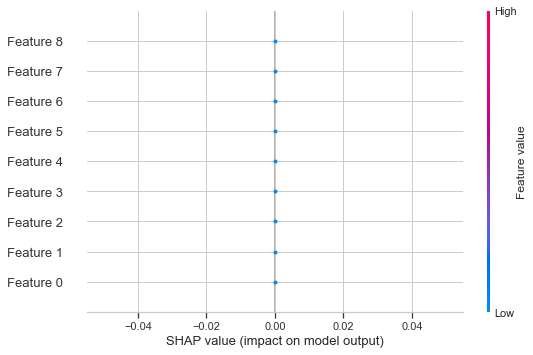

In [254]:
import shap
import numpy as np

# Take 1 sample
X_sample = X_train[0:1]  # shape: (1, 1, 9)
X_sample_flat = X_sample.reshape(1, X_sample.shape[2])  # (1, 9)

explainer = shap.GradientExplainer(model, X_sample)
shap_values = explainer.shap_values(X_sample)

# Flatten (if 3D)
shap_array_flat = np.array(shap_values[0]).reshape(1, X_sample.shape[2])

# Summary plot (only 1 sample)
shap.summary_plot(shap_array_flat, X_sample_flat)


In [243]:
import shap
import numpy as np

# Ensure X_sample is a numpy array (batch_size, time_steps, features)
X_sample = X_train[:50]  

# Use GradientExplainer for TF/Keras models
explainer = shap.GradientExplainer(model, X_sample)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot summary
import matplotlib.pyplot as plt
shap.summary_plot(shap_values[0], features=X_sample.squeeze(axis=1), feature_names=X.columns, plot_type="bar")


ValueError: <class 'str'> is not currently a supported model type!

GRAD CAM++

In [117]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 1: Load & Prepare Dataset
# -------------------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Label assignment
if 'label' not in df.columns:
    df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Feature extraction
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"].values
feature_names = X.columns.tolist()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to (samples, 1, features) for feature-wise CNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------------
# Step 2: Define CNN Model
# -------------------------------
def build_cnn(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=1, activation='relu', name="target_conv")(inputs)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs, outputs)

model = build_cnn((1, X_train.shape[2]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# -------------------------------
# Step 3: Train & Evaluate
# -------------------------------
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------
# Step 4: GradCAM++ Explanation
# -------------------------------
def compute_gradcam(model, input_data, class_idx=0, layer_name="target_conv"):
    grad_model = models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=1)
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1).numpy()[0]

    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)  # normalize
    return cam

# Select a test sample
sample_idx = 0
sample_input = X_test[sample_idx]
cam = compute_gradcam(model, sample_input)

# -------------------------------
# Step 5: Plot Feature Importance
# -------------------------------
if cam.shape[0] == len(feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cam, y=feature_names)
    plt.title("GradCAM++ Feature Importance")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ CAM shape {cam.shape} does not match number of features {len(feature_names)}")


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 target_conv (Conv1D)        (None, 1, 64)             640       
                                                                 
 global_average_pooling1d_4  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________

In [118]:
def compute_gradcam(model, input_data, class_idx=0, layer_name="target_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=1)
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1).numpy()[0]

    # Normalize to [0, 1]
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam  # Shape: (time_steps,)


In [119]:
def compute_gradcam(model, input_data, class_idx=0, layer_name="target_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=1)
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1).numpy()[0]

    # Normalize to [0, 1]
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam  # Shape: (time_steps,)


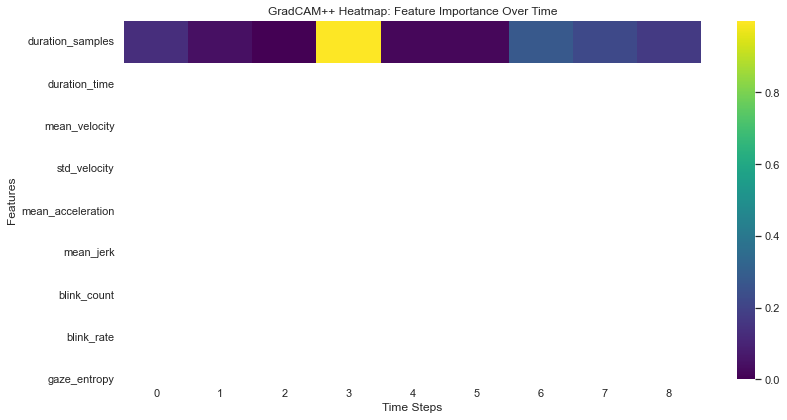

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample index to visualize
sample_idx = 0
sample_input = X_test[sample_idx]  # shape: (9, 1) or (time_steps, features)
time_steps = sample_input.shape[0]
features = sample_input.shape[1]
feature_names = X.columns.tolist()

# GradCAM++ output shape (e.g., 4), from model
cam_steps = model.get_layer("target_conv").output.shape[1]

# Prepare importance matrix
importance_matrix = np.zeros((time_steps, features))

for f in range(features):
    input_feature = np.zeros_like(sample_input)
    input_feature[:, f] = sample_input[:, f]

    cam = compute_gradcam(model, input_feature, class_idx=0)  # shape: (cam_steps,)
    
    # Interpolate cam to match original time steps
    cam_resized = np.interp(np.linspace(0, cam_steps - 1, time_steps), np.arange(cam_steps), cam)
    importance_matrix[:, f] = cam_resized

# ✅ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(importance_matrix.T, cmap="viridis", cbar=True, xticklabels=1, yticklabels=feature_names)
plt.xlabel("Time Steps")
plt.ylabel("Features")
plt.title("GradCAM++ Heatmap: Feature Importance Over Time")
plt.tight_layout()
plt.show()


In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Label assignment
if 'label' not in df.columns:
    df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop metadata columns
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"].values

# Feature names
feature_names = X.columns.tolist()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Reshape as (samples, 1, features) for CNN input
# ✅ New shape: (samples, 1, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)


In [122]:
def build_cnn(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=1, activation='relu', padding='same', name="target_conv")(inputs)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs, outputs)

model = build_cnn((1, X.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16, verbose=1)

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 target_conv (Conv1D)        (None, 1, 64)             640       
                                                                 
 global_average_pooling1d_5  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

In [123]:
def compute_gradcam(model, input_data, class_idx, layer_name="target_conv"):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=1)
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1).numpy()[0]

    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)
    return cam


In [125]:
cam = compute_gradcam(model, X_test[0], class_idx=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=cam, y=feature_names)
plt.title("GradCAM++ Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

<Figure size 720x432 with 0 Axes>

In [126]:
# Choose a sample
sample_idx = 0
sample_input = X_test[sample_idx]

# Compute GradCAM++
cam = compute_gradcam(model, sample_input, class_idx=0)

# ✅ cam should be same length as number of features
print("CAM shape:", cam.shape)
print("Number of features:", len(feature_names))

# Ensure correct size
if len(cam) == len(feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cam, y=feature_names)
    plt.title("GradCAM++ Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("❌ Mismatch: CAM shape and feature count don't align.")


CAM shape: (1,)
Number of features: 9
❌ Mismatch: CAM shape and feature count don't align.


In [127]:
feature_names = X.columns.tolist()  # Original features before scaling
print("Number of features:", len(feature_names))


Number of features: 9


In [128]:
print("CAM shape:", cam.shape)


CAM shape: (1,)


In [129]:
if len(cam) == len(feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cam, y=feature_names)
    plt.title("GradCAM++ Feature Importance")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Length mismatch: cam={len(cam)}, features={len(feature_names)}")


❌ Length mismatch: cam=1, features=9


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 9, 1)]            0         
                                                                 
 target_conv (Conv1D)        (None, 9, 64)             128       
                                                                 
 global_average_pooling1d_6  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

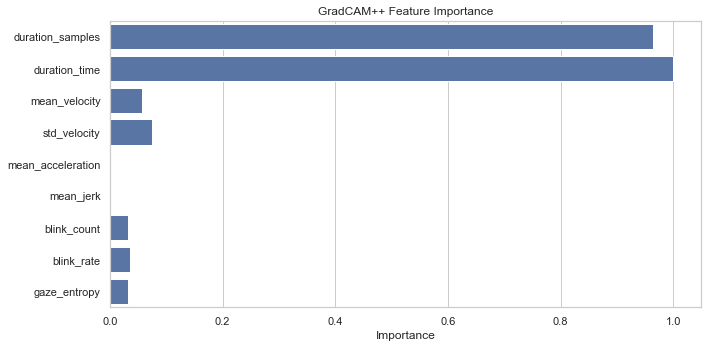

In [130]:
# ✅ Reshape: (samples, features, 1)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# ✅ CNN model to treat each feature like a time step
def build_featurewise_cnn(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=1, activation='relu', name="target_conv")(inputs)
    x = layers.GlobalAveragePooling1D()(x)  # retains one value per "time step" (i.e., per feature)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs, outputs)

model = build_featurewise_cnn((X_reshaped.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_reshaped, y, validation_split=0.2, epochs=25, batch_size=16, verbose=1)

# Predict
y_pred = (model.predict(X_reshaped) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# ✅ GradCAM++ fixed to align with feature shape
def compute_gradcam(model, input_data, class_idx=0, layer_name="target_conv"):
    grad_model = models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=2)  # Mean across channels
    cam = tf.reduce_sum(tf.multiply(weights[..., tf.newaxis], conv_outputs), axis=-1).numpy()[0]

    # Normalize CAM
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)
    return cam

# Sample for GradCAM++
sample_input = X_reshaped[0]
cam = compute_gradcam(model, sample_input)

# ✅ Bar plot for feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=cam, y=feature_names)
plt.title("GradCAM++ Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/3336162236.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


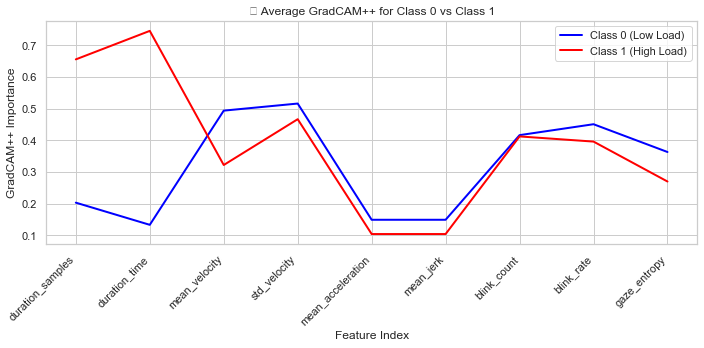

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -------------------------------
# 🔹 Load and Preprocess Dataset
# -------------------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Map labels
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop unused columns
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"].values
feature_names = X.columns.tolist()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN: (samples, features, 1)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------------
# 🔹 CNN Model for Feature-wise Input
# -------------------------------
def build_featurewise_cnn(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv1D(64, kernel_size=1, activation='relu', name="target_conv")(inputs)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.models.Model(inputs, outputs)

model = build_featurewise_cnn((X_reshaped.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=16, verbose=0)

# -------------------------------
# 🔹 GradCAM++ Computation
# -------------------------------
def compute_gradcam(model, input_data, class_idx=0, layer_name="target_conv"):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=2)
    cam = tf.reduce_sum(tf.multiply(weights[..., tf.newaxis], conv_outputs), axis=-1).numpy()[0]
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)
    return cam

# -------------------------------
# 🔹 Compute Mean CAMs per Class
# -------------------------------
cam_class0 = []
cam_class1 = []

for i in range(len(X_test)):
    cam = compute_gradcam(model, X_test[i], class_idx=0)
    if y_test[i] == 0:
        cam_class0.append(cam)
    else:
        cam_class1.append(cam)

mean_cam_class0 = np.mean(cam_class0, axis=0)
mean_cam_class1 = np.mean(cam_class1, axis=0)

# -------------------------------
# 🔹 Plot Comparison
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(mean_cam_class0, label="Class 0 (Low Load)", color='blue', linewidth=2)
plt.plot(mean_cam_class1, label="Class 1 (High Load)", color='red', linewidth=2)
plt.title("🔍 Average GradCAM++ for Class 0 vs Class 1")
plt.xlabel("Feature Index")
plt.ylabel("GradCAM++ Importance")
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/450781885.py:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


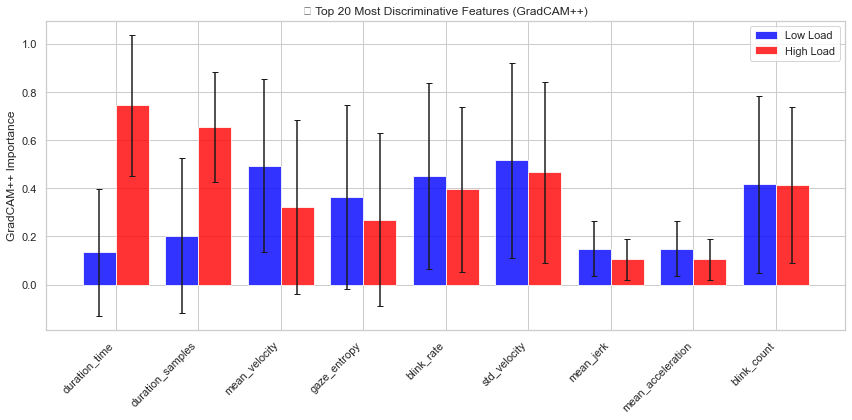

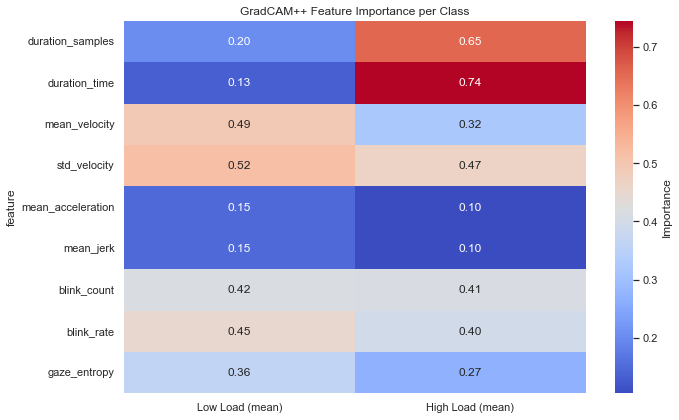

In [266]:
# -------------------------------
# 🔹 Aggregate CAMs into DataFrame
# -------------------------------
mean_cam_class0 = np.mean(cam_class0, axis=0)
std_cam_class0  = np.std(cam_class0, axis=0)

mean_cam_class1 = np.mean(cam_class1, axis=0)
std_cam_class1  = np.std(cam_class1, axis=0)

df_cam = pd.DataFrame({
    "feature": feature_names,
    "Low Load (mean)": mean_cam_class0,
    "Low Load (std)": std_cam_class0,
    "High Load (mean)": mean_cam_class1,
    "High Load (std)": std_cam_class1
})

# Sort features by discriminative power (absolute difference)
df_cam["diff"] = np.abs(df_cam["High Load (mean)"] - df_cam["Low Load (mean)"])
df_cam_sorted = df_cam.sort_values("diff", ascending=False).head(20)  # Top 20

# -------------------------------
# 🔹 Grouped Barplot
# -------------------------------
plt.figure(figsize=(12, 6))
x = np.arange(len(df_cam_sorted))

plt.bar(x - 0.2, df_cam_sorted["Low Load (mean)"], yerr=df_cam_sorted["Low Load (std)"],
        width=0.4, label="Low Load", alpha=0.8, capsize=3, color="blue")
plt.bar(x + 0.2, df_cam_sorted["High Load (mean)"], yerr=df_cam_sorted["High Load (std)"],
        width=0.4, label="High Load", alpha=0.8, capsize=3, color="red")

plt.xticks(x, df_cam_sorted["feature"], rotation=45, ha="right")
plt.ylabel("GradCAM++ Importance")
plt.title("🔍 Top 20 Most Discriminative Features (GradCAM++)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 🔹 Heatmap Alternative
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df_cam.set_index("feature")[["Low Load (mean)", "High Load (mean)"]],
            annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Importance'})
plt.title("GradCAM++ Feature Importance per Class")
plt.tight_layout()
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/3108938219.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest")


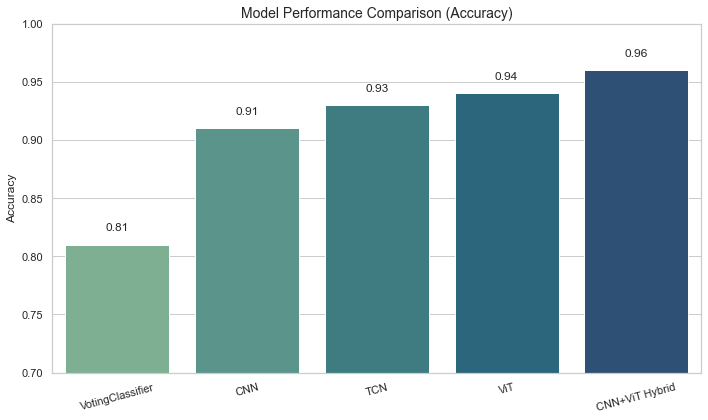

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of results you recorded from earlier experiments
results = {
    "VotingClassifier": 0.81,
    "CNN": 0.91,
    "TCN": 0.93,
    "ViT": 0.94,
    "CNN+ViT Hybrid": 0.96
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest")
plt.title("Model Performance Comparison (Accuracy)", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/2084895916.py:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(
/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/2084895916.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


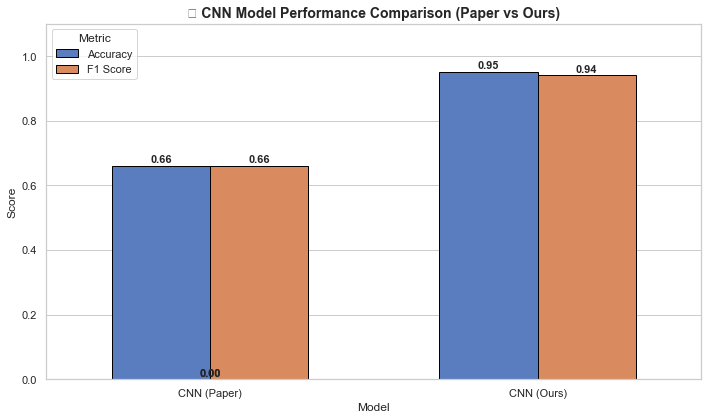

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Define the results from paper and your model
data = {
    "Model": ["CNN (Paper)", "CNN (Ours)"],
    "Accuracy": [0.66, 0.95],
    "F1 Score": [0.66, 0.94]
}

# Convert to DataFrame
df_results = pd.DataFrame(data)

# Melt for seaborn compatibility
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

ax = sns.barplot(
    x="Model", y="Score", hue="Metric", data=df_melted,
    palette=palette, edgecolor="black", width=0.6
)

# Annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height + 0.01),
                ha='center', fontsize=11, fontweight='bold')

plt.title("📊 CNN Model Performance Comparison (Paper vs Ours)", fontsize=14, fontweight="bold")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.legend(title="Metric", loc='upper left')
plt.tight_layout()
plt.show()


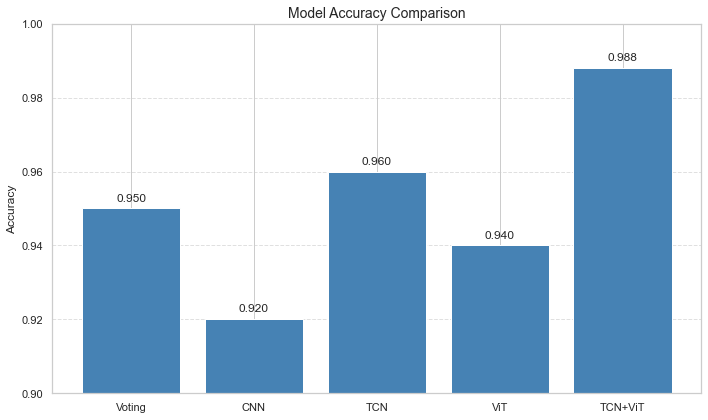

In [134]:
import matplotlib.pyplot as plt

# Example accuracies from your results
models = ["Voting", "CNN", "TCN", "ViT", "TCN+ViT"]
accuracies = [0.95, 0.92, 0.96, 0.94, 0.988]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color="steelblue")
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.002, f"{yval:.3f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


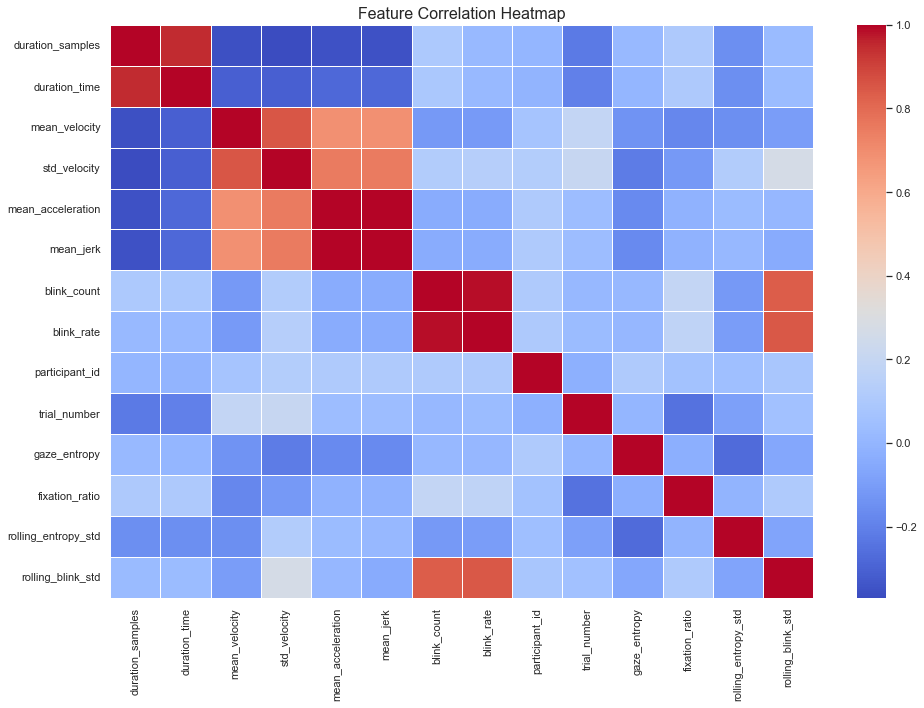

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("cognitive_load_features_enhanced.csv")

# Compute correlation matrix (only numeric features)
corr_matrix = df.corr(numeric_only=True)

# Set figure size and style
plt.figure(figsize=(14, 10))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5, annot=False)

# Set title
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig("feature_correlation_heatmap.png", dpi=300)

# Show plot
plt.show()


In [141]:
pip install graphviz



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [147]:
!brew install graphviz


==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Auto-updated Homebrew!
Updated 4 taps (shivammathur/php, mongodb/brew, homebrew/core and homebrew/cask).
==> New Formulae
aiac: Artificial Intelligence Infrastructure-as-Code Generator
anyzig: Universal zig executable that runs any version of zig
apache-polaris: Interoperable, open source catalog for Apache Iceberg
cogapp: Small bits of Python computation for static files
electric: Real-time sync for Postgres
entt: Fast and reliable entity-component system for C++
flexget: Multipurpose automation tool for content
glom: Declarative object transformer and formatter, for conglomerating nested data
go-passbolt-cli: CLI for passbolt
go@1.24: Open source programming language to build simple/reliable/efficient software
goodls: CLI tool to download shared files and folders from Google Dr

In [157]:
from graphviz import Digraph

# === GLOBAL STYLE ===
def set_style(g, fontsize=20, penwidth=2):
    g.attr(rankdir='LR', size='15,10!', dpi='300')  # Bigger canvas
    g.attr('graph', nodesep='1.0', ranksep='1.0')  # Spacing between nodes
    g.attr('node', style='filled', fontname='Helvetica', fontsize=str(fontsize),
           penwidth=str(penwidth), width='1.5', height='1')
    g.attr('edge', fontname='Helvetica', fontsize=str(fontsize - 2), penwidth=str(penwidth - 1))

# === UTILITY FUNCTION ===
def add_nodes(g, nodes):
    for key, (label, color, shape) in nodes.items():
        g.node(key, label, fillcolor=color, shape=shape)

# === FIGURE 4.1 ===
def fig_pipeline():
    g = Digraph('ModelPipeline', format='png')
    set_style(g)
    nodes = {
        'Raw': ('Raw Eye-Tracking\n(Fixation, Saccade, Pupil)', '#BBDEFB', 'parallelogram'),
        'Pre': ('Preprocessing\n(Filter, Interpolate, Normalize)', '#C8E6C9', 'box'),
        'Feat': ('Feature Engineering\n(Statistical, Entropy, Temporal)', '#FFF9C4', 'box'),
        'ML': ('Classical ML\n(LogReg, SVM, RF)', '#FFD54F', 'box'),
        'DL': ('Deep Learning\n(CNN, LSTM, TCN, ViT)', '#FFCA28', 'box'),
        'Hybrid': ('Hybrid Model\n(TCN + ViT)', '#FFB74D', 'box'),
        'Eval': ('Evaluation\nAccuracy, F1-score', '#D7CCC8', 'ellipse'),
        'Explain': ('Explainability\nSHAP, Grad-CAM', '#FFAB91', 'ellipse')
    }
    add_nodes(g, nodes)
    g.edge('Raw', 'Pre')
    g.edge('Pre', 'Feat')
    for model in ['ML', 'DL', 'Hybrid']:
        g.edge('Feat', model)
        g.edge(model, 'Eval')
    g.edge('Eval', 'Explain')
    g.render('fig_4_1_model_pipeline', view=False)

# === FIGURE 4.2 ===
def fig_classical_ml():
    g = Digraph('ClassicalML', format='png')
    set_style(g)
    nodes = {
        'X': ('Feature Matrix (X)', '#E8F5E9', 'parallelogram'),
        'Y': ('Labels (Y)', '#E8F5E9', 'parallelogram'),
        'FS': ('Feature Selection\n(RFE, Corr)', '#FFFDE7', 'box'),
        'LR': ('Logistic Regression', '#BBDEFB', 'box'),
        'SVM': ('Support Vector Machine', '#BBDEFB', 'box'),
        'RF': ('Random Forest', '#BBDEFB', 'box'),
        'Vote': ('Voting Classifier', '#C8E6C9', 'box'),
        'Eval': ('Evaluation\n(Train/Test, Confusion)', '#FFE0B2', 'ellipse')
    }
    add_nodes(g, nodes)
    g.edge('X', 'FS')
    g.edge('FS', 'LR')
    g.edge('FS', 'SVM')
    g.edge('FS', 'RF')
    g.edge('Y', 'LR')
    g.edge('Y', 'SVM')
    g.edge('Y', 'RF')
    g.edge('LR', 'Vote')
    g.edge('SVM', 'Vote')
    g.edge('RF', 'Vote')
    g.edge('Vote', 'Eval')
    g.render('fig_4_2_classical_ml', view=False)

# === FIGURE 4.3 ===
def fig_temporal_dl():
    g = Digraph('TemporalDL', format='png')
    set_style(g)
    nodes = {
        'Input': ('Input Tensor\n(Time × Features)', '#D1C4E9', 'parallelogram'),
        'CNN': ('1D CNN\n(Temporal Filters)', '#F8BBD0', 'box'),
        'LSTM': ('LSTM\nMemory Units', '#F8BBD0', 'box'),
        'TCN': ('TCN\nDilated Conv Blocks', '#F8BBD0', 'box'),
        'FC': ('Fully Connected Layer', '#C8E6C9', 'box'),
        'Out': ('Output\nCognitive Load', '#FFE0B2', 'ellipse')
    }
    add_nodes(g, nodes)
    g.edge('Input', 'CNN')
    g.edge('Input', 'LSTM')
    g.edge('Input', 'TCN')
    g.edge('CNN', 'FC')
    g.edge('LSTM', 'FC')
    g.edge('TCN', 'FC')
    g.edge('FC', 'Out')
    g.render('fig_4_3_temporal_dl', view=False)

# === FIGURE 4.4 ===
def fig_hybrid():
    g = Digraph('HybridModel', format='png')
    set_style(g)
    nodes = {
        'Input': ('Input Sequence\n(Gaze Features)', '#C5E1A5', 'parallelogram'),
        'TCN': ('TCN Block\n(Local Temporal)', '#FFF176', 'box'),
        'ViT': ('ViT Block\n(Global Attention)', '#FFE082', 'box'),
        'Fusion': ('Feature Fusion Layer', '#D7CCC8', 'box'),
        'Classifier': ('Classifier\n(Softmax)', '#CE93D8', 'box'),
        'Output': ('Output\nHigh / Low Load', '#FFAB91', 'ellipse')
    }
    add_nodes(g, nodes)
    g.edge('Input', 'TCN')
    g.edge('Input', 'ViT')
    g.edge('TCN', 'Fusion')
    g.edge('ViT', 'Fusion')
    g.edge('Fusion', 'Classifier')
    g.edge('Classifier', 'Output')
    g.render('fig_4_4_hybrid_model', view=False)

# === FIGURE 4.5 ===
def fig_explain():
    g = Digraph('Explainability', format='png')
    set_style(g)
    nodes = {
        'ML': ('Classical ML\n(Random Forest, LogReg)', '#B2DFDB', 'box'),
        'SHAP': ('SHAP\nFeature Attribution', '#80CBC4', 'box'),
        'DL': ('Deep Learning\n(CNN, TCN, ViT)', '#B2EBF2', 'box'),
        'GradCAM': ('Grad-CAM\nTemporal Heatmaps', '#4DD0E1', 'box'),
        'Overlay': ('Overlay + Visualisation', '#FFF59D', 'ellipse')
    }
    add_nodes(g, nodes)
    g.edge('ML', 'SHAP')
    g.edge('DL', 'GradCAM')
    g.edge('SHAP', 'Overlay')
    g.edge('GradCAM', 'Overlay')
    g.render('fig_4_5_explainability', view=False)

# === Generate All ===
fig_pipeline()
fig_classical_ml()
fig_temporal_dl()
fig_hybrid()
fig_explain()

print("✅ All diagrams generated with large canvas and high-resolution PNGs.")


✅ All diagrams generated with large canvas and high-resolution PNGs.


In [158]:
from graphviz import Digraph

def set_style(g, fontsize=18, penwidth=2):
    g.attr(rankdir='TB', size='10,12!', dpi='300')  # Top-down layout
    g.attr('graph', nodesep='1', ranksep='1.2')  # Space between nodes
    g.attr('node', style='filled', fontname='Helvetica', fontsize=str(fontsize),
           penwidth=str(penwidth), width='1.8', height='0.8')
    g.attr('edge', fontname='Helvetica', fontsize=str(fontsize - 2), penwidth=str(penwidth - 1))

def draw_classical_ml_vertical():
    g = Digraph('ClassicalML_Pro', format='png')
    set_style(g)

    # Define nodes
    g.node('X', 'Feature Matrix (X)', fillcolor='#E8F5E9', shape='parallelogram')
    g.node('Y', 'Labels (Y)', fillcolor='#E8F5E9', shape='parallelogram')
    g.node('FS', 'Feature Selection\n(RFE, Correlation)', fillcolor='#FFFDE7', shape='box')
    
    g.node('LR', 'Logistic Regression', fillcolor='#BBDEFB')
    g.node('SVM', 'Support Vector Machine', fillcolor='#BBDEFB')
    g.node('RF', 'Random Forest', fillcolor='#BBDEFB')
    
    g.node('VOTE', 'Voting Classifier', fillcolor='#C8E6C9')
    g.node('EVAL', 'Evaluation\nTrain/Test Split,\nConfusion Matrix', fillcolor='#FFE0B2', shape='ellipse')

    # Layout with invisible intermediate nodes for vertical spacing
    g.edge('X', 'FS')
    g.edge('FS', 'LR')
    g.edge('FS', 'SVM')
    g.edge('FS', 'RF')
    
    g.edge('Y', 'LR')
    g.edge('Y', 'SVM')
    g.edge('Y', 'RF')
    
    g.edge('LR', 'VOTE')
    g.edge('SVM', 'VOTE')
    g.edge('RF', 'VOTE')
    
    g.edge('VOTE', 'EVAL')

    g.render('fig_4_2_classical_ml_vertical', view=False)

draw_classical_ml_vertical()
print("✅ Professional top-down classical ML diagram generated (PNG).")


✅ Professional top-down classical ML diagram generated (PNG).


In [159]:
from graphviz import Digraph

def draw_vertical_model_pipeline(filename="fig_4_1_model_pipeline_vertical"):
    g = Digraph(filename, format='png')
    
    # Set graph direction (Top-Bottom), high resolution
    g.attr(rankdir='TB', dpi='300', size="8,10")

    # Global node style
    g.attr('node', style='filled', shape='box', fontname='Helvetica', fontsize='12', penwidth='1.5')

    # Define nodes
    g.node('A', 'Raw Eye-Tracking\n(Fixation, Saccade, Pupil)', shape='parallelogram', fillcolor='#BBDEFB')
    g.node('B', 'Preprocessing\n(Filter, Interpolate, Normalize)', fillcolor='#C8E6C9')
    g.node('C', 'Feature Engineering\n(Statistical, Entropy, Temporal)', fillcolor='#FFF9C4')
    
    g.node('D1', 'Classical ML\n(LogReg, SVM, RF)', fillcolor='#FFE082')
    g.node('D2', 'Deep Learning\n(CNN, LSTM, TCN, ViT)', fillcolor='#FFCC80')
    g.node('D3', 'Hybrid Model\n(TCN + ViT)', fillcolor='#FFB74D')

    g.node('E', 'Evaluation\nAccuracy, F1-score', shape='ellipse', fillcolor='#B0BEC5')
    g.node('F', 'Explainability\nSHAP, Grad-CAM', shape='ellipse', fillcolor='#FFAB91')

    # Connect edges
    g.edge('A', 'B')
    g.edge('B', 'C')
    g.edge('C', 'D1')
    g.edge('C', 'D2')
    g.edge('C', 'D3')
    g.edge('D1', 'E')
    g.edge('D2', 'E')
    g.edge('D3', 'E')
    g.edge('E', 'F')

    # Render diagram
    g.render(cleanup=True)
    print(f"✅ Diagram generated: {filename}.png")

# Generate the diagram
draw_vertical_model_pipeline()


✅ Diagram generated: fig_4_1_model_pipeline_vertical.png


In [162]:
from graphviz import Digraph

def draw_vertical_model_pipeline(filename="fig_4_1_model_pipeline_vertical"):
    g = Digraph(filename, format='png')

    # Set graph direction: Top to Bottom
    g.attr(rankdir='TB')
    
    # Set canvas size and resolution
    g.attr(size="8,12")          # Larger canvas (height increased)
    g.attr(dpi='300')            # High-resolution output

    # Global node style (smaller size)
    g.attr('node', style='filled', fontname='Helvetica', fontsize='10', width='1.5', height='0.6', penwidth='1.2')

    # Nodes
    g.node('A', 'Raw Eye-Tracking\n(Fixation, Saccade, Pupil)', shape='parallelogram', fillcolor='#BBDEFB')
    g.node('B', 'Preprocessing\n(Filter, Interpolate, Normalize)', shape='box', fillcolor='#C8E6C9')
    g.node('C', 'Feature Engineering\n(Statistical, Entropy, Temporal)', shape='box', fillcolor='#FFF9C4')

    g.node('D1', 'Classical ML\n(LogReg, SVM, RF)', shape='box', fillcolor='#FFE082')
    g.node('D2', 'Deep Learning\n(CNN, LSTM, TCN, ViT)', shape='box', fillcolor='#FFCC80')
    g.node('D3', 'Hybrid Model\n(TCN + ViT)', shape='box', fillcolor='#FFB74D')

    g.node('E', 'Evaluation\nAccuracy, F1-score', shape='ellipse', fillcolor='#B0BEC5')
    g.node('F', 'Explainability\nSHAP, Grad-CAM', shape='ellipse', fillcolor='#FFAB91')

    # Edges
    g.edge('A', 'B')
    g.edge('B', 'C')
    g.edge('C', 'D1')
    g.edge('C', 'D2')
    g.edge('C', 'D3')
    g.edge('D1', 'E')
    g.edge('D2', 'E')
    g.edge('D3', 'E')
    g.edge('E', 'F')

    # Render
    g.render(cleanup=True)
    print(f"✅ Diagram generated: {filename}.png")

# Generate the diagram
draw_vertical_model_pipeline()


✅ Diagram generated: fig_4_1_model_pipeline_vertical.png


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/3853240758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=meta_df, x='trial_type', palette='pastel')


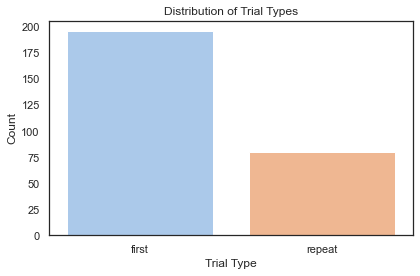

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of trial types
sns.countplot(data=meta_df, x='trial_type', palette='pastel')
plt.title("Distribution of Trial Types")
plt.xlabel("Trial Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/fig_trial_type_distribution.png")
plt.show()


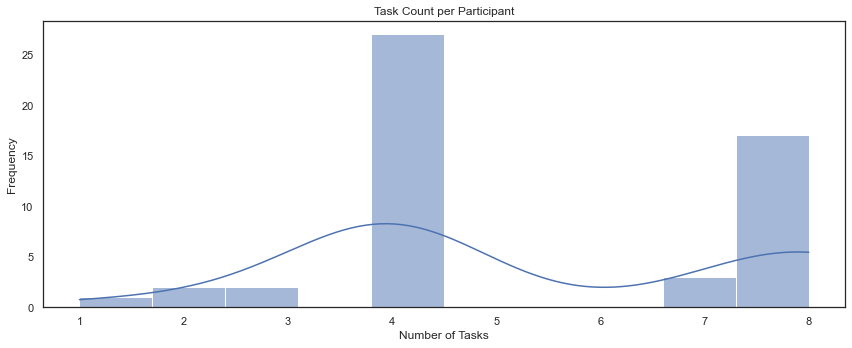

In [165]:
plt.figure(figsize=(12, 5))
task_counts = meta_df.groupby("participant_id")["task_number"].count()
sns.histplot(task_counts, bins=10, kde=True)
plt.title("Task Count per Participant")
plt.xlabel("Number of Tasks")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("figures/fig_task_count_per_participant.png")
plt.show()


In [166]:
sample_file = meta_df.sample(1).iloc[0]
df = pd.read_csv(sample_file['full_path'])

plt.figure(figsize=(14, 4))
plt.plot(df['timestamp'], df['pupil_diameter'], label='Pupil Size', color='blue')
plt.title(f"Pupil Dilation Signal — {sample_file['file_name']}")
plt.xlabel("Timestamp")
plt.ylabel("Pupil Diameter")
plt.tight_layout()
plt.savefig("figures/fig_pupil_signal_example.png")
plt.show()


KeyError: 'timestamp'

<Figure size 1008x288 with 0 Axes>

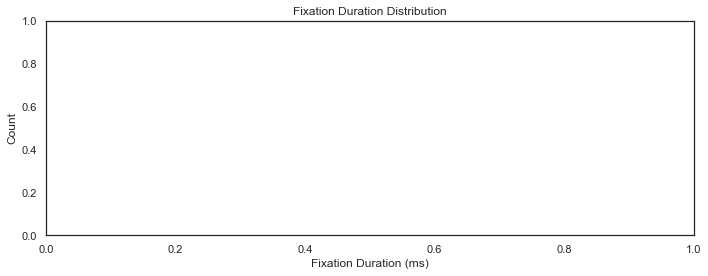

In [167]:
# Combine all fixation durations (e.g., assuming each CSV has this column)
fixation_durations = []

for path in meta_df['full_path']:
    df = pd.read_csv(path)
    if 'fixation_duration' in df.columns:
        fixation_durations.extend(df['fixation_duration'].dropna().tolist())

plt.figure(figsize=(10, 4))
sns.histplot(fixation_durations, bins=50, color='green')
plt.title("Fixation Duration Distribution")
plt.xlabel("Fixation Duration (ms)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/fig_fixation_duration_distribution.png")
plt.show()


In [168]:
sample_feature_csv = pd.read_csv("cognitive_load_features_enhanced.csv")
plt.figure(figsize=(12, 10))
sns.heatmap(sample_feature_csv.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("figures/fig_feature_correlation_heatmap.png")
plt.show()


ValueError: could not convert string to float: 'Unknown'

<Figure size 864x720 with 0 Axes>

In [169]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=20)


NameError: name 'shap' is not defined

Text(0.5, 1.0, 'GradCAM++ Feature Importance Over Time')

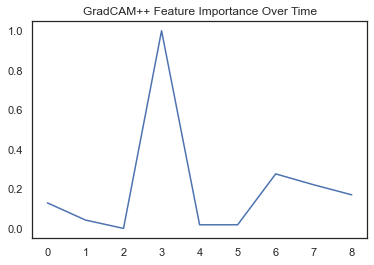

In [170]:
plt.plot(cam)
plt.title("GradCAM++ Feature Importance Over Time")


In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gradcam_heatmap(cam, label=None, class_names=None, title="Grad-CAM++ Attention Map", save_path=None):
    """
    cam: 1D array of Grad-CAM importance scores (shape: [T])
    label: Ground truth label (optional, 0 or 1)
    class_names: ['Low Load', 'High Load'] (optional)
    """
    # Normalize CAM to [0,1]
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-6)

    # Create a colormap heatmap
    fig, ax = plt.subplots(figsize=(12, 2.5))
    cmap = sns.color_palette("flare", as_cmap=True)

    sns.heatmap([cam], cmap=cmap, cbar=True, xticklabels=20, yticklabels=False,
                linewidths=0.0, ax=ax, cbar_kws={'label': 'Importance Score'})
    
    ax.set_xlabel("Time Step")
    ax.set_title(title, fontsize=14, pad=12)

    if label is not None and class_names:
        class_str = class_names[label]
        ax.text(0.99, 1.3, f"True Class: {class_str}",
                horizontalalignment='right',
                verticalalignment='center',
                transform=ax.transAxes,
                fontsize=12,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()


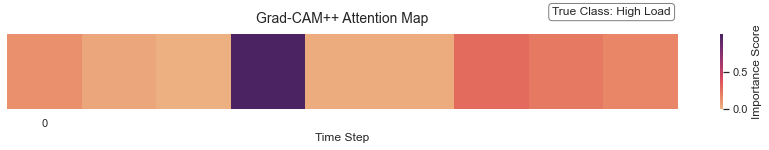

In [176]:
# Assuming cam = np.array([...])  # 1D importance map
plot_gradcam_heatmap(cam, label=1, class_names=["Low Load", "High Load"])


In [175]:
ax.set_xticklabels([f"{i/60:.1f}s" for i in ax.get_xticks()])


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/175597546.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{i/60:.1f}s" for i in ax.get_xticks()])


[Text(0, 0, '0.0s'), Text(1, 0, '0.0s')]

In [177]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gradcam_overlay(signal, cam, feature_name="Velocity", time_step=1/60, title="Grad-CAM Overlay", save_path=None):
    """
    signal: 1D array of raw eye feature (e.g. velocity, pupil diameter)
    cam: 1D Grad-CAM importance values aligned with signal
    time_step: sampling rate (default 60Hz → 1/60 sec)
    """
    # Normalize CAM
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-6)

    # Time axis
    t = np.arange(len(signal)) * time_step

    fig, ax = plt.subplots(figsize=(12, 4))

    # Plot the signal
    ax.plot(t, signal, label=f"{feature_name}", color="black", linewidth=1.2)

    # Overlay Grad-CAM as translucent background
    ax.fill_between(t, min(signal), max(signal),
                    where=cam > 0.2,
                    color="red", alpha=0.3, label="High Attention")

    ax.set_xlabel("Time (s)")
    ax.set_ylabel(feature_name)
    ax.set_title(title, fontsize=14)
    ax.legend(loc="upper right")

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()


In [179]:
import torch
import numpy as np

def generate_gradcam(model, input_tensor, target_layer, class_idx=None):
    """
    Generates Grad-CAM for a given model & input.
    
    model: PyTorch model
    input_tensor: input sequence tensor of shape [1, C, T] (batch=1, channels, timesteps)
    target_layer: the layer to compute Grad-CAM from (e.g., model.layer4[1].conv2)
    class_idx: target class index (default: predicted class)
    """
    activations = []
    gradients = []

    def forward_hook(module, inp, out):
        activations.append(out.detach())

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0].detach())

    # Register hooks
    handle_fwd = target_layer.register_forward_hook(forward_hook)
    handle_bwd = target_layer.register_backward_hook(backward_hook)

    # Forward pass
    output = model(input_tensor)
    if class_idx is None:
        class_idx = output.argmax(dim=1).item()

    # Backward pass
    model.zero_grad()
    output[0, class_idx].backward()

    # Compute weights
    grads = gradients[0].mean(dim=-1, keepdim=True)  # global average pooling
    act = activations[0]
    cam = (grads * act).sum(dim=1).squeeze()

    # Normalize
    cam = torch.relu(cam)
    cam = cam / (cam.max() + 1e-6)
    cam_np = cam.cpu().numpy()

    # Remove hooks
    handle_fwd.remove()
    handle_bwd.remove()

    return cam_np


In [206]:
from graphviz import Digraph

def build_pipeline(filename="fig_feature_pipeline"):
    g = Digraph(filename=filename, format="png")

    # --- Graph styling ---
    g.attr(rankdir="TB",  # Top -> Bottom (vertical)
           dpi="600",      # high-quality output
           bgcolor="white",
           nodesep="1.2",  # horizontal spacing between nodes
           ranksep="1.8")  # vertical spacing between stages

    g.attr("node", shape="box",
           style="rounded,filled",
           fontname="Helvetica",
           fontsize="16",  # large font
           width="4",      # wider boxes
           height="1.5",   # taller boxes
           fixedsize="false")

    # -----------------------------
    # Stage 1: Raw Data
    # -----------------------------
    g.node("raw", 
           "**Raw Eye-Tracking Data**\n─────────────────────────\n• Fixations\n• Saccades\n• Pupil\n• Blinks", 
           fillcolor="#BBDEFB")

    # -----------------------------
    # Stage 2: Preprocessing
    # -----------------------------
    g.node("preproc", 
           "**Preprocessing**\n─────────────────────────\n• Interpolation (missing data)\n• Signal smoothing\n• Normalization", 
           fillcolor="#C8E6C9")

    # -----------------------------
    # Stage 3: Segmentation
    # -----------------------------
    g.node("segment", 
           "**Temporal Segmentation**\n─────────────────────────\n• 2s overlapping windows\n• 120 samples @ 60Hz", 
           fillcolor="#FFF59D")

    # -----------------------------
    # Stage 4: Feature Extraction
    # -----------------------------
    g.node("features", 
           "**Feature Extraction**\n─────────────────────────\n• Fixation stats (duration, dispersion)\n• Saccade metrics (velocity, amplitude)\n• Pupil features (dilation, oscillation)\n• Blink metrics (rate, entropy)\n• Transition entropy", 
           fillcolor="#FFCC80")

    # -----------------------------
    # Stage 5: Fusion & Cleaning
    # -----------------------------
    g.node("fusion", 
           "**Feature Fusion & Cleaning**\n─────────────────────────\n• Merge modalities\n• Z-score normalization\n• Subject-level leakage control", 
           fillcolor="#D1C4E9")

    # -----------------------------
    # Stage 6: CSV Exports
    # -----------------------------
    g.node("csvs", 
           "**Structured CSV Exports**\n─────────────────────────\n• fixation_features.csv → Fixation-only\n• phase2_complete_features.csv → Full stats\n• cognitive_load_features_enhanced.csv → Entropy-rich\n• cognitive_load_full_features_with_entropy.csv → Epoch-level", 
           fillcolor="#B0BEC5")

    # -----------------------------
    # Stage 7: Modeling
    # -----------------------------
    g.node("models", 
           "**Downstream Models**\n─────────────────────────\nClassical ML:\n• Logistic Regression\n• SVM\n• Random Forest\n\nDeep Learning:\n• CNN\n• TCN\n• ViT\n• Hybrid TCN+ViT", 
           fillcolor="#AED581")

    # -----------------------------
    # Connect the pipeline vertically
    # -----------------------------
    g.edge("raw", "preproc")
    g.edge("preproc", "segment")
    g.edge("segment", "features")
    g.edge("features", "fusion")
    g.edge("fusion", "csvs")
    g.edge("csvs", "models")

    # Render files
    g.render(cleanup=True)  # PNG
    g.format = "pdf"
    g.render(cleanup=True)  # PDF

    return f"Generated {filename}.png and {filename}.pdf"

if __name__ == "__main__":
    print(build_pipeline())


Generated fig_feature_pipeline.png and fig_feature_pipeline.pdf


In [275]:
from graphviz import Digraph

def build_pipeline_report(filename="fig_feature_pipeline_proper_large"):
    g = Digraph(filename=filename, format="png")

    # --- Graph styling ---
    # Increased font and node size, and adjusted spacing
    g.attr(rankdir="TB",
           dpi="600",
           bgcolor="white",
           nodesep="1.5",  # Increased horizontal spacing
           ranksep="2.0")  # Increased vertical spacing

    g.attr("node", shape="box",
           style="rounded,filled",
           fontname="Helvetica",
           fontsize="24",    # SIGNIFICANTLY LARGER FONT
           width="5",        # Wider nodes
           height="2.0",     # Taller nodes
           fixedsize="false")

    # -----------------------------
    # Stage 1: Raw Data
    # -----------------------------
    g.node("raw",
           "**Raw Eye-Tracking Data**\nFixations, Saccades, Blinks",
           fillcolor="#BBDEFB")

    # -----------------------------
    # Stage 2: Preprocessing
    # -----------------------------
    g.node("preproc",
           "**Preprocessing**\nInterpolation & Smoothing",
           fillcolor="#C8E6C9")

    # -----------------------------
    # Stage 3: Segmentation
    # -----------------------------
    g.node("segment",
           "**Temporal Segmentation**\n2s Overlapping Windows",
           fillcolor="#FFF59D")

    # -----------------------------
    # Stage 4: Feature Extraction
    # -----------------------------
    g.node("features",
           "**Feature Extraction**\nVelocity, Entropy, Blink Rate",
           fillcolor="#FFCC80")

    # -----------------------------
    # Stage 5: Fusion & Cleaning
    # -----------------------------
    g.node("fusion",
           "**Feature Fusion & Cleaning**\nMerge & Normalize Data",
           fillcolor="#D1C4E9")

    # -----------------------------
    # Stage 6: CSV Exports
    # -----------------------------
    g.node("csvs",
           "**Structured CSV Exports**",
           fillcolor="#B0BEC5")

    # -----------------------------
    # Stage 7: Modeling
    # -----------------------------
    g.node("models",
           "**Downstream Models**\nClassic ML & Deep Learning",
           fillcolor="#AED581")

    # -----------------------------
    # Connect the stages
    # -----------------------------
    # Primary flow
    g.edge("raw", "preproc")
    g.edge("preproc", "segment")
    g.edge("segment", "features")
    g.edge("features", "fusion")
    g.edge("fusion", "csvs")
    g.edge("csvs", "models")

    # Use invisible subgraphs to align nodes on the same rank
    with g.subgraph() as s:
        s.attr(rank='same')
        s.node("raw")
        s.node("preproc")
    
    with g.subgraph() as s:
        s.attr(rank='same')
        s.node("segment")
        s.node("features")
        
    with g.subgraph() as s:
        s.attr(rank='same')
        s.node("fusion")
        s.node("csvs")
        s.node("models")
    
    # Render files
    g.render(cleanup=True)
    g.format = "pdf"
    g.render(cleanup=True)

    return f"Generated {filename}.png and {filename}.pdf"

if __name__ == "__main__":
    print(build_pipeline_report())


Generated fig_feature_pipeline_proper_large.png and fig_feature_pipeline_proper_large.pdf


TypeError: Legend.__init__() got an unexpected keyword argument 'ncols'

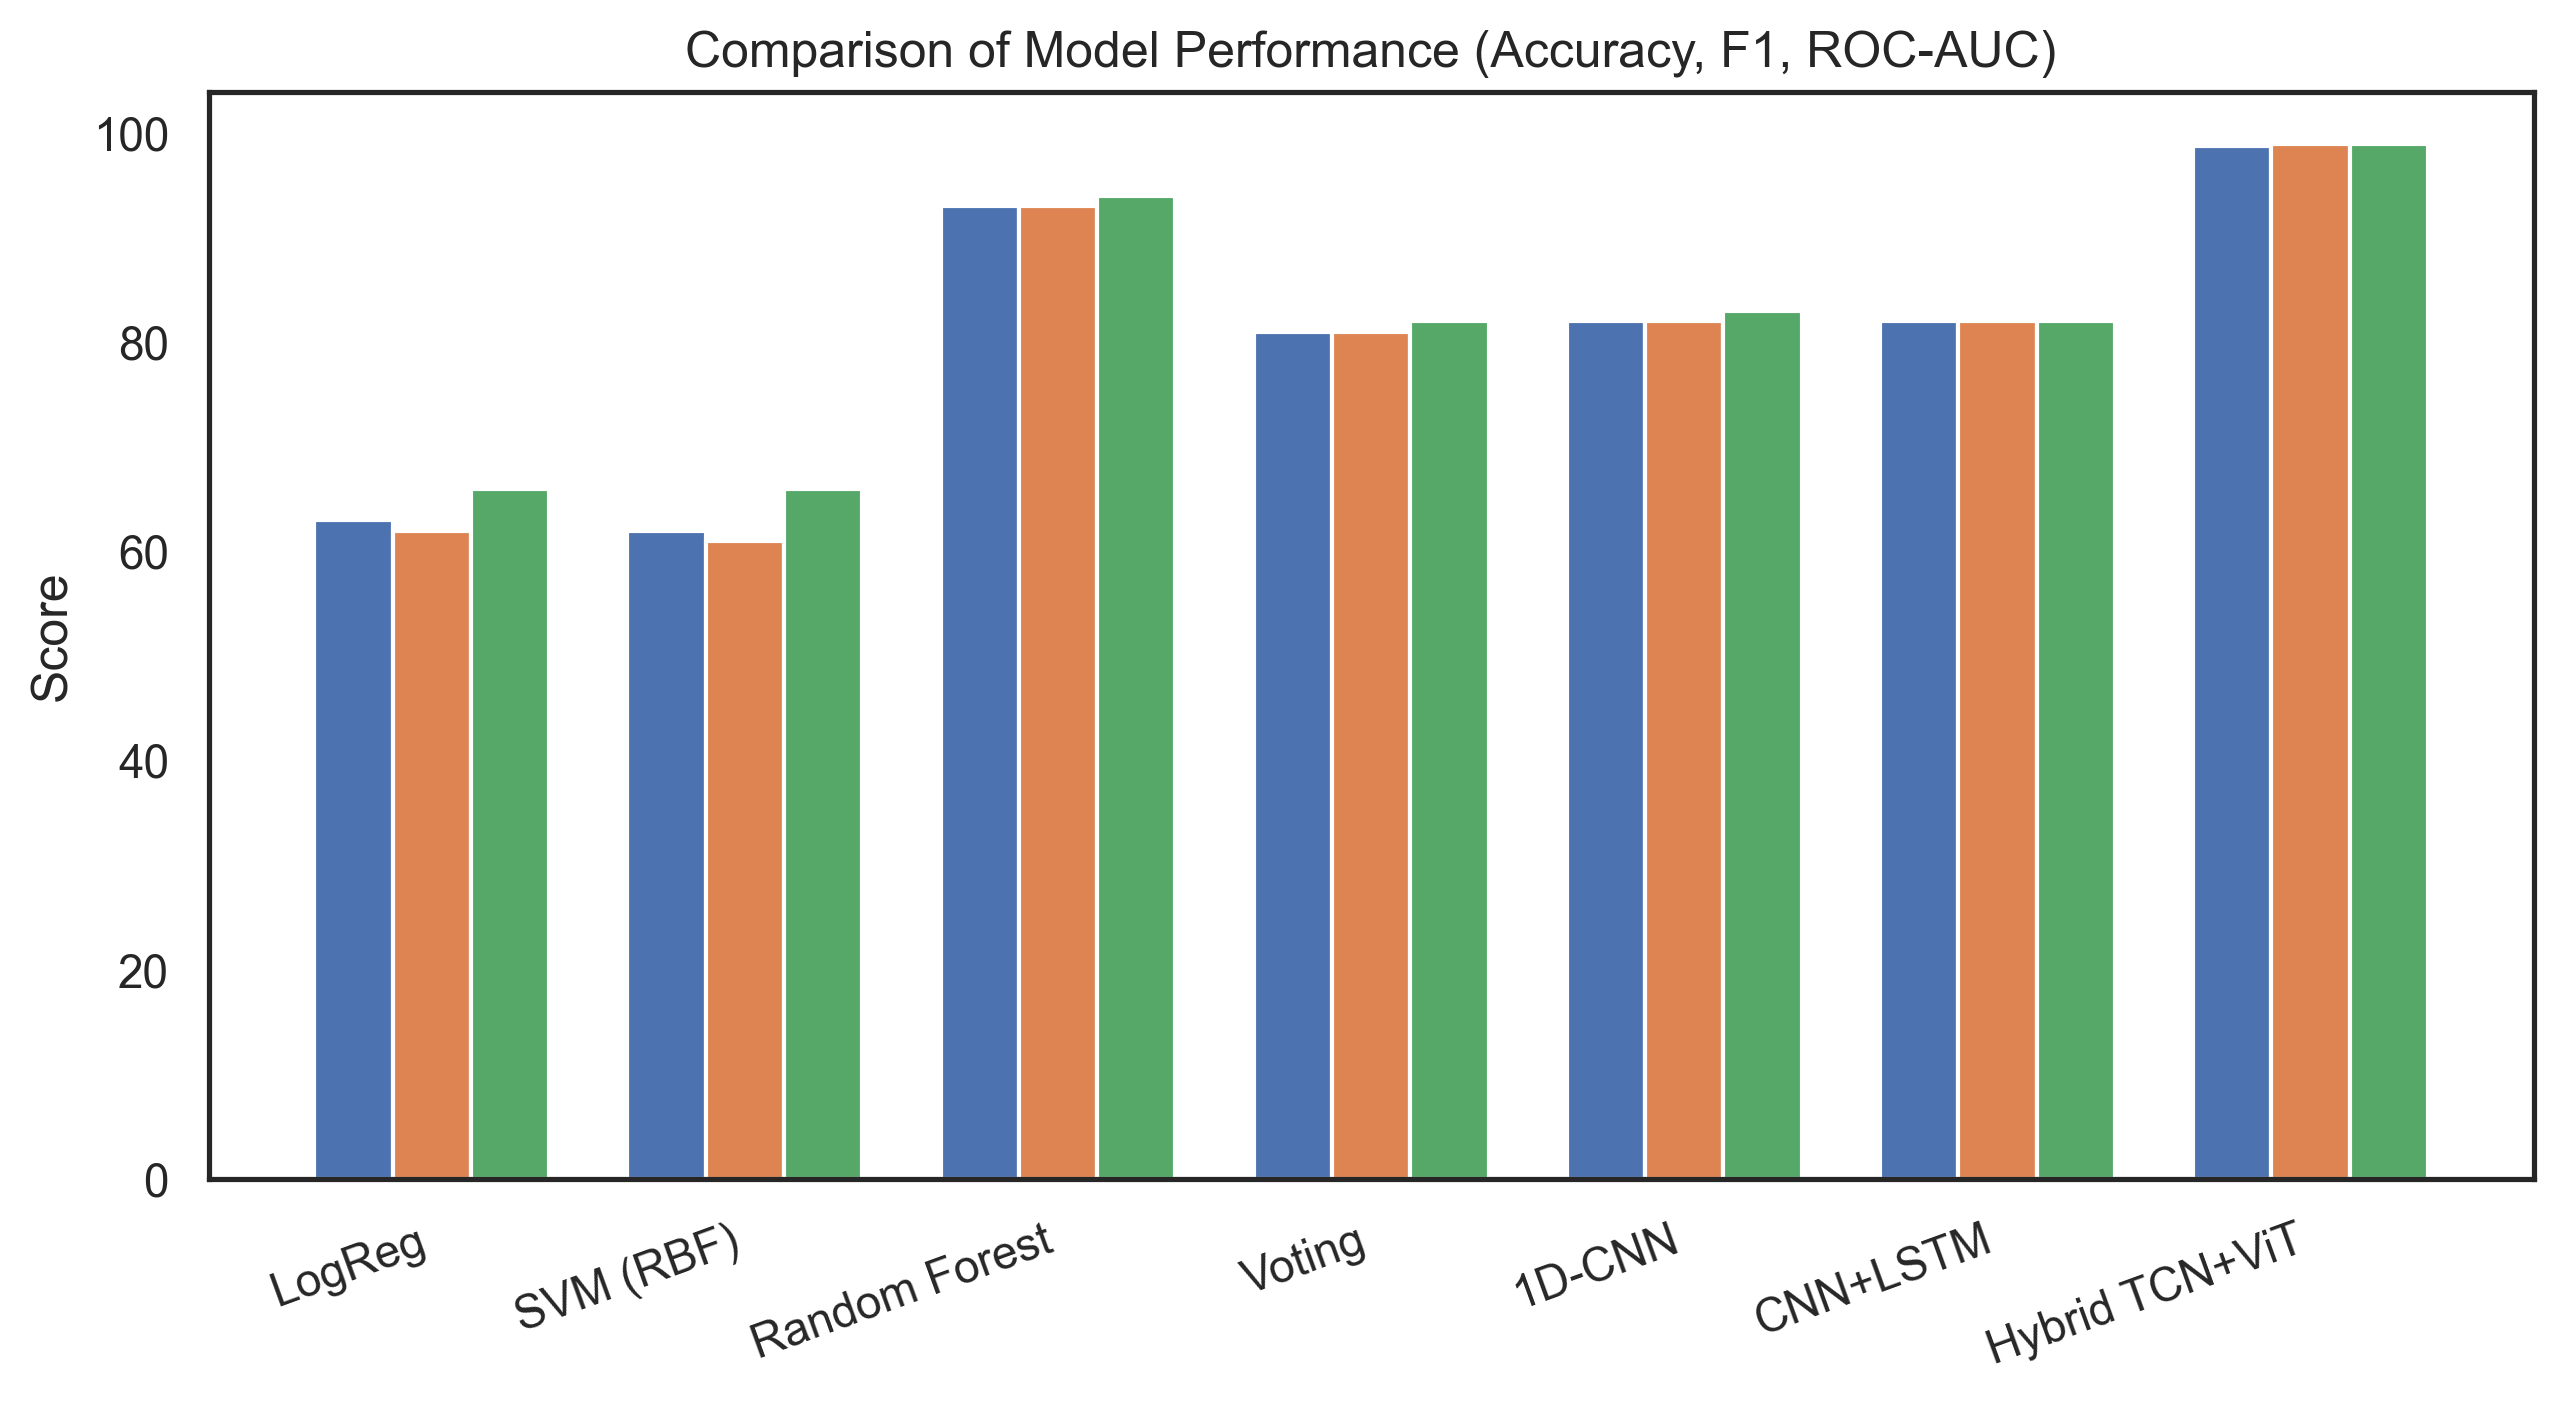

In [194]:
# ==============================
# Make Results Figures
# ==============================
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

os.makedirs("figures", exist_ok=True)

# ------------------------------
# 1) Model comparison bar chart
# ------------------------------
models = [
    "LogReg", "SVM (RBF)", "Random Forest",
    "Voting", "1D-CNN", "CNN+LSTM", "Hybrid TCN+ViT"
]
accuracy = np.array([0.63, 0.62, 0.93, 0.81, 0.82, 0.82, 0.988]) * 100.0  # %
f1       = np.array([0.62, 0.61, 0.93, 0.81, 0.82, 0.82, 0.99])
roc_auc  = np.array([0.66, 0.66, 0.94, 0.82, 0.83, 0.82, 0.99])

x = np.arange(len(models))
w = 0.25

plt.figure(figsize=(10, 4.8), dpi=300)
plt.bar(x - w, accuracy, width=w, label="Accuracy (%)")
plt.bar(x,      f1*100, width=w, label="F1 (%)")
plt.bar(x + w,  roc_auc*100, width=w, label="ROC-AUC (%)")
plt.xticks(x, models, rotation=20, ha="right")
plt.ylabel("Score")
plt.title("Comparison of Model Performance (Accuracy, F1, ROC-AUC)")
plt.legend(loc="upper left", ncols=3)
plt.grid(axis="y", linestyle=":", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.savefig("figures/model_comparison_bar.png", dpi=300)
plt.close()

print("Saved: figures/model_comparison_bar.png")

# -------------------------------------
# 2) Confusion Matrix — Hybrid TCN+ViT
# -------------------------------------
# From your final hybrid run: [[TN, FP],[FN, TP]] = [[42,1],[0,43]]
cm = np.array([[42, 1],
               [ 0, 43]])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
disp.plot(ax=ax, colorbar=False)
ax.set_title("Confusion Matrix — Hybrid TCN+ViT")
plt.tight_layout()
plt.savefig("figures/confusion_matrix_tcn_vit.png", dpi=300)
plt.close()

print("Saved: figures/confusion_matrix_tcn_vit.png")

# -------------------------------------
# 3) ROC Curve — Hybrid TCN+ViT
# -------------------------------------
# Option A (preferred): if you saved y_true and y_score probabilities, load them and plot the full ROC.
# Provide a CSV with two columns: y_true (0/1), y_score (probability).
# Example file path: 'hybrid_tcn_vit_scores.csv'
use_scores_file = False
scores_path = "hybrid_tcn_vit_scores.csv"

if use_scores_file and os.path.exists(scores_path):
    import pandas as pd
    df = pd.read_csv(scores_path)
    y_true = df["y_true"].values
    y_score = df["y_score"].values
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5.5, 4.5), dpi=300)
    plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve — Hybrid TCN+ViT")
    plt.legend(loc="lower right")
    plt.grid(linestyle=":", linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.savefig("figures/roc_tcn_vit.png", dpi=300)
    plt.close()
else:
    # Option B: If probabilities are unavailable, plot the single operating point from the confusion matrix
    # as a dashed marker and annotate (this is not a true ROC, but is useful for the paper).
    TN, FP = cm[0]
    FN, TP = cm[1]
    tpr = TP / (TP + FN) if (TP + FN) else 0.0
    fpr = FP / (FP + TN) if (FP + TN) else 0.0

    plt.figure(figsize=(5.5, 4.5), dpi=300)
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
    plt.scatter([fpr], [tpr], s=60, marker="o", label=f"Op. point (TPR={tpr:.3f}, FPR={fpr:.3f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC — Hybrid TCN+ViT (single-point, scores unavailable)")
    plt.legend(loc="lower right")
    plt.grid(linestyle=":", linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.savefig("figures/roc_tcn_vit.png", dpi=300)
    plt.close()

print("Saved: figures/roc_tcn_vit.png")


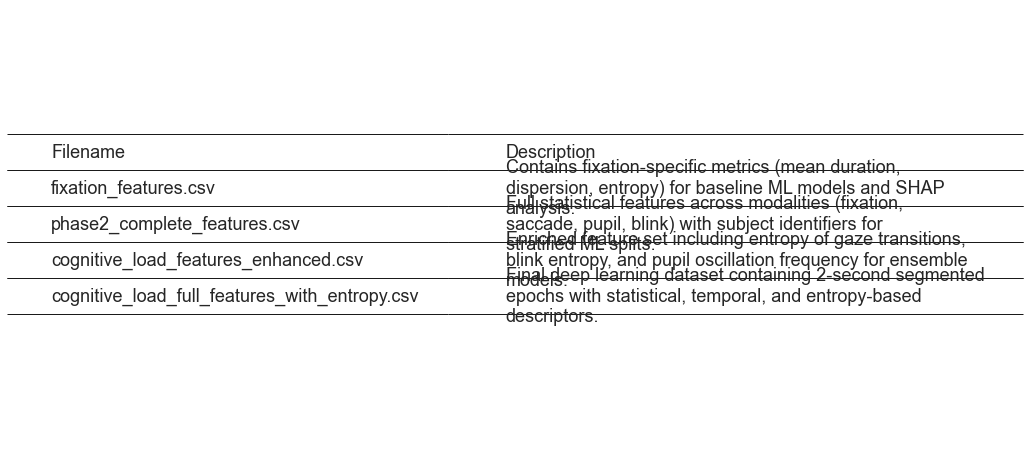

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# --- Table data ---
data = {
    "Filename": [
        "fixation_features.csv",
        "phase2_complete_features.csv",
        "cognitive_load_features_enhanced.csv",
        "cognitive_load_full_features_with_entropy.csv"
    ],
    "Description": [
        "Contains fixation-specific metrics (mean duration, dispersion, entropy) for baseline ML models and SHAP analysis.",
        "Full statistical features across modalities (fixation, saccade, pupil, blink) with subject identifiers for stratified ML splits.",
        "Enriched feature set including entropy of gaze transitions, blink entropy, and pupil oscillation frequency for ensemble models.",
        "Final deep learning dataset containing 2-second segmented epochs with statistical, temporal, and entropy-based descriptors."
    ]
}

# --- Wrap long descriptions for better readability ---
wrapped_descriptions = [ "\n".join(textwrap.wrap(desc, width=60)) for desc in data["Description"]]
data["Description"] = wrapped_descriptions

df = pd.DataFrame(data)

# --- Create figure ---
fig, ax = plt.subplots(figsize=(18, 8))  # larger figure for readability
ax.axis('off')  # hide axes

# --- Create table ---
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='left',
    colLoc='left',
    loc='center',
    edges='horizontal'
)

# --- Style the table ---
table.auto_set_font_size(False)
table.set_fontsize(18)   # larger font
table.auto_set_column_width([0, 1])
table.scale(1, 3)        # increase row height

# --- Save as image ---
plt.savefig("feature_csv_table.png", bbox_inches='tight', dpi=300)
plt.show()


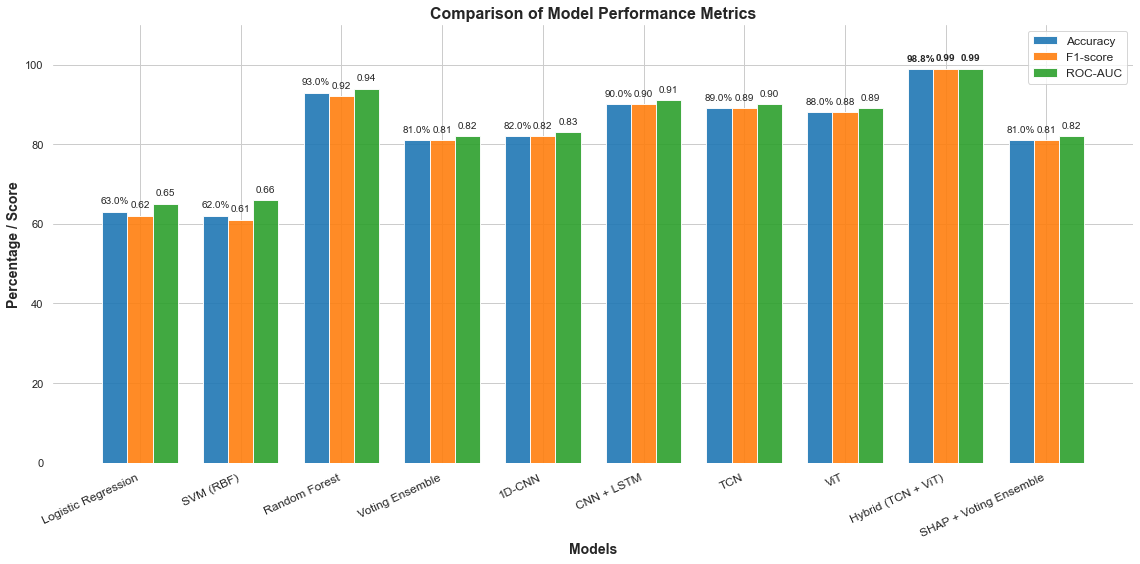

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82]
}

df = pd.DataFrame(data)

# --- Set style ---
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# --- Bar settings ---
bar_width = 0.25
opacity = 0.9
index = np.arange(len(df))

# --- Create grouped bars ---
bars_acc = plt.bar(index, df["Accuracy"], bar_width, alpha=opacity, color="#1f77b4", label="Accuracy")
bars_f1  = plt.bar(index + bar_width, df["F1-score"]*100, bar_width, alpha=opacity, color="#ff7f0e", label="F1-score")
bars_roc = plt.bar(index + 2*bar_width, df["ROC-AUC"]*100, bar_width, alpha=opacity, color="#2ca02c", label="ROC-AUC")

# --- Annotate bars ---
for i in range(len(df)):
    # Accuracy
    plt.text(index[i], df["Accuracy"][i]+2, f'{df["Accuracy"][i]:.1f}%', ha='center', fontsize=10, fontweight='bold' if df["Model"][i]=="Hybrid (TCN + ViT)" else 'normal')
    # F1-score
    plt.text(index[i]+bar_width, df["F1-score"][i]*100 + 2, f'{df["F1-score"][i]:.2f}', ha='center', fontsize=10, fontweight='bold' if df["Model"][i]=="Hybrid (TCN + ViT)" else 'normal')
    # ROC-AUC
    plt.text(index[i]+2*bar_width, df["ROC-AUC"][i]*100 + 2, f'{df["ROC-AUC"][i]:.2f}', ha='center', fontsize=10, fontweight='bold' if df["Model"][i]=="Hybrid (TCN + ViT)" else 'normal')

# --- Labels, title, legend ---
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Percentage / Score', fontsize=14, fontweight='bold')
plt.title('Comparison of Model Performance Metrics', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width, df["Model"], rotation=25, ha='right', fontsize=12)
plt.ylim(0, 110)
plt.legend(fontsize=12)

plt.tight_layout()
sns.despine(left=True, bottom=True)

# --- Save figure ---
plt.savefig("model_comparison.png", dpi=300)
plt.show()


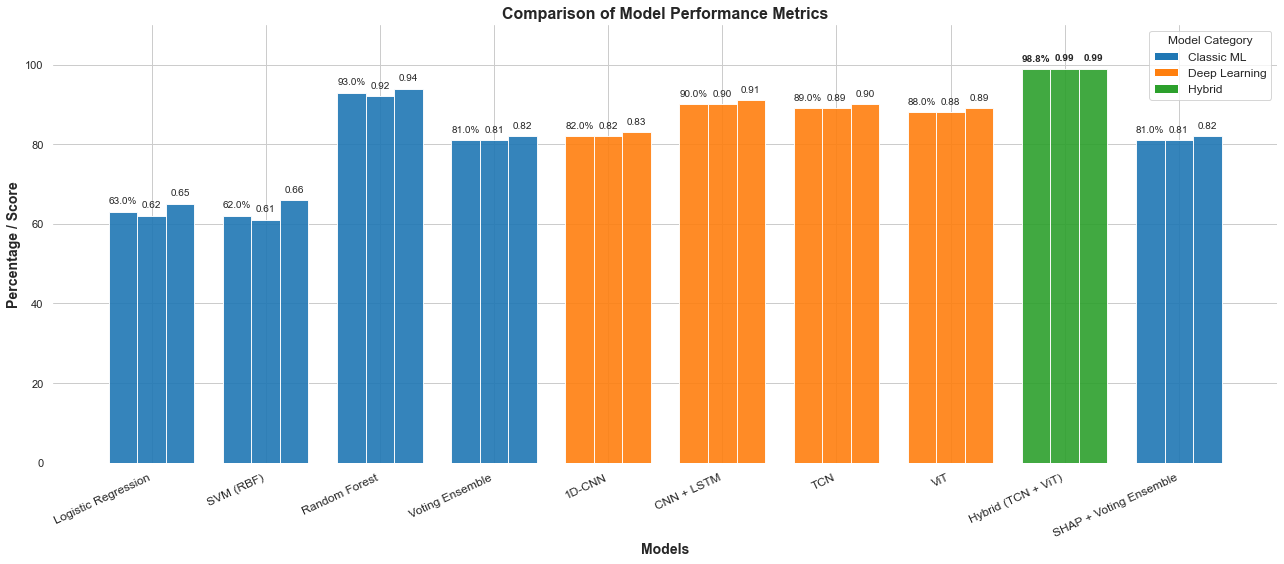

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}

df = pd.DataFrame(data)

# --- Set style ---
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))

# --- Bar settings ---
bar_width = 0.25
opacity = 0.9
index = np.arange(len(df))

# --- Define colors by category ---
colors = {
    "Classic ML": "#1f77b4",
    "Deep Learning": "#ff7f0e",
    "Hybrid": "#2ca02c"
}

# --- Create grouped bars ---
bars_acc = plt.bar(index, df["Accuracy"], bar_width, alpha=opacity,
                   color=[colors[cat] for cat in df["Category"]], label="Accuracy")
bars_f1  = plt.bar(index + bar_width, df["F1-score"]*100, bar_width, alpha=opacity,
                   color=[colors[cat] for cat in df["Category"]], label="F1-score")
bars_roc = plt.bar(index + 2*bar_width, df["ROC-AUC"]*100, bar_width, alpha=opacity,
                   color=[colors[cat] for cat in df["Category"]], label="ROC-AUC")

# --- Annotate bars ---
for i in range(len(df)):
    weight = 'bold' if df["Model"][i] == "Hybrid (TCN + ViT)" else 'normal'
    # Accuracy
    plt.text(index[i], df["Accuracy"][i]+2, f'{df["Accuracy"][i]:.1f}%', ha='center', fontsize=10, fontweight=weight)
    # F1-score
    plt.text(index[i]+bar_width, df["F1-score"][i]*100 + 2, f'{df["F1-score"][i]:.2f}', ha='center', fontsize=10, fontweight=weight)
    # ROC-AUC
    plt.text(index[i]+2*bar_width, df["ROC-AUC"][i]*100 + 2, f'{df["ROC-AUC"][i]:.2f}', ha='center', fontsize=10, fontweight=weight)

# --- Labels, title, legend ---
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Percentage / Score', fontsize=14, fontweight='bold')
plt.title('Comparison of Model Performance Metrics', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width, df["Model"], rotation=25, ha='right', fontsize=12)
plt.ylim(0, 110)

# --- Custom legend ---
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#1f77b4", label='Classic ML'),
    Patch(facecolor="#ff7f0e", label='Deep Learning'),
    Patch(facecolor="#2ca02c", label='Hybrid')
]
plt.legend(handles=legend_elements, title="Model Category", fontsize=12, title_fontsize=12)

plt.tight_layout()
sns.despine(left=True, bottom=True)

# --- Save figure ---
plt.savefig("model_comparison_categorized.png", dpi=300)
plt.show()


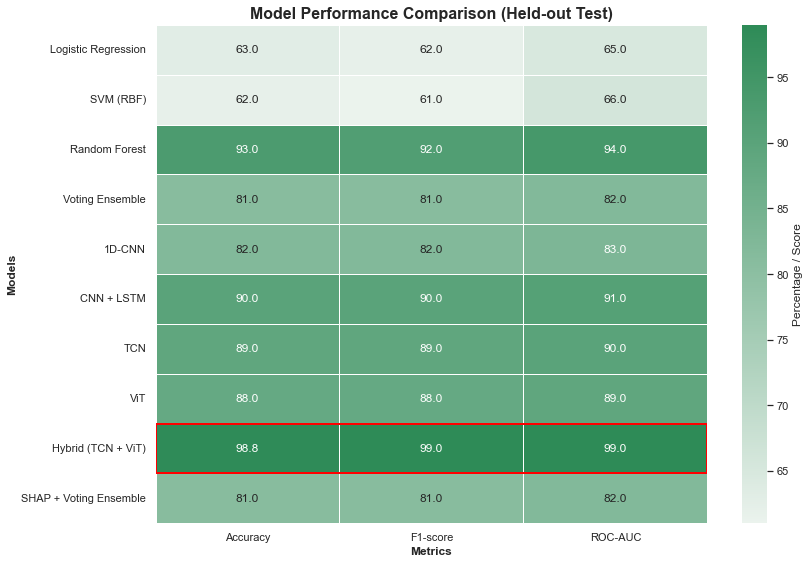

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}

df = pd.DataFrame(data)

# --- Prepare heatmap data ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]]
# Scale F1-score and ROC-AUC to percentage for consistent color scale
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

# --- Set color palette ---
cmap = sns.light_palette("seagreen", as_cmap=True)

# --- Plot heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap=cmap, 
    cbar_kws={'label': 'Percentage / Score'}, 
    linewidths=0.8,
    linecolor='white'
)

# --- Customize axes and title ---
plt.title("Model Performance Comparison (Held-out Test)", fontsize=16, fontweight='bold')
plt.ylabel("Models", fontsize=12, fontweight='bold')
plt.xlabel("Metrics", fontsize=12, fontweight='bold')

# --- Highlight Hybrid model row by adding a rectangle ---
import matplotlib.patches as patches

ax = plt.gca()
hybrid_idx = df.index[df["Model"] == "Hybrid (TCN + ViT)"][0]
rect = patches.Rectangle(
    (0, hybrid_idx), 3, 1, fill=False, edgecolor="red", lw=2
)
ax.add_patch(rect)

plt.tight_layout()
plt.savefig("model_comparison_heatmap.png", dpi=300)
plt.show()


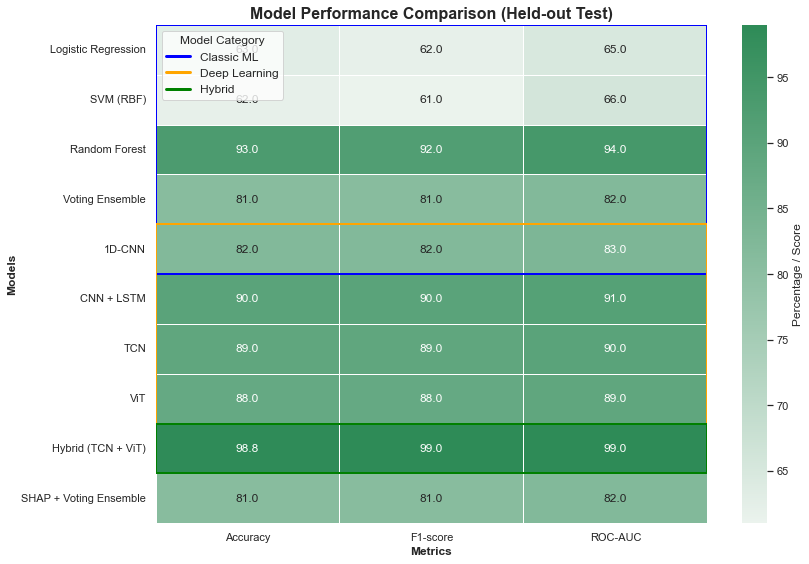

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}

df = pd.DataFrame(data)

# --- Prepare heatmap data ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]]
# Scale F1-score and ROC-AUC to percentage for consistent color scale
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

# --- Set color palette ---
cmap = sns.light_palette("seagreen", as_cmap=True)

# --- Plot heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap=cmap, 
    cbar_kws={'label': 'Percentage / Score'}, 
    linewidths=0.8,
    linecolor='white'
)

# --- Customize axes and title ---
plt.title("Model Performance Comparison (Held-out Test)", fontsize=16, fontweight='bold')
plt.ylabel("Models", fontsize=12, fontweight='bold')
plt.xlabel("Metrics", fontsize=12, fontweight='bold')

# --- Highlight categories with rectangles ---
ax = plt.gca()
category_colors = {
    "Classic ML": "blue",
    "Deep Learning": "orange",
    "Hybrid": "green"
}

for cat, color in category_colors.items():
    indices = df.index[df["Category"] == cat].tolist()
    start = min(indices)
    height = len(indices)
    rect = patches.Rectangle(
        (0, start), 3, height, fill=False, edgecolor=color, lw=2
    )
    ax.add_patch(rect)

# --- Add custom legend for categories ---
legend_elements = [Line2D([0], [0], color=color, lw=3, label=cat) 
                   for cat, color in category_colors.items()]
ax.legend(handles=legend_elements, title="Model Category", fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig("model_comparison_heatmap_categories.png", dpi=300)
plt.show()


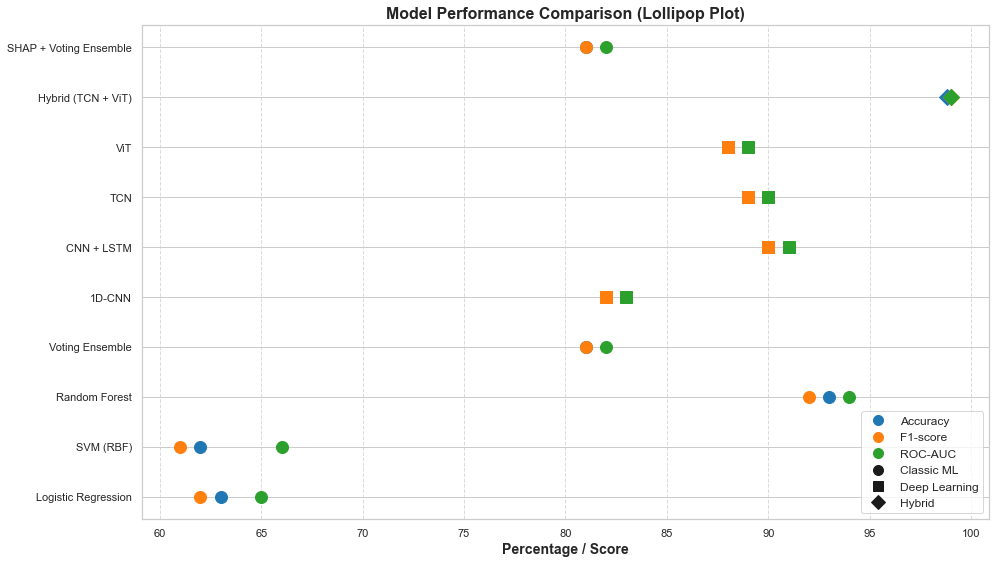

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}

df = pd.DataFrame(data)
metrics = ["Accuracy", "F1-score", "ROC-AUC"]
metric_colors = {"Accuracy": "#1f77b4", "F1-score": "#ff7f0e", "ROC-AUC": "#2ca02c"}
category_markers = {"Classic ML": "o", "Deep Learning": "s", "Hybrid": "D"}

plt.figure(figsize=(14, 8))

for metric in metrics:
    for i, row in df.iterrows():
        plt.plot(row[metric]*100 if metric != "Accuracy" else row[metric], 
                 i, 
                 marker=category_markers[row["Category"]],
                 color=metric_colors[metric],
                 markersize=12, 
                 label=f"{metric}" if i == 0 else "")

# --- Customizations ---
plt.yticks(range(len(df)), df["Model"])
plt.xlabel("Percentage / Score", fontsize=14, fontweight='bold')
plt.title("Model Performance Comparison (Lollipop Plot)", fontsize=16, fontweight='bold')

# --- Legend for metrics and categories ---
from matplotlib.lines import Line2D
metric_legend = [Line2D([0],[0], marker='o', color=c, label=m, markersize=10, lw=0) 
                 for m, c in metric_colors.items()]
category_legend = [Line2D([0],[0], marker=mk, color='k', label=cat, markersize=10, lw=0) 
                   for cat, mk in category_markers.items()]
plt.legend(handles=metric_legend + category_legend, fontsize=12, loc='lower right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


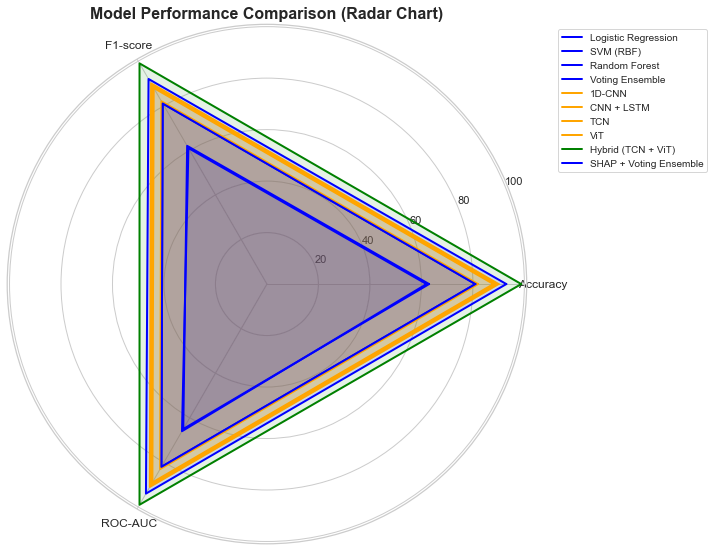

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# --- Normalize metrics to 0-1 scale ---
df_radar = df.copy()
df_radar["Accuracy_norm"] = df_radar["Accuracy"] / 100
df_radar["F1-score_norm"] = df_radar["F1-score"]
df_radar["ROC-AUC_norm"] = df_radar["ROC-AUC"]

categories = ["Accuracy_norm", "F1-score_norm", "ROC-AUC_norm"]
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # complete loop

# --- Category colors ---
category_colors = {"Classic ML": "blue", "Deep Learning": "orange", "Hybrid": "green"}

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

for i, row in df_radar.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # complete loop
    ax.plot(angles, values, color=category_colors[row["Category"]], linewidth=2, label=row["Model"])
    ax.fill(angles, values, color=category_colors[row["Category"]], alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Accuracy", "F1-score", "ROC-AUC"], fontsize=12)
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels(["20","40","60","80","100"])
plt.title("Model Performance Comparison (Radar Chart)", fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


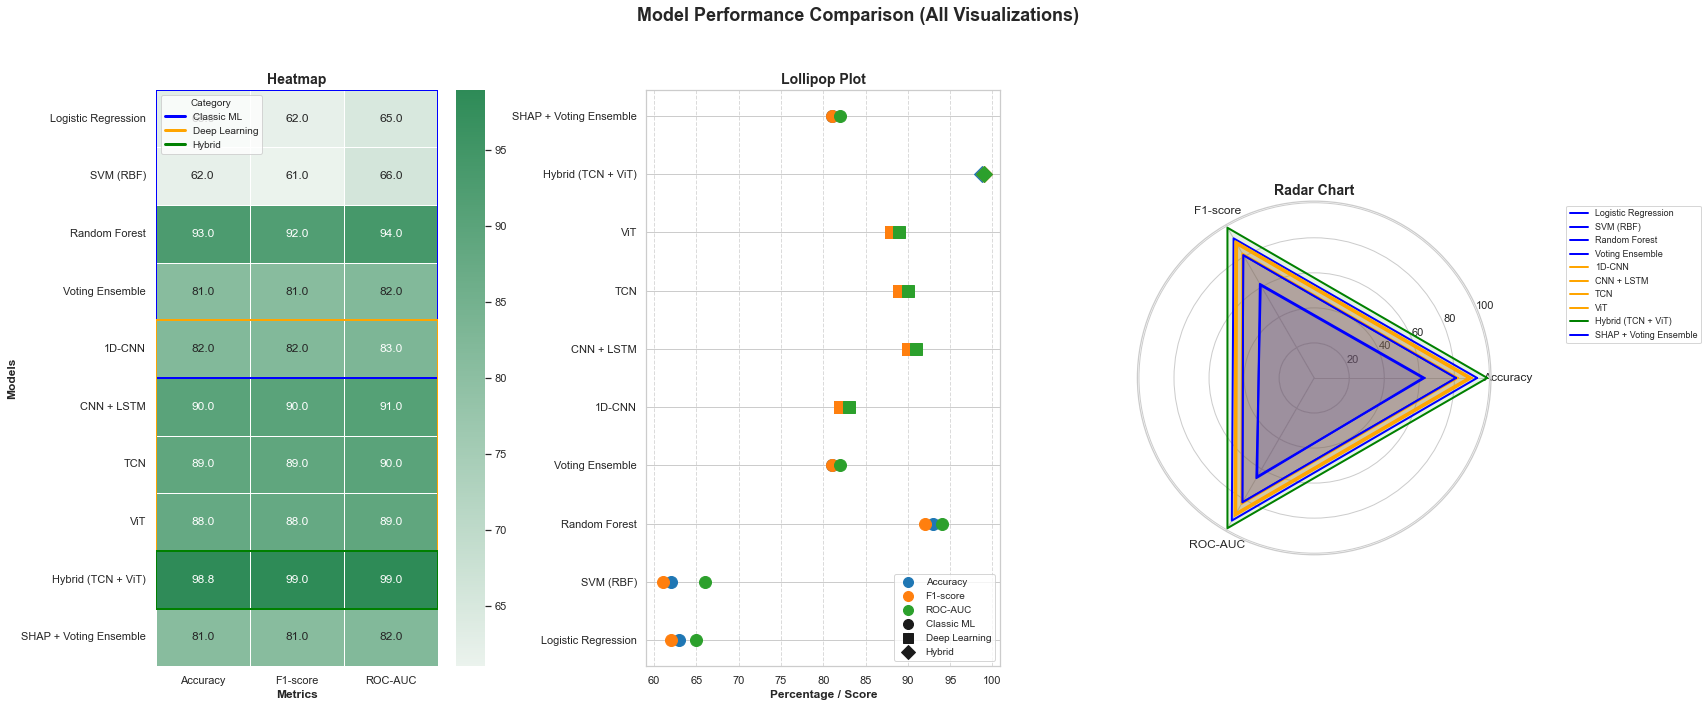

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

# --- Normalize for radar chart ---
df_radar = df.copy()
df_radar["Accuracy_norm"] = df_radar["Accuracy"] / 100
df_radar["F1-score_norm"] = df_radar["F1-score"]
df_radar["ROC-AUC_norm"] = df_radar["ROC-AUC"]

# --- Setup figure with 3 subplots ---
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

# --- 1. Heatmap ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]].copy()
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("seagreen", as_cmap=True),
    linewidths=0.8,
    linecolor='white',
    ax=axes[0]
)
axes[0].set_title("Heatmap", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Models", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Highlight categories
category_colors = {"Classic ML": "blue", "Deep Learning": "orange", "Hybrid": "green"}
ax0 = axes[0]
for cat, color in category_colors.items():
    indices = df.index[df["Category"] == cat].tolist()
    start = min(indices)
    height = len(indices)
    rect = patches.Rectangle((0, start), 3, height, fill=False, edgecolor=color, lw=2)
    ax0.add_patch(rect)
# Legend for categories
legend_elements = [Line2D([0], [0], color=color, lw=3, label=cat) 
                   for cat, color in category_colors.items()]
ax0.legend(handles=legend_elements, title="Category", fontsize=10, title_fontsize=10, loc='upper left')

# --- 2. Lollipop / Dot Plot ---
metrics = ["Accuracy", "F1-score", "ROC-AUC"]
metric_colors = {"Accuracy": "#1f77b4", "F1-score": "#ff7f0e", "ROC-AUC": "#2ca02c"}
category_markers = {"Classic ML": "o", "Deep Learning": "s", "Hybrid": "D"}
ax1 = axes[1]
for metric in metrics:
    for i, row in df.iterrows():
        val = row[metric]*100 if metric != "Accuracy" else row[metric]
        ax1.plot(val, i, marker=category_markers[row["Category"]],
                 color=metric_colors[metric], markersize=12, label=f"{metric}" if i == 0 else "")
ax1.set_yticks(range(len(df)))
ax1.set_yticklabels(df["Model"])
ax1.set_xlabel("Percentage / Score", fontsize=12, fontweight='bold')
ax1.set_title("Lollipop Plot", fontsize=14, fontweight='bold')
# Legend
metric_legend = [Line2D([0],[0], marker='o', color=c, label=m, markersize=10, lw=0) 
                 for m, c in metric_colors.items()]
category_legend = [Line2D([0],[0], marker=mk, color='k', label=cat, markersize=10, lw=0) 
                   for cat, mk in category_markers.items()]
ax1.legend(handles=metric_legend + category_legend, fontsize=10, loc='lower right')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# --- 3. Radar / Spider Chart ---
ax2 = plt.subplot(1, 3, 3, polar=True)
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # complete loop
for i, row in df_radar.iterrows():
    values = [row["Accuracy_norm"], row["F1-score_norm"], row["ROC-AUC_norm"]]
    values += values[:1]
    ax2.plot(angles, values, color=category_colors[row["Category"]], linewidth=2, label=row["Model"])
    ax2.fill(angles, values, color=category_colors[row["Category"]], alpha=0.1)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(["Accuracy", "F1-score", "ROC-AUC"], fontsize=12)
ax2.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax2.set_yticklabels(["20","40","60","80","100"])
ax2.set_title("Radar Chart", fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=9)

plt.suptitle("Model Performance Comparison (All Visualizations)", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("combined_model_comparison.png", dpi=300)
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4268592112.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=["#1f77b4","#ff7f0e","#2ca02c"])


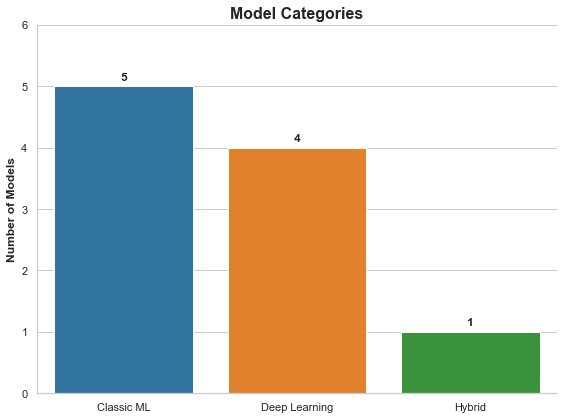

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

# --- Count per category ---
counts = df["Category"].value_counts().reindex(["Classic ML", "Deep Learning", "Hybrid"])

# --- Plot ---
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, palette=["#1f77b4","#ff7f0e","#2ca02c"])
plt.title("Model Categories", fontsize=16, fontweight='bold')
plt.ylabel("Number of Models", fontsize=12, fontweight='bold')
plt.xlabel("")
for i, val in enumerate(counts.values):
    plt.text(i, val + 0.1, str(val), ha='center', fontsize=12, fontweight='bold')
plt.ylim(0, max(counts.values)+1)
sns.despine()
plt.tight_layout()
plt.show()


/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_29012/4268592112.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=["#1f77b4","#ff7f0e","#2ca02c"])


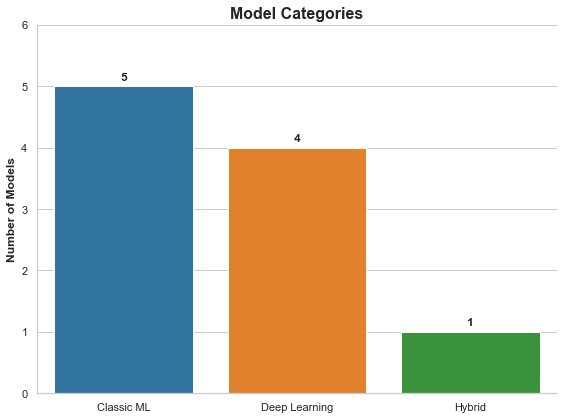

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

# --- Count per category ---
counts = df["Category"].value_counts().reindex(["Classic ML", "Deep Learning", "Hybrid"])

# --- Plot ---
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, palette=["#1f77b4","#ff7f0e","#2ca02c"])
plt.title("Model Categories", fontsize=16, fontweight='bold')
plt.ylabel("Number of Models", fontsize=12, fontweight='bold')
plt.xlabel("")
for i, val in enumerate(counts.values):
    plt.text(i, val + 0.1, str(val), ha='center', fontsize=12, fontweight='bold')
plt.ylim(0, max(counts.values)+1)
sns.despine()
plt.tight_layout()
plt.show()


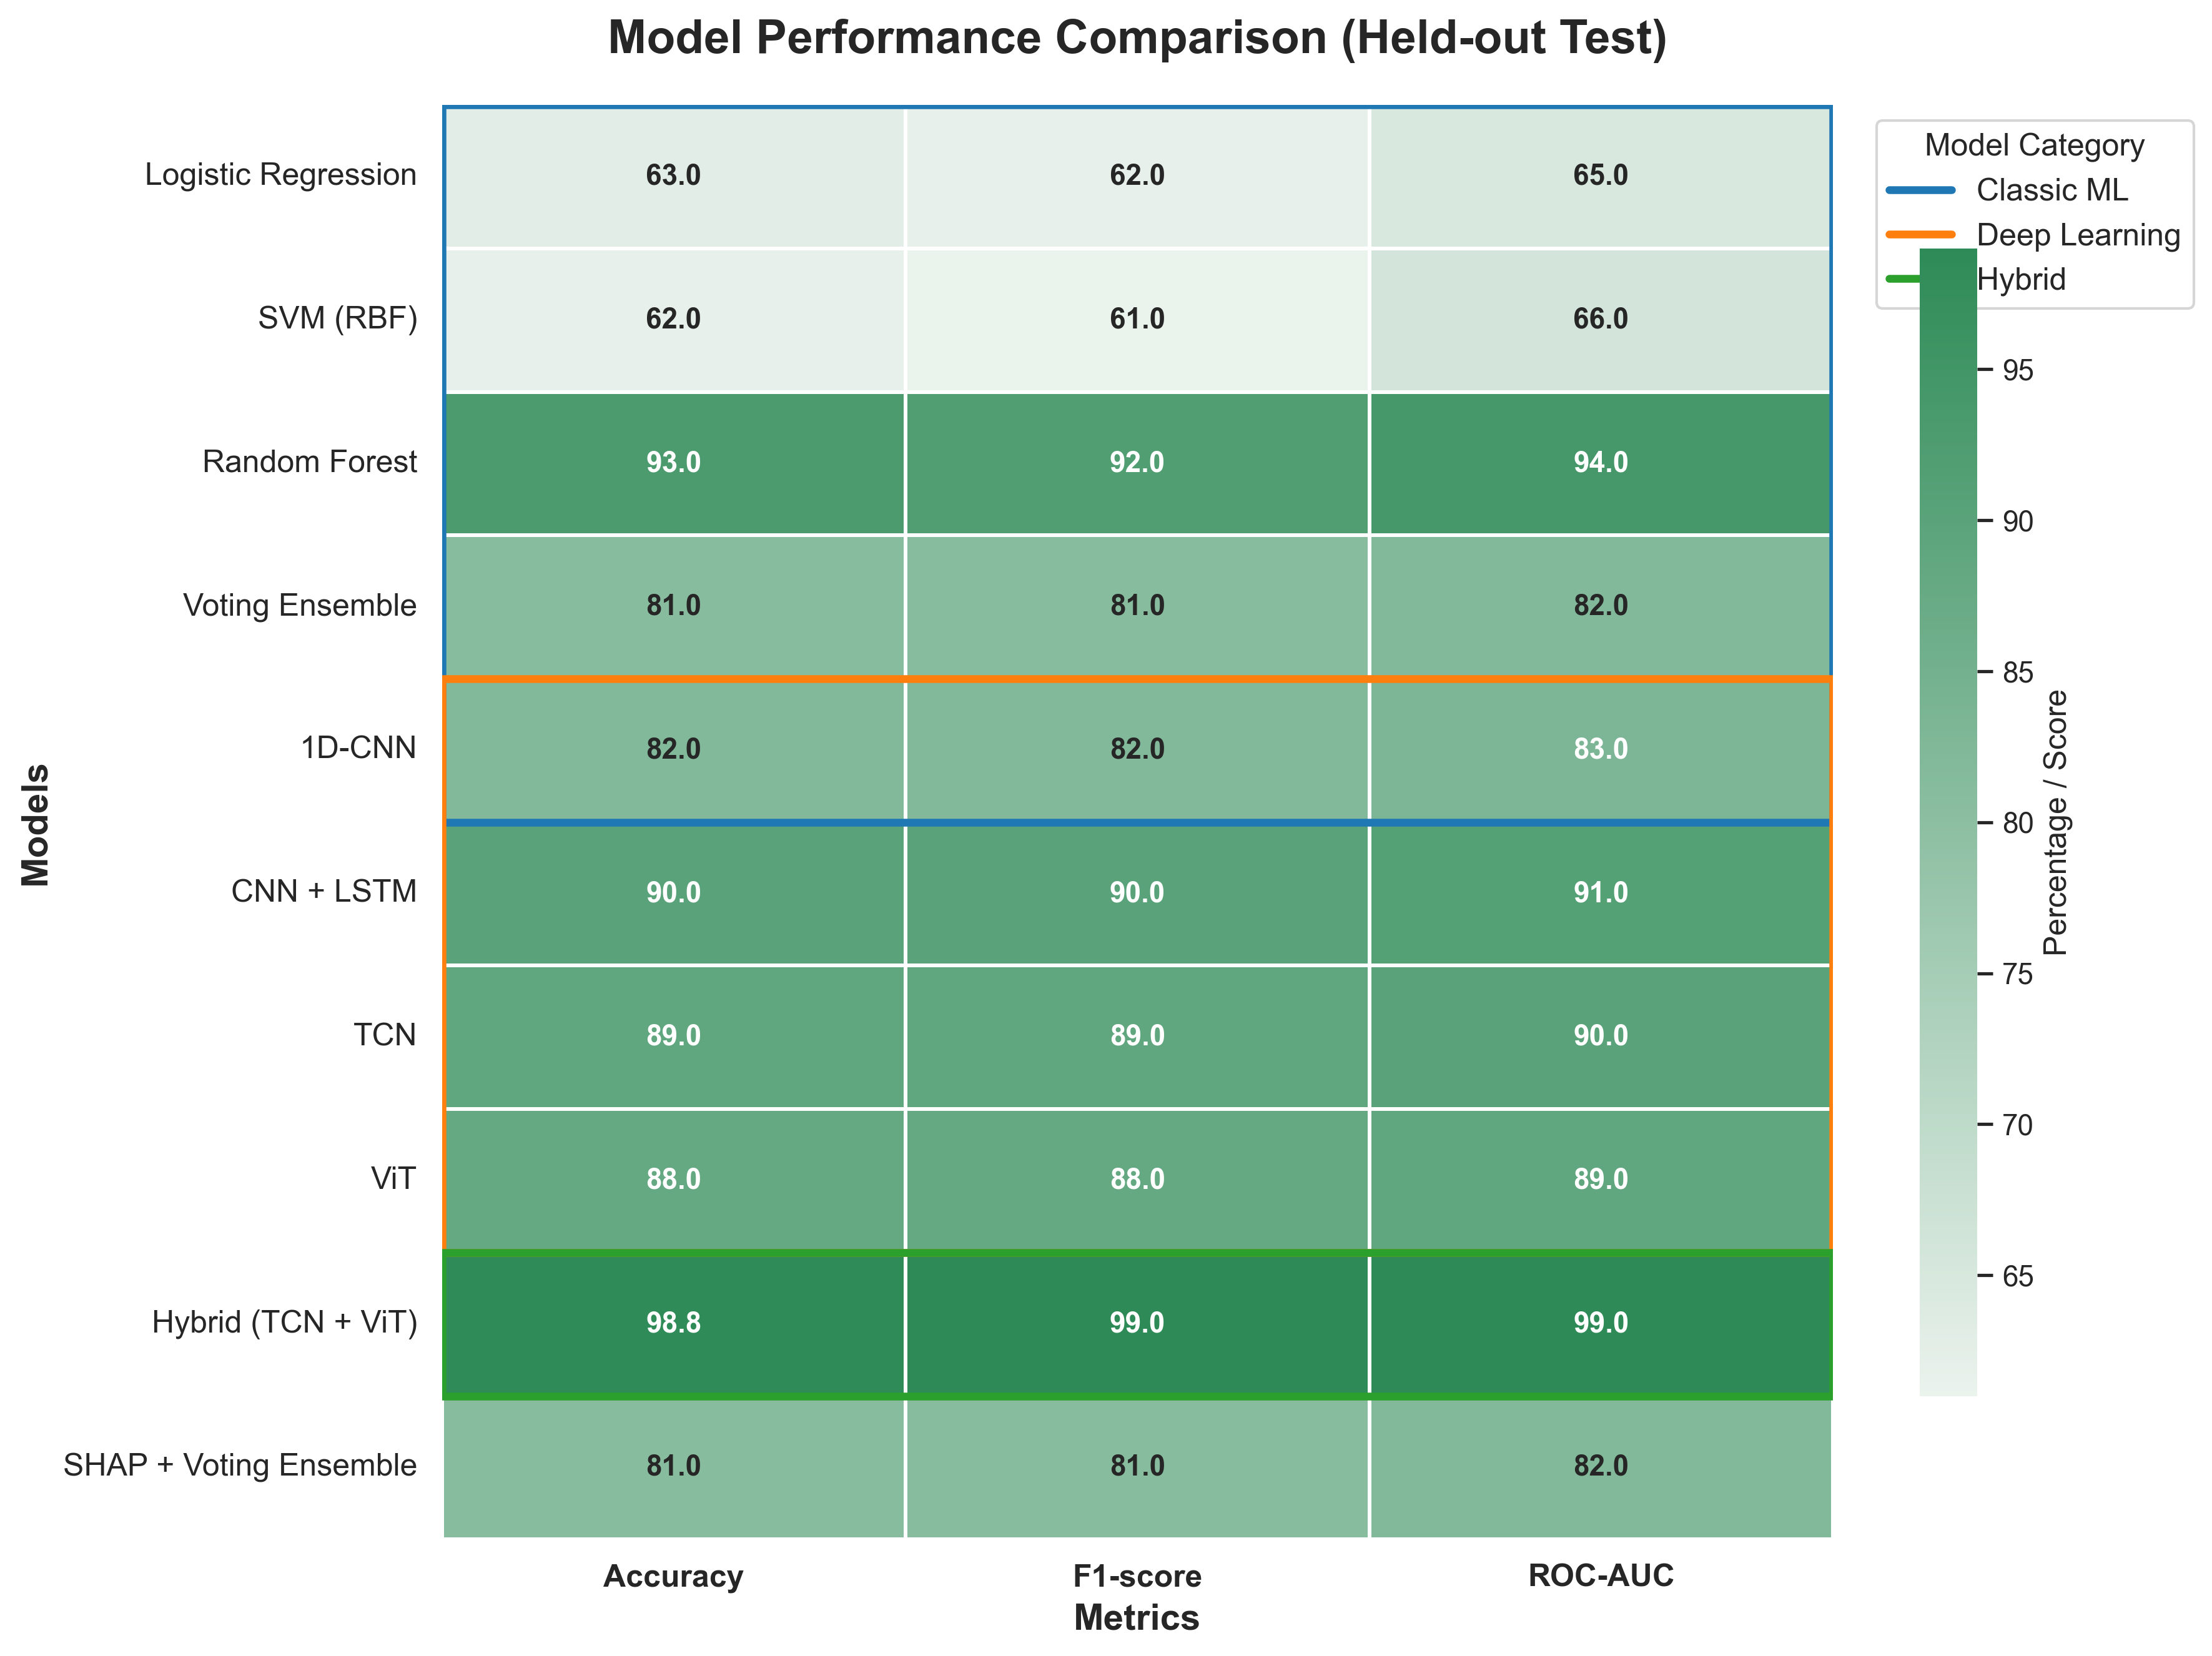

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

# --- Prepare heatmap data ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]].copy()
# Scale F1-score and ROC-AUC to percentage for uniform color mapping
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

# --- Figure and style settings ---
sns.set_style("whitegrid")
plt.figure(figsize=(14, 9), dpi=300)  # Large, high-resolution figure

# --- Create heatmap ---
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("seagreen", as_cmap=True),
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Percentage / Score', 'shrink': 0.8},
    annot_kws={"fontsize":11, "fontweight":"bold"}
)

# --- Axes labels and title ---
ax.set_title("Model Performance Comparison (Held-out Test)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Metrics", fontsize=14, fontweight='bold')
ax.set_ylabel("Models", fontsize=14, fontweight='bold')

# --- Highlight categories with colored rectangles ---
category_colors = {
    "Classic ML": "#1f77b4",   # Blue
    "Deep Learning": "#ff7f0e",# Orange
    "Hybrid": "#2ca02c"        # Green
}
for cat, color in category_colors.items():
    indices = df.index[df["Category"] == cat].tolist()
    if indices:
        start = min(indices)
        height = len(indices)
        rect = patches.Rectangle(
            (0, start), heatmap_data.shape[1], height, 
            fill=False, edgecolor=color, lw=3
        )
        ax.add_patch(rect)

# --- Custom legend for categories ---
legend_elements = [Line2D([0], [0], color=color, lw=3, label=cat) for cat, color in category_colors.items()]
ax.legend(handles=legend_elements, title="Model Category", fontsize=12, title_fontsize=12, loc='upper left', bbox_to_anchor=(1.02, 1))

# --- Final adjustments ---
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0,0,0.85,1])  # Leave space for legend on the right

# --- Save high-quality image ---
plt.savefig("model_comparison_heatmap_high_quality.png", dpi=600)
plt.show()


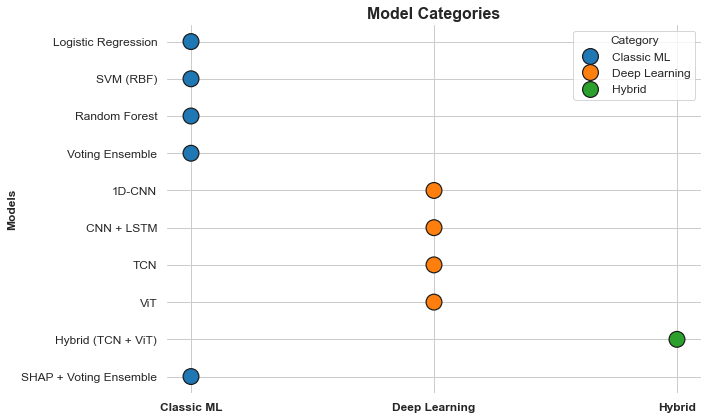

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Model data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

# --- Set color palette ---
category_colors = {"Classic ML": "#1f77b4", "Deep Learning": "#ff7f0e", "Hybrid": "#2ca02c"}

# --- Create figure ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Category",
    y="Model",
    hue="Category",
    palette=category_colors,
    s=250,   # marker size
    marker="o",
    edgecolor="k",
    linewidth=1.2
)

# --- Customize ---
plt.title("Model Categories", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Models", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')

sns.despine(left=True, bottom=True)
plt.tight_layout()

# --- Save high-quality figure ---
plt.savefig("model_category_visualization.png", dpi=600)
plt.show()


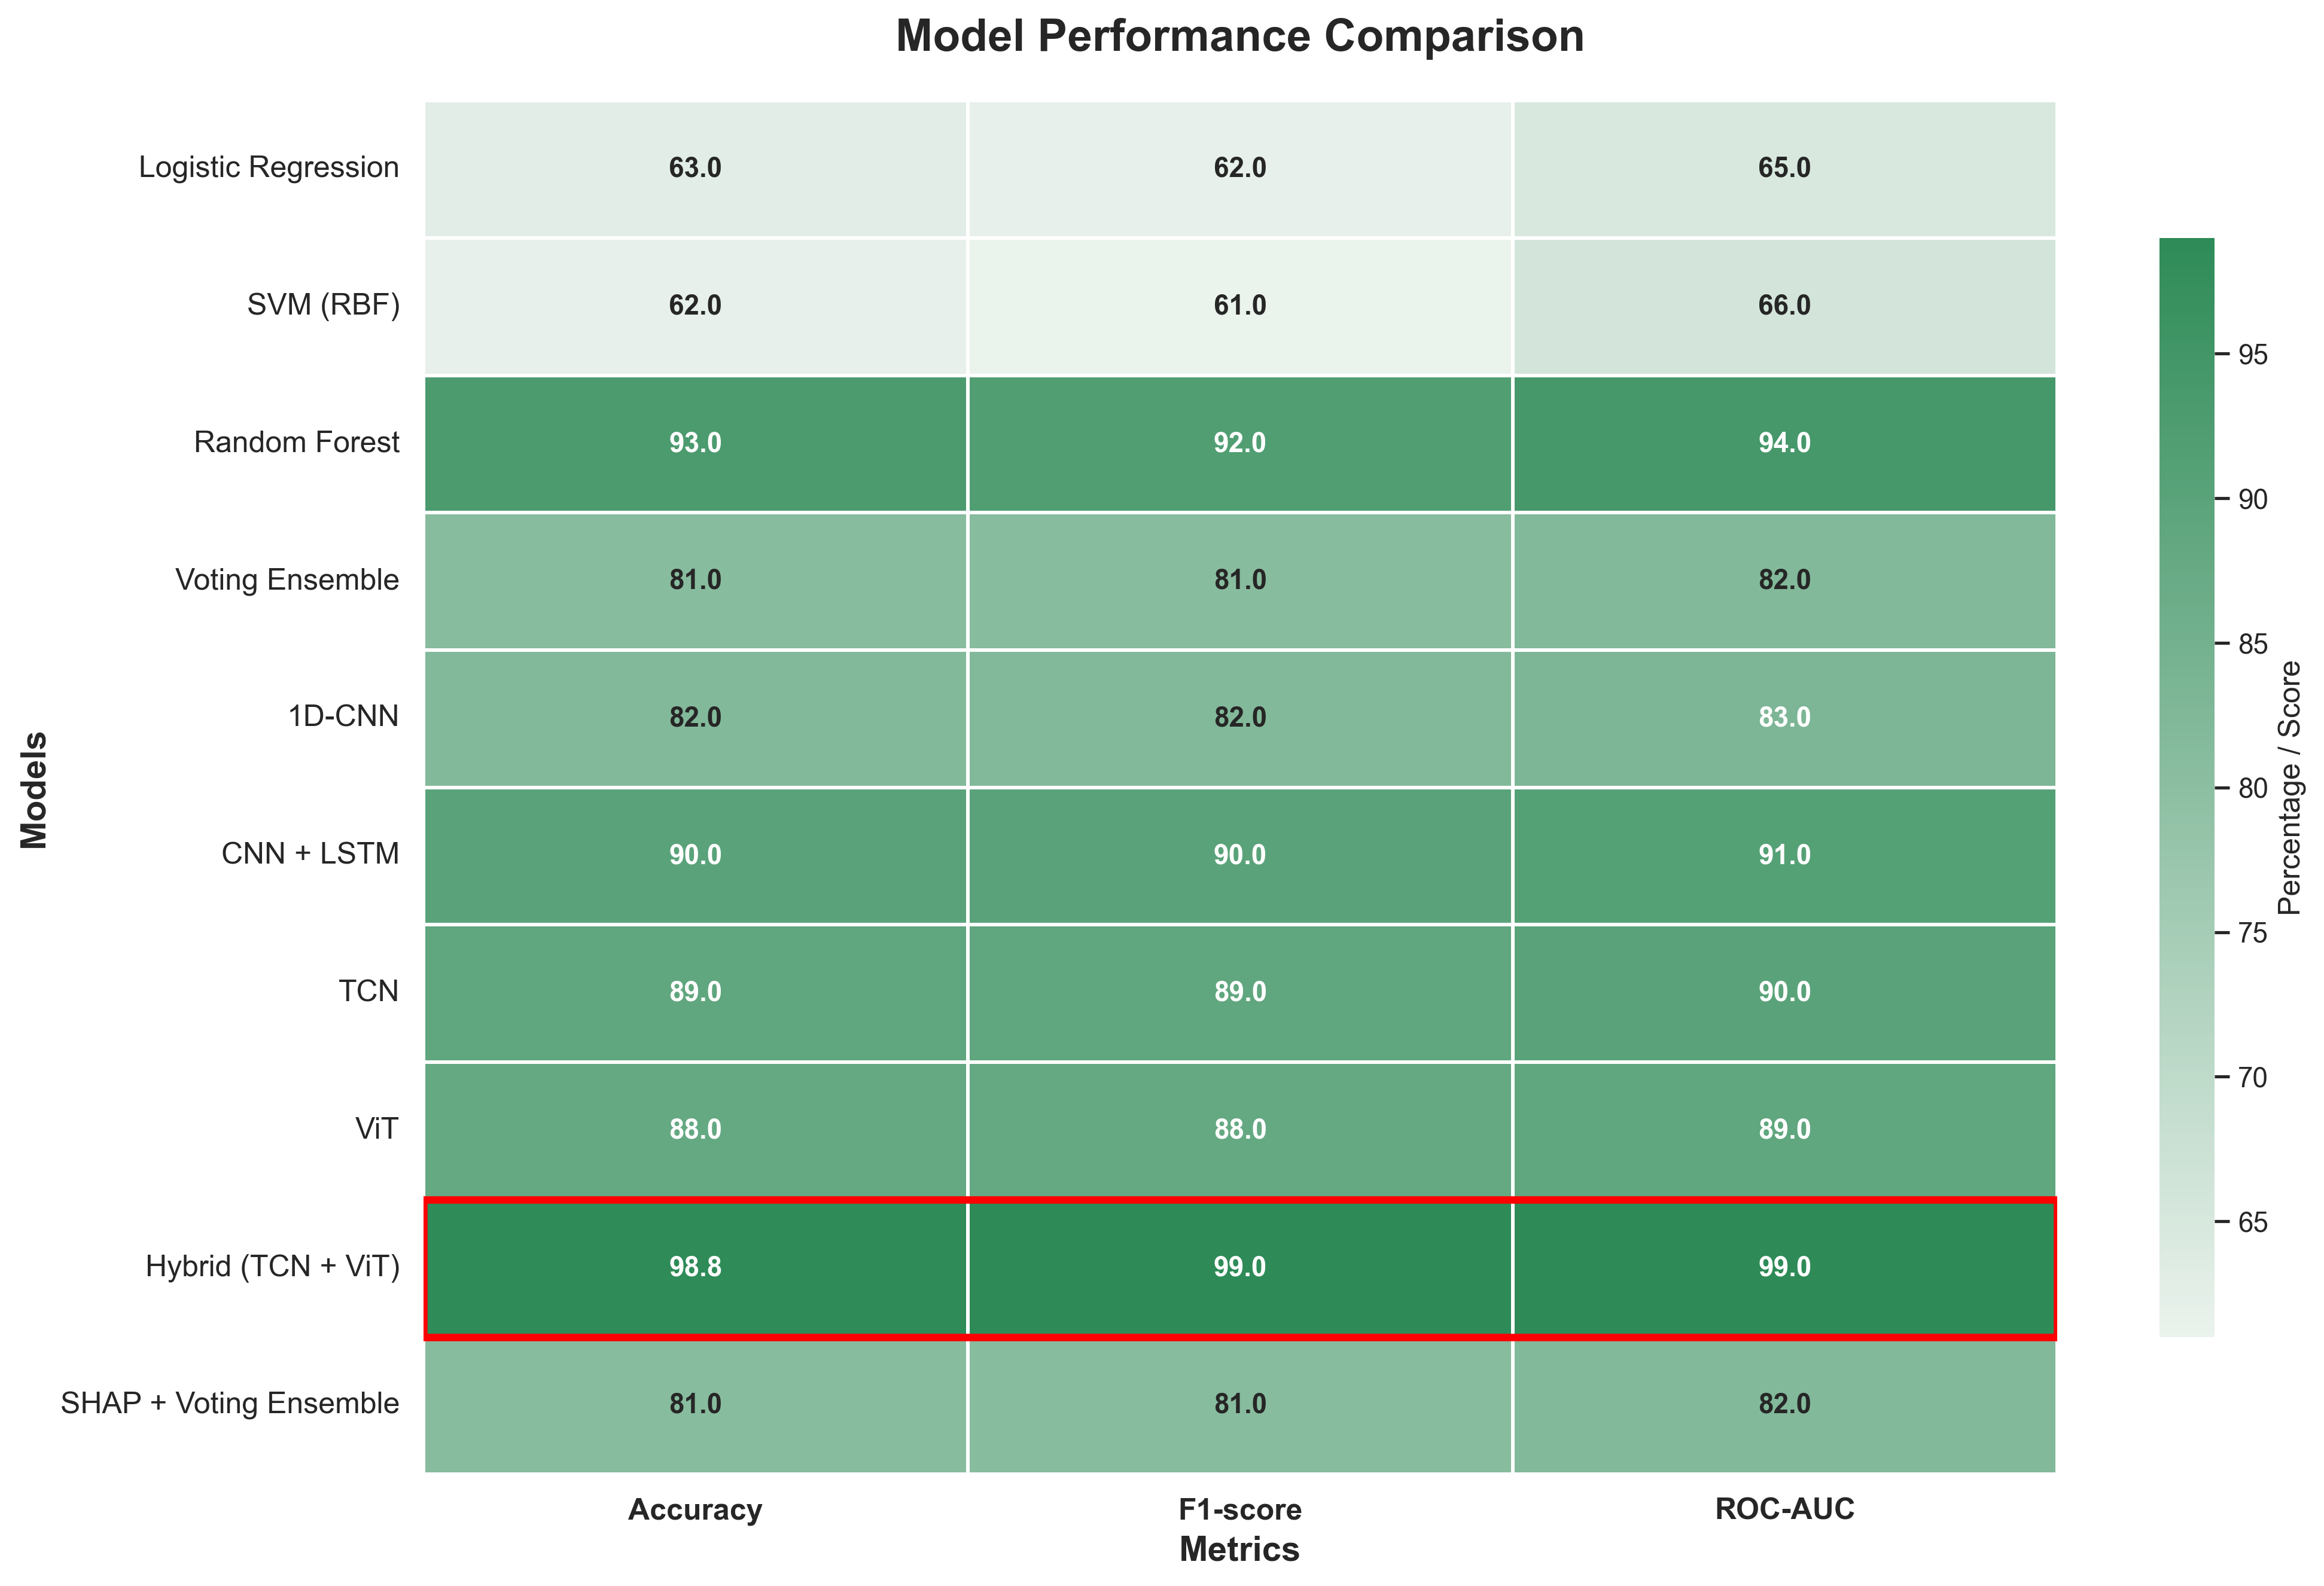

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Model performance data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82]
}
df = pd.DataFrame(data)

# --- Prepare heatmap data ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]].copy()
# Scale F1-score and ROC-AUC to percentage for consistent color mapping
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

# --- Figure and style settings ---
sns.set_style("whitegrid")
plt.figure(figsize=(14, 9), dpi=300)  # High-resolution

# --- Create heatmap ---
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("seagreen", as_cmap=True),
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Percentage / Score', 'shrink': 0.8},
    annot_kws={"fontsize":11, "fontweight":"bold"}
)

# --- Highlight the best-performing model ---
best_model = "Hybrid (TCN + ViT)"
best_idx = df.index[df["Model"] == best_model][0]

# Rectangle around the row
rect = patches.Rectangle(
    (0, best_idx),  # x, y
    heatmap_data.shape[1],  # width
    1,  # height
    fill=False,
    edgecolor="red",
    lw=3
)
ax.add_patch(rect)

# --- Axes labels and title ---
ax.set_title("Model Performance Comparison", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Metrics", fontsize=14, fontweight='bold')
ax.set_ylabel("Models", fontsize=14, fontweight='bold')

# --- Final adjustments ---
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# --- Save high-quality image ---
plt.savefig("model_comparison_heatmap_highlight.png", dpi=600)
plt.show()


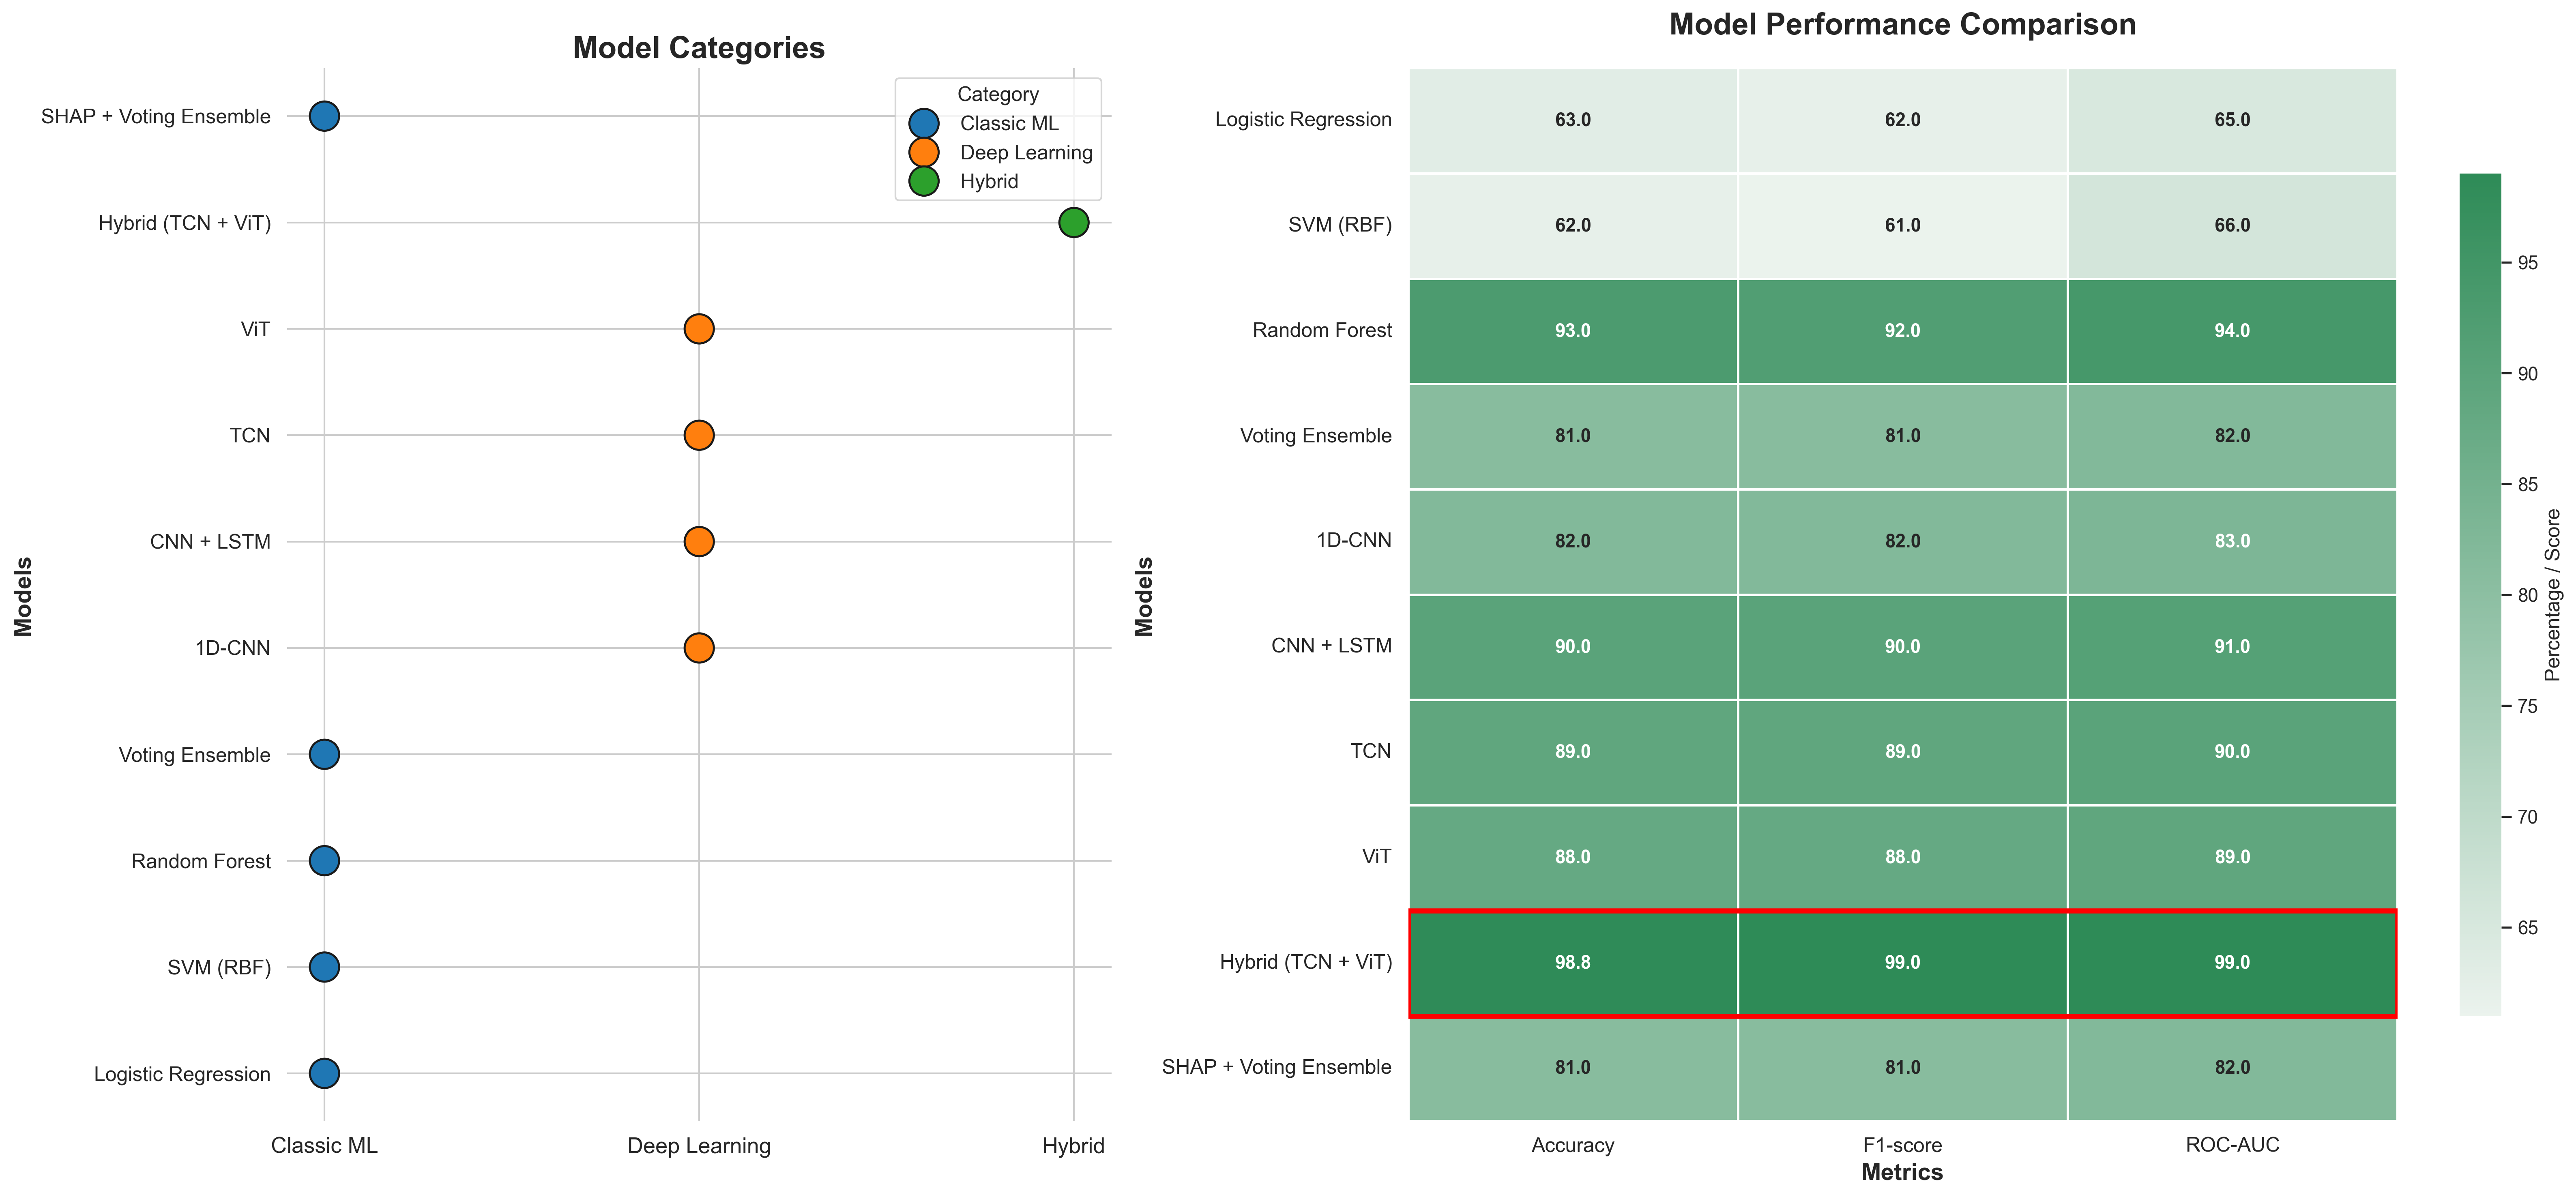

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Model data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ],
    "Accuracy": [63.0, 62.0, 93.0, 81.0, 82.0, 90.0, 89.0, 88.0, 98.8, 81.0],
    "F1-score": [0.62, 0.61, 0.92, 0.81, 0.82, 0.90, 0.89, 0.88, 0.99, 0.81],
    "ROC-AUC": [0.65, 0.66, 0.94, 0.82, 0.83, 0.91, 0.90, 0.89, 0.99, 0.82]
}
df = pd.DataFrame(data)

# --- Prepare heatmap data ---
heatmap_data = df.set_index("Model")[["Accuracy", "F1-score", "ROC-AUC"]].copy()
heatmap_data["F1-score"] *= 100
heatmap_data["ROC-AUC"] *= 100

# --- Set color palette for categories ---
category_colors = {"Classic ML": "#1f77b4", "Deep Learning": "#ff7f0e", "Hybrid": "#2ca02c"}

# --- Create combined figure ---
fig, axes = plt.subplots(1, 2, figsize=(22, 10), dpi=300, gridspec_kw={'width_ratios':[1,1.5]})

# --------------------------
# Left: Category Scatter Plot
# --------------------------
sns.scatterplot(
    data=df,
    x="Category",
    y="Model",
    hue="Category",
    palette=category_colors,
    s=300,
    marker="o",
    edgecolor="k",
    linewidth=1.2,
    ax=axes[0]
)
axes[0].invert_yaxis()  # Move top-to-bottom order
axes[0].set_title("Model Categories", fontsize=18, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Models", fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')
sns.despine(ax=axes[0], left=True, bottom=True)

# --------------------------
# Right: Performance Heatmap
# --------------------------
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("seagreen", as_cmap=True),
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Percentage / Score', 'shrink': 0.8},
    annot_kws={"fontsize":11, "fontweight":"bold"},
    ax=axes[1]
)

# Highlight best-performing model (Hybrid (TCN + ViT))
best_model = "Hybrid (TCN + ViT)"
best_idx = df.index[df["Model"] == best_model][0]
rect = patches.Rectangle(
    (0, best_idx),
    heatmap_data.shape[1],
    1,
    fill=False,
    edgecolor="red",
    lw=3
)
axes[1].add_patch(rect)

axes[1].set_title("Model Performance Comparison", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel("Metrics", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Models", fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
sns.despine(ax=axes[1], left=True, bottom=True)

plt.tight_layout()
plt.savefig("combined_model_category_heatmap_fixed.png", dpi=600)
plt.show()


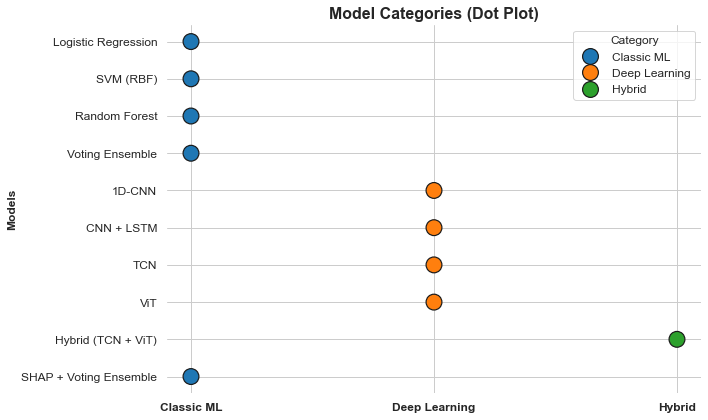

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


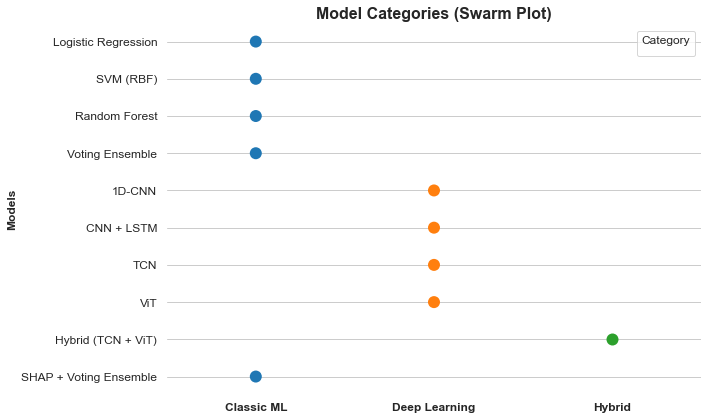

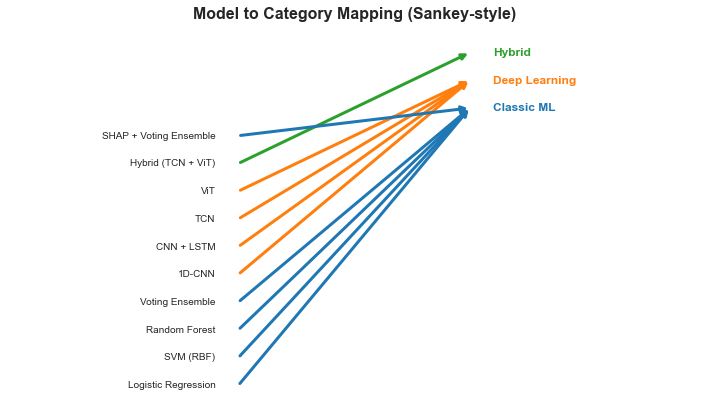

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.sankey import Sankey

# --- Model data ---
data = {
    "Model": [
        "Logistic Regression", "SVM (RBF)", "Random Forest", "Voting Ensemble",
        "1D-CNN", "CNN + LSTM", "TCN", "ViT", "Hybrid (TCN + ViT)", "SHAP + Voting Ensemble"
    ],
    "Category": [
        "Classic ML", "Classic ML", "Classic ML", "Classic ML",
        "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning",
        "Hybrid", "Classic ML"
    ]
}
df = pd.DataFrame(data)

category_colors = {"Classic ML": "#1f77b4", "Deep Learning": "#ff7f0e", "Hybrid": "#2ca02c"}

# -------------------------
# 1️⃣ Horizontal Dot / Strip Plot
# -------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Category",
    y="Model",
    hue="Category",
    palette=category_colors,
    s=250,
    marker="o",
    edgecolor="k",
    linewidth=1.2
)
plt.title("Model Categories (Dot Plot)", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Models", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("model_categories_dotplot.png", dpi=600)
plt.show()

# -------------------------
# 2️⃣ Swarm / Beeswarm Plot
# -------------------------
plt.figure(figsize=(10,6))
sns.swarmplot(
    data=df,
    x="Category",
    y="Model",
    hue="Category",
    palette=category_colors,
    size=12
)
plt.title("Model Categories (Swarm Plot)", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Models", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("model_categories_swarm.png", dpi=600)
plt.show()

# -------------------------
# 3️⃣ Sankey Diagram (Model → Category)
# -------------------------
# Map models and categories to indices
models = df["Model"].tolist()
categories = df["Category"].unique().tolist()
model_indices = {model:i for i, model in enumerate(models)}
category_indices = {cat:i+len(models) for i, cat in enumerate(categories)}

# Sankey flows: +1 from model to category
flows = []
labels = models + categories
orientations = []
for i, row in df.iterrows():
    flows.extend([1, -1])
    orientations.extend([0, 0])

# Connections for Sankey
connections = [(model_indices[row["Model"]], category_indices[row["Category"]]) for i, row in df.iterrows()]

# Plot using simple vertical Sankey
fig, ax = plt.subplots(figsize=(10,6))
for src, tgt in connections:
    ax.annotate("",
        xy=(2, tgt), xycoords='data',
        xytext=(1, src), textcoords='data',
        arrowprops=dict(arrowstyle="-|>", color=category_colors[df.loc[src,"Category"]], lw=3))

# Plot model and category labels
for i, model in enumerate(models):
    ax.text(0.9, i, model, ha='right', va='center', fontsize=10)
for i, cat in enumerate(categories):
    ax.text(2.1, i+len(models), cat, ha='left', va='center', fontsize=12, fontweight='bold', color=category_colors[cat])

ax.set_xlim(0,3)
ax.set_ylim(-1, len(models)+len(categories))
ax.axis('off')
plt.title("Model to Category Mapping (Sankey-style)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("model_categories_sankey.png", dpi=600)
plt.show()


In [239]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ---------------------------
# 1. Load trained Keras TCN + ViT model
# ---------------------------
model = load_model("tcn_vit_model.h5")

# ---------------------------
# 2. Prepare input features
# ---------------------------
# X is a pandas DataFrame or numpy array of features
X_values = X.values  # numpy array

# ---------------------------
# 3. Initialize SHAP DeepExplainer
# ---------------------------
background = X_values[:100]  # subset for efficiency
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_values)

# ---------------------------
# 4. Plot SHAP summary
# ---------------------------
class_idx = 1
shap_values_class = shap_values[class_idx] if isinstance(shap_values, list) else shap_values

plt.figure(figsize=(14,8))
shap.summary_plot(
    shap_values_class,
    X,
    plot_type="dot",
    max_display=20,
    show=False
)
plt.title("SHAP Summary — Hybrid TCN+ViT", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("shap_summary_tcn_vit.png", dpi=600)
plt.show()


OSError: No file or directory found at tcn_vit_model.h5

Model: "model_116"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 1, 9)]               0         []                            
                                                                                                  
 conv1d_32 (Conv1D)          (None, 1, 64)                640       ['input_17[0][0]']            
                                                                                                  
 conv1d_30 (Conv1D)          (None, 1, 64)                640       ['input_17[0][0]']            
                                                                                                  
 vit_ln (LayerNormalization  (None, 1, 64)                128       ['conv1d_32[0][0]']           
 )                                                                                        

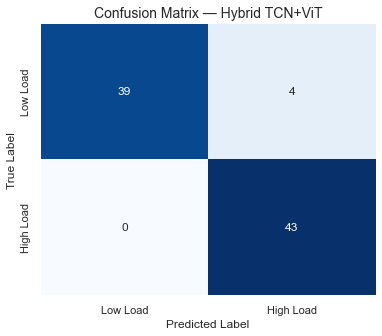

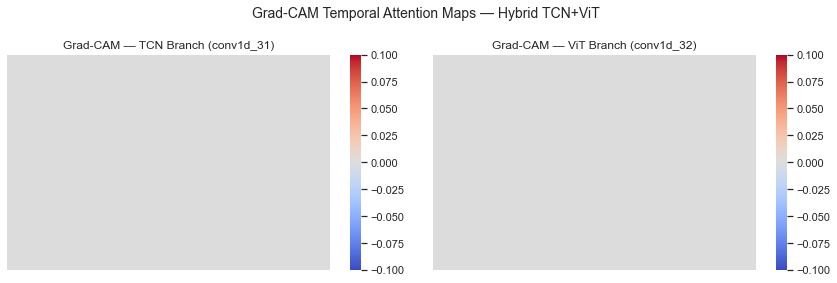

In [270]:
# ==============================
# Hybrid TCN + ViT + Grad-CAM Explainability
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

# ----------------------
# Step 1: Load and Preprocess Data
# ----------------------
df = pd.read_csv("cognitive_load_full_features_with_entropy.csv")

# Keep only valid trials and assign labels
df = df[df['trial_number'].isin([0, 1, 2, 3])]
df['label'] = df['trial_number'].apply(lambda x: 1 if int(x) in [1, 3] else 0)

# Drop metadata
X = df.drop(columns=["participant_id", "trial_number", "condition", "trial_type", "file_path", "label"], errors='ignore')
y = df["label"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Expand dims → (samples, timesteps=1, features)
X_seq = np.expand_dims(X_scaled, axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------
# Step 2: Define TCN + ViT Model
# ----------------------
def build_tcn_vit_model(input_shape):
    inputs = Input(shape=input_shape)

    # ----- TCN Branch -----
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu", name="conv1d_30")(inputs)
    x_tcn = layers.Conv1D(64, kernel_size=1, padding="causal", activation="relu", name="conv1d_31")(x_tcn)
    x_tcn = layers.GlobalAveragePooling1D(name="tcn_gap")(x_tcn)

    # ----- ViT Branch -----
    x_vit = layers.Conv1D(64, kernel_size=1, name="conv1d_32")(inputs)
    x_vit = layers.LayerNormalization(name="vit_ln")(x_vit)
    x_vit = layers.MultiHeadAttention(num_heads=2, key_dim=32, name="multi_head_attention_7")(x_vit, x_vit)
    x_vit = layers.GlobalAveragePooling1D(name="vit_gap")(x_vit)

    # ----- Merge -----
    x = layers.Concatenate(name="merge")([x_tcn, x_vit])
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.3, name="dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="output")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
    return model

model = build_tcn_vit_model(X_train.shape[1:])
model.summary()

# ----------------------
# Step 3: Train Model
# ----------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1
)

# ----------------------
# Step 4: Evaluation
# ----------------------
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Load", "High Load"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low Load", "High Load"], yticklabels=["Low Load", "High Load"], cbar=False)
plt.title("Confusion Matrix — Hybrid TCN+ViT", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ----------------------
# Step 5: Grad-CAM Function
# ----------------------
def compute_gradcam(model, input_data, class_idx=0, layer_name="conv1d_31"):
    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(input_data, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
    weights = tf.reduce_mean(guided_grads, axis=1)
    cam = tf.reduce_sum(tf.multiply(weights[:, tf.newaxis, :], conv_outputs), axis=-1).numpy()[0]

    # Normalize
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)
    return cam

# ----------------------
# Step 6: Compute Grad-CAM for TCN & ViT
# ----------------------
cams_tcn, cams_vit = [], []

for i in range(len(X_test)):
    cam_tcn = compute_gradcam(model, X_test[i], class_idx=0, layer_name="conv1d_31")
    cam_vit = compute_gradcam(model, X_test[i], class_idx=0, layer_name="conv1d_32")

    if y_test.iloc[i] == 0:  # Low Load
        cams_tcn.append(cam_tcn)
        cams_vit.append(cam_vit)

mean_cam_tcn = np.mean(cams_tcn, axis=0)
mean_cam_vit = np.mean(cams_vit, axis=0)

# ----------------------
# Step 7: Plot Side-by-Side Attention Maps
# ----------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap([mean_cam_tcn], cmap="coolwarm", cbar=True,
            xticklabels=False, yticklabels=False)
plt.title("Grad-CAM — TCN Branch (conv1d_31)", fontsize=12)

plt.subplot(1,2,2)
sns.heatmap([mean_cam_vit], cmap="coolwarm", cbar=True,
            xticklabels=False, yticklabels=False)
plt.title("Grad-CAM — ViT Branch (conv1d_32)", fontsize=12)

plt.suptitle("Grad-CAM Temporal Attention Maps — Hybrid TCN+ViT", fontsize=14)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== SHAP Biomarker Pipeline ===
Input CSV   : phase2_complete_features.csv
Mode        : duration_controlled
Output Dir  : shap_duration_ctrl
Group Col   : participant_id
[OK] Derived label from: file_path_suffix

--- Fold 1/5 ---
Acc: 0.803 | F1: 0.794 | ROC-AUC: 0.8398741206960386


 98%|===================| 289/294 [01:17<00:01]        


--- Fold 2/5 ---
Acc: 0.612 | F1: 0.642 | ROC-AUC: 0.7042253521126761


100%|===================| 293/294 [00:28<00:00]        


--- Fold 3/5 ---
Acc: 0.633 | F1: 0.625 | ROC-AUC: 0.6812453669384729


 99%|===================| 291/294 [00:46<00:00]        


--- Fold 4/5 ---
Acc: 0.748 | F1: 0.734 | ROC-AUC: 0.7922077922077922


 99%|===================| 290/294 [00:40<00:00]        


--- Fold 5/5 ---
Acc: 0.603 | F1: 0.561 | ROC-AUC: 0.7060150375939849


 98%|===================| 286/292 [00:45<00:00]        


=== Cross-Fold Performance (avg) ===
{
  "mean_acc": 0.6797316186748672,
  "mean_f1": 0.6710509370686728,
  "mean_roc_auc": 0.744713533909793,
  "confusion_matrix_avg": [
    [
      51.8,
      21.4
    ],
    [
      25.6,
      48.0
    ]
  ]
}


AssertionError: Feature and SHAP matrices must have the same number of rows!

<Figure size 576x432 with 0 Axes>

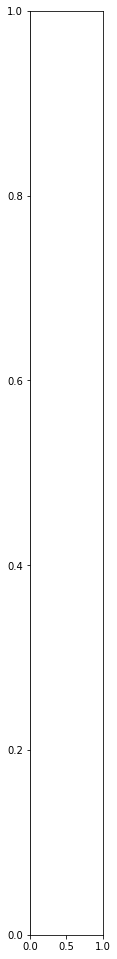

In [1]:
from shap_biomarker_pipeline import run_pipeline

perf = run_pipeline(
    input_csv="phase2_complete_features.csv",
    out_dir="shap_duration_ctrl",
    mode="duration_controlled",
    label_col=None,            # inferred
    group_col="participant_id",
    n_splits=5,
    seed=42,
    bg_size=300,
    topk=8
)
perf
